In [144]:
# imports
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import geopandas as gpd
import pandas as pd
import descartes
from scipy import stats
from shapely.geometry import Point, Polygon

In [145]:
mpl.rcParams['figure.dpi'] = 200 # set dpi


In [158]:
# indonesia = gpd.read_file("data/indonesia_boundary.json")
concessions = gpd.read_file("data/Managed_Forest_Concessions_(WRI).geojson")
adj_mats = []
for i in range(10): # import adj mats over years
    adj_mats.append(pd.read_csv("outputs/adjacencies/logging_200" + str(i) + ".csv", header=None))

# adj_mat = pd.read_csv("outputs/logging_concession_adjacencies_no_buffer.csv", header=None)
features_by_lc = pd.read_csv("outputs/features_by_logging_concession.csv")
for i in range(10): # 
    features_by_lc["degree200"+str(i)] = [sum(adj_mats[i].iloc[j, :]) for j in range(len(adj_mats[i]))]

# features_by_lc["degree"] = [sum(adj_mat.iloc[i, :]) for i in range(len(adj_mat))]



features_by_lc_dropped = features_by_lc.dropna().reset_index(drop=True)

# mock data
# concessions = gpd.read_file("mock/mock_concessions.geojson")
# grid = pd.read_csv("mock/mock_grid.csv")

In [147]:
# Only consider concessions w/ >= 1 degree
low_degs_by_year = []
for i in range(10):
    no_low_deg = [j for j in features_by_lc_dropped.index if features_by_lc_dropped['degree200'+str(i)][j] > 0]
    low_degs_by_year.append(no_low_deg)
# features_by_lc_dropped = features_by_lc_dropped.iloc[no_low_deg, :]
# len(features_by_lc_dropped)

In [148]:
features_by_lc_dropped.columns

Index(['id', 'area', 'year', 'slope', 'elev', 'distroad', 'distcapital',
       'peatdepth', 'biomasscarbonruesch', 'soilcarbon',
       'biomasscarbonbaccini', 'defor2000', 'defor2001', 'defor2002',
       'defor2003', 'defor2004', 'defor2005', 'defor2006', 'defor2007',
       'defor2008', 'defor2009', 'defor2000prop', 'defor2001prop',
       'defor2002prop', 'defor2003prop', 'defor2004prop', 'defor2005prop',
       'defor2006prop', 'defor2007prop', 'defor2008prop', 'defor2009prop',
       'num_cells', 'degree', 'degree2000', 'degree2001', 'degree2002',
       'degree2003', 'degree2004', 'degree2005', 'degree2006', 'degree2007',
       'degree2008', 'degree2009'],
      dtype='object')

In [149]:

def make_hist(data, bins="auto", title="", xlabel="", ylabel="Frequency", show_bar_label = False, show_stats = False, ax=None):
    print("count:", len(data))
    # print("unique:", np.unique(data))
    print("mean:", np.average(data))
    print("median:", np.median(data))
    print("std dev:", np.std(data))
    print("range:", min(data), max(data))
    # print(len(num_neighbors))
    # plt.boxplot(num_neighbors)
    if ax == None:
        fig, ax = plt.subplots(figsize = (6,4))
    # else:
    y, x, _ = ax.hist(data, bins=bins, rwidth=0.85, color="purple", alpha=.55)

    if show_bar_label:
        for c in ax.containers:
            ax.bar_label(c, size=6)


    # # Calculate percentiles quants = [quantile, opacity, length]
    # quants = []
    # for i, amt in enumerate((0.05, 0.25, 0.50, 0.75, 0.95)):
    #     quants.append([np.quantile(num_neighbors, amt), 0.8, .16+i*.1])

    # # Plot the lines with a loop
    # for i in quants:
    #     ax.axvline(i[0], alpha = i[1], ymax = i[2], linestyle = ":")

    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    if show_stats:
        text = "total count: " + str(len(data)) + "\nmean: "+ str(round(np.average(data), 2)) + "\nmedian: " + str(round(np.median(data), 2)) + \
            "\nstd dev: " + str(round(np.std(data), 2)) + "\nrange: [" + str(round(min(data), 2)) + ", " + str(round(max(data), 2)) + "]" 
        ax.text(s=text,x=max(data)*4/5, y=y.max()*4/5, size=8)
    plt.show()

count: 499
mean: 1.5410821643286574
median: 1.0
std dev: 2.170076980077306
range: 0 26


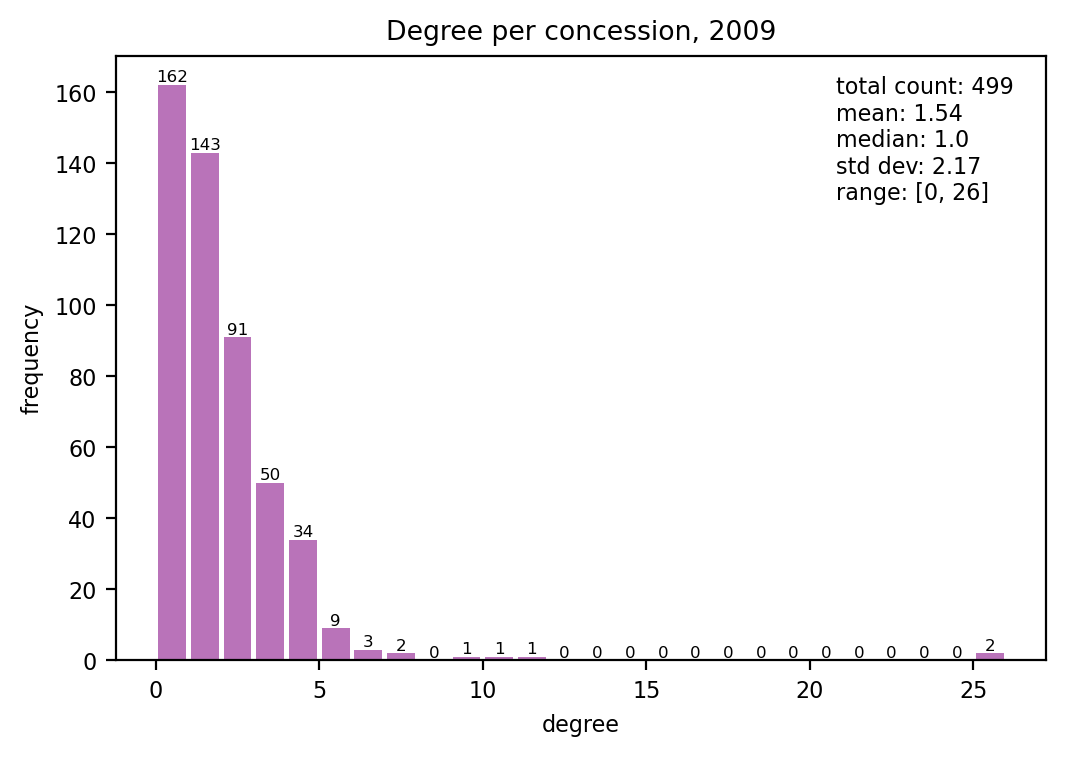

In [150]:
make_hist(features_by_lc_dropped["degree2009"], bins=[i for i in range(27)], title='Degree per concession, 2009', \
    xlabel = 'degree', ylabel='frequency', show_bar_label=True, show_stats=True)

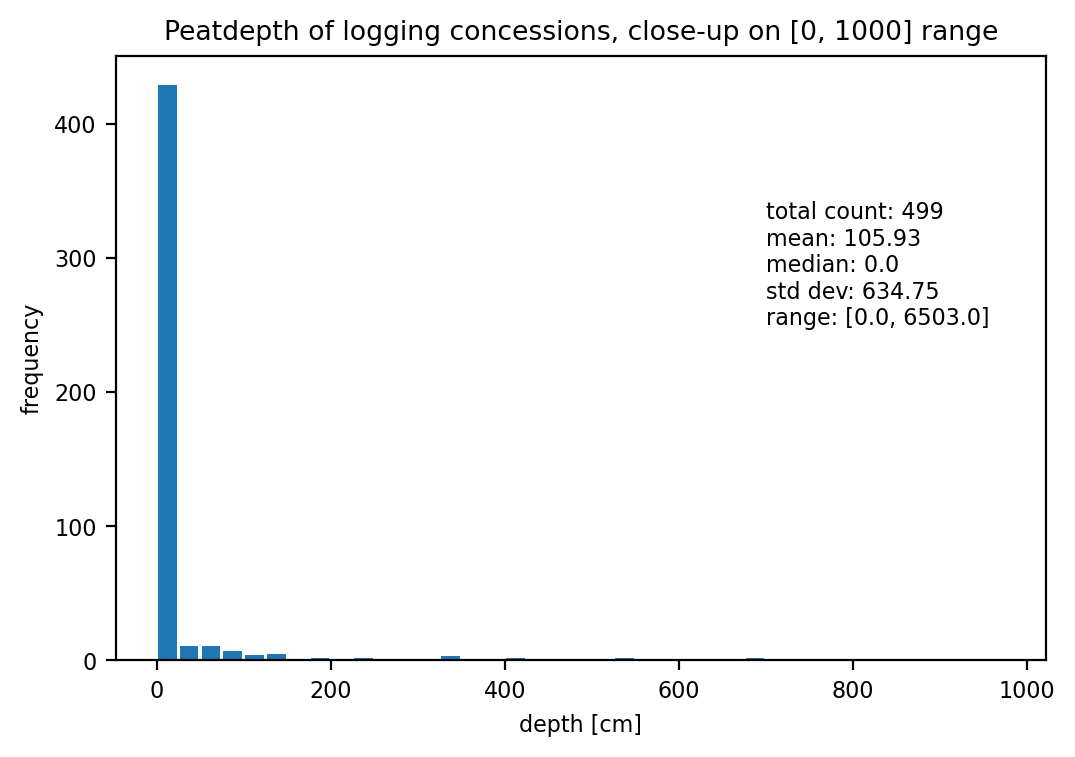

In [151]:
# Zoom on peatdepth, lower peak
data = features_by_lc_dropped["peatdepth"]
plt.hist(data, bins=[i for i in range(0, 1000, 25)], rwidth=.85)
text = "total count: " + str(len(data)) + "\nmean: "+ str(round(np.average(data), 2)) + "\nmedian: " + str(round(np.median(data), 2)) + \
            "\nstd dev: " + str(round(np.std(data), 2)) + "\nrange: [" + str(round(min(data), 2)) + ", " + str(round(max(data), 2)) + "]" #[0, 26]"
plt.text(s=text,x=700, y=250, size=8)
plt.title("Peatdepth of logging concessions, close-up on [0, 1000] range")
plt.xlabel("depth [cm]")
plt.ylabel("frequency")
plt.show()

count: 557
mean: 49753.84021543986
median: 31911.0
std dev: 67192.73884539449
range: 0.0 626908.0


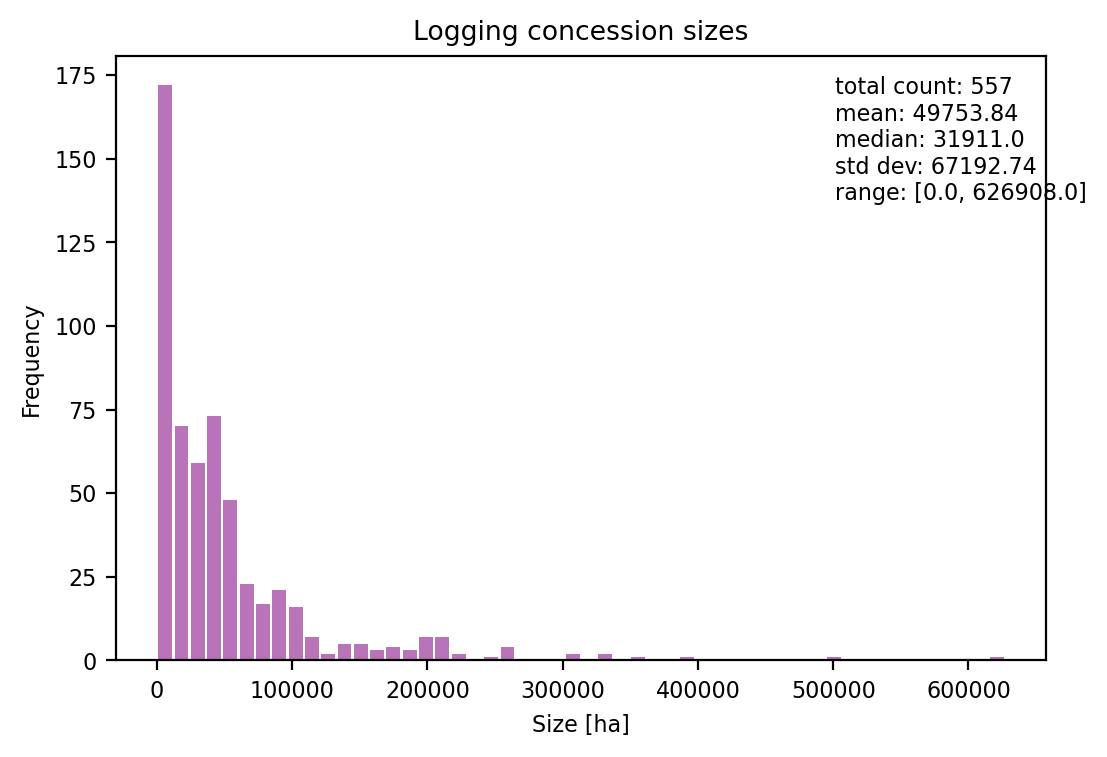

In [152]:
# concession size
concession_sizes = np.array([float(n) for n in concessions['area_ha']])
make_hist(concession_sizes, show_bar_label=False, show_stats = True, \
    title="Logging concession sizes", xlabel="Size [ha]", ylabel="Frequency")

# why are there a bunch of 0s???? need to sort this out. 
# possibly analysis the polygons themselves and calculate their areas instead of taking the area_ha column

count: 499
mean: 84.91382765531063
median: 63.0
std dev: 90.51993319589855
range: 1 815


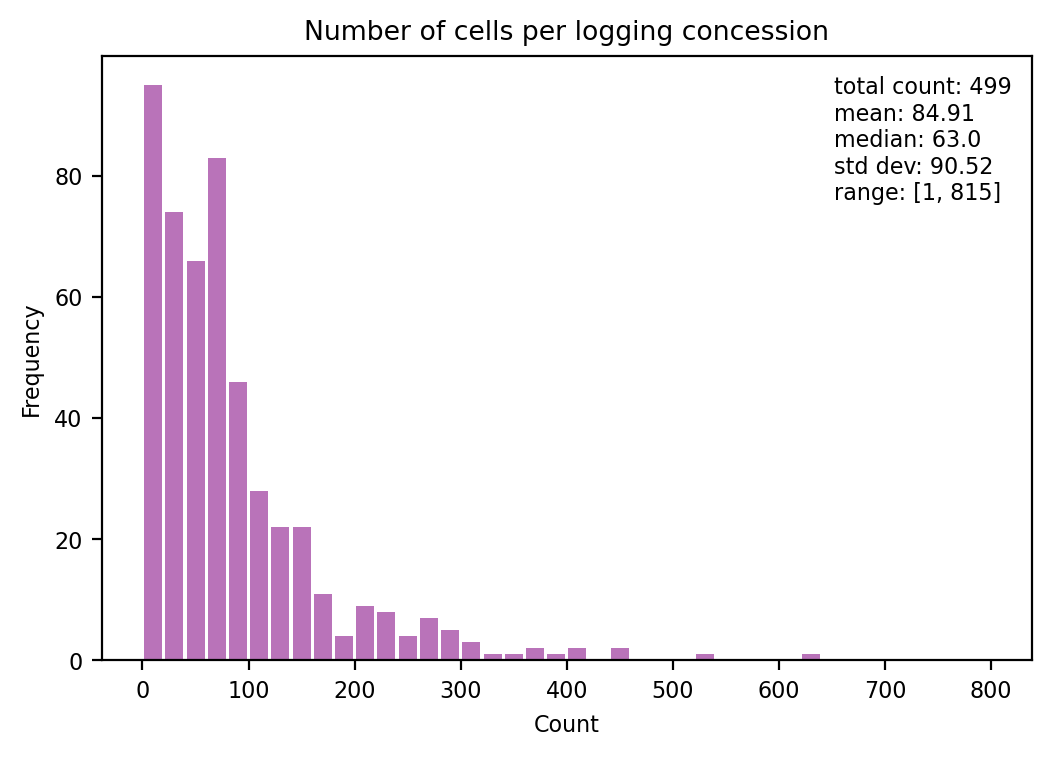

In [153]:
# concession size
x = features_by_lc_dropped["num_cells"]
make_hist(x, bins=range(0, max(x), 20), show_bar_label=False, show_stats = True, \
    title="Number of cells per logging concession", xlabel="Count", ylabel="Frequency")

In [154]:
print(features_by_lc.columns[1:-11])
feat_units = {"area":"ha", 'slope':"degrees", 'year': 'count', 'elev':"meters", 'distroad':"", 'distcapital':"",
       'peatdepth':"cm", 'biomasscarbonruesch':"tC/ha", 'soilcarbon':"tC/ha",
       'biomasscarbonbaccini':"tC/ha", 'defor2000':"ha", 'defor2001':"ha", 'defor2002':"ha",
       'defor2003':"ha", 'defor2004':"ha", 'defor2005':"ha", 'defor2006':"ha", 'defor2007':"ha",
       'defor2008':"ha", 'defor2009':"ha"}

Index(['area', 'year', 'slope', 'elev', 'distroad', 'distcapital', 'peatdepth',
       'biomasscarbonruesch', 'soilcarbon', 'biomasscarbonbaccini',
       'defor2000', 'defor2001', 'defor2002', 'defor2003', 'defor2004',
       'defor2005', 'defor2006', 'defor2007', 'defor2008', 'defor2009',
       'defor2000prop', 'defor2001prop', 'defor2002prop', 'defor2003prop',
       'defor2004prop', 'defor2005prop', 'defor2006prop', 'defor2007prop',
       'defor2008prop', 'defor2009prop', 'num_cells'],
      dtype='object')


In [155]:
features_by_lc_dropped

id    area  year      slope        elev    distroad  distcapital  \
0      1   25677  2009   5.703810  136.713525   78.973377   188.636000   
1      2   47812  2009   5.481341  143.491448  128.181840   162.474440   
2      3   94835  2008   7.100132  369.296201   13.425867   280.545799   
3      4  261827  2009   3.185515   98.517925   27.137641   174.347466   
4      5   53587  2008   8.018633  431.265148   15.181501   249.199159   
..   ...     ...   ...        ...         ...         ...          ...   
494  552   66716  2009  10.796225  196.243718  128.620993   357.180554   
495  554   12340  2009  12.754385  528.159760  156.620120   245.317720   
496  555   49459  2009  11.012047  306.129807  162.870260   243.175411   
497  556   31252  2009  14.942977  351.004888   48.895012   403.195735   
498  557   42701  2009  16.475440  404.242175   67.752341   414.572587   

     peatdepth  biomasscarbonruesch    soilcarbon  ...  degree2000  \
0          0.0        288831.136720  61542.313333  ...           0   
1          0.0        272221.832142  61539.484544  ...           0   
2          0.0        307651.118975  61544.352106  ...           0   
3          0.0        267778.996626  68668.220746  ...           0   
4          0.0        301675.907935  61545.272414  ...           0   
..         ...                  ...           ...  ...         ...   
494        0.0        295600.130104  43311.581187  ...           0   
495        0.0        306831.090046  92354.434063  ...           0   
496        0.0        292592.035444  89097.703384  ...           0   
497        0.0        302653.468888  60696.087878  ...           0   
498        0.0        300196.835456  44508.039297  ...           0   

     degree2001  degree2002  degree2003  degree2004  degree2005  degree2006  \
0             0           0           0           0           0           0   
1             0           0           0           0           0           0   
2             0           0           0           0           0           0   
3             0           0           0           0           0           0   
4             0           0           0           0           0           0   
..          ...         ...         ...         ...         ...         ...   
494           0           0           0           0           0           0   
495           0           0           0           0           0           0   
496           0           0           0           0           0           0   
497           0           0           0           0           0           0   
498           0           0           0           0           0           0   

     degree2007  degree2008  degree2009  
0             0           0           1  
1             0           0           2  
2             0           6           6  
3             0           0           4  
4             0           4           4  
..          ...         ...         ...  
494           0           0           1  
495           0           0           1  
496           0           0           3  
497           0           0           1  
498           0           0           2  

[499 rows x 43 columns]

area
count: 499
mean: 55228.88376753507
median: 37395.0
std dev: 68900.83646587978
range: 2 626908


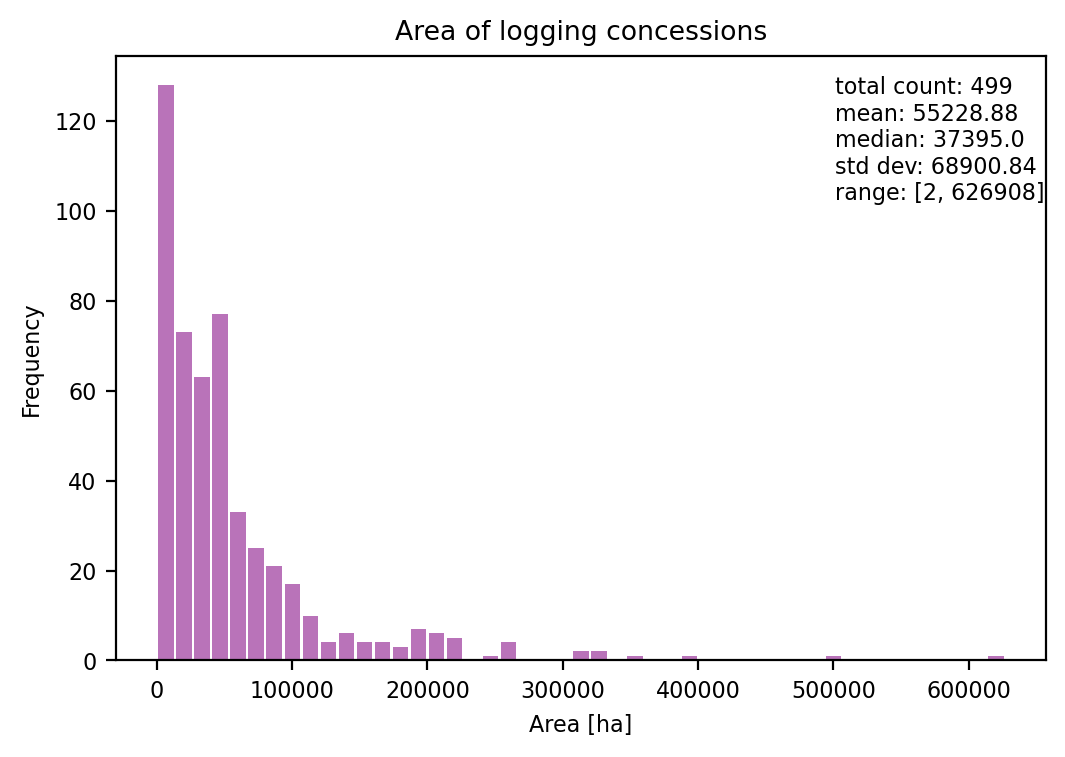

year


KeyError: 'year'

In [162]:
# covariates
for feat in features_by_lc_dropped.columns[1:10]:
    print(feat)
    make_hist(features_by_lc_dropped[feat], title=feat.capitalize() + " of logging concessions", \
        xlabel=feat.capitalize() + " ["+feat_units[feat]+ "]", show_stats=True)


count: 499
mean: 0.5050100200400801
median: 0.0
std dev: 1.8418087492564112
range: 0 26


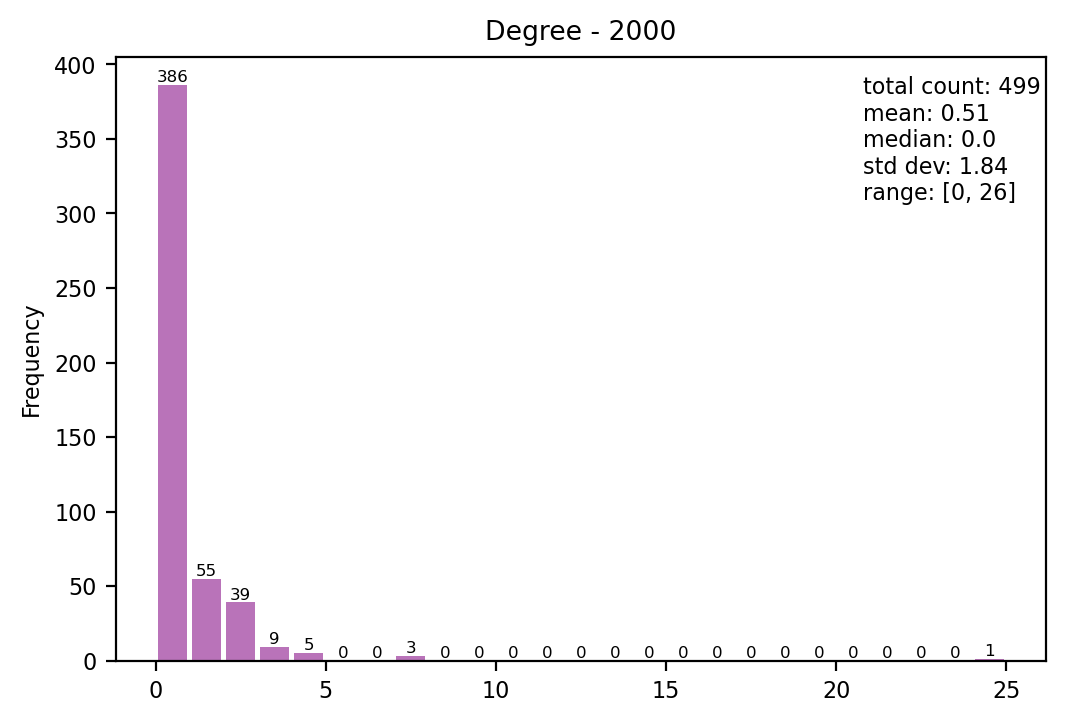

count: 499
mean: 0.5791583166332666
median: 0.0
std dev: 1.870359050809197
range: 0 26


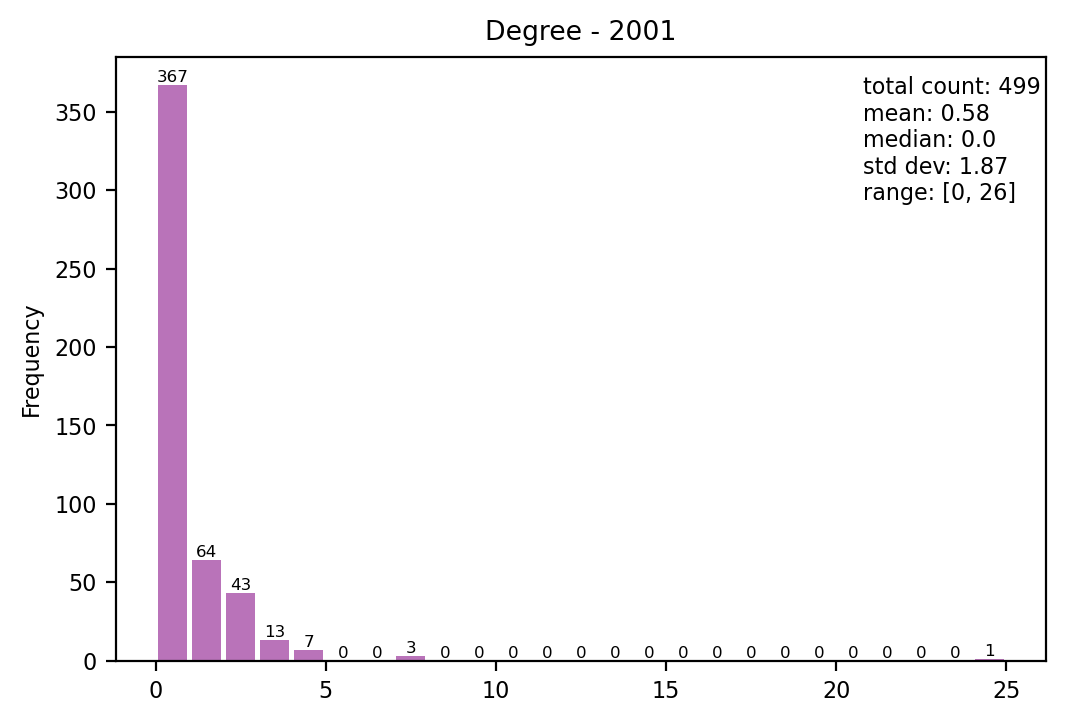

count: 499
mean: 0.6052104208416834
median: 0.0
std dev: 1.8840254801438618
range: 0 26


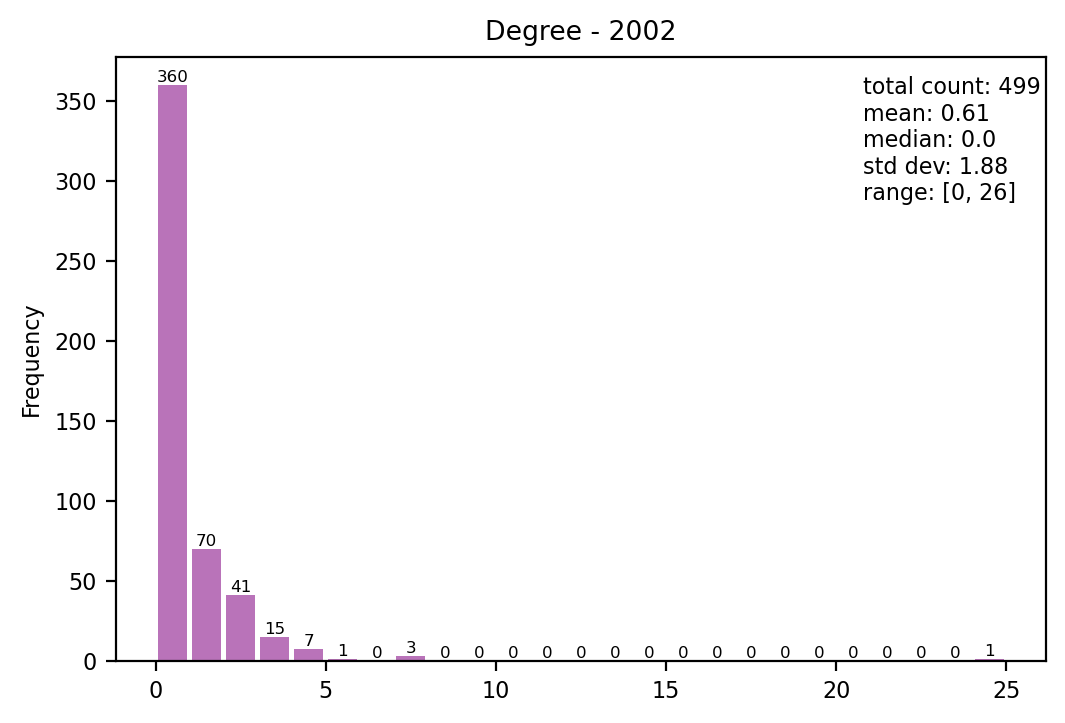

count: 499
mean: 0.6052104208416834
median: 0.0
std dev: 1.8840254801438618
range: 0 26


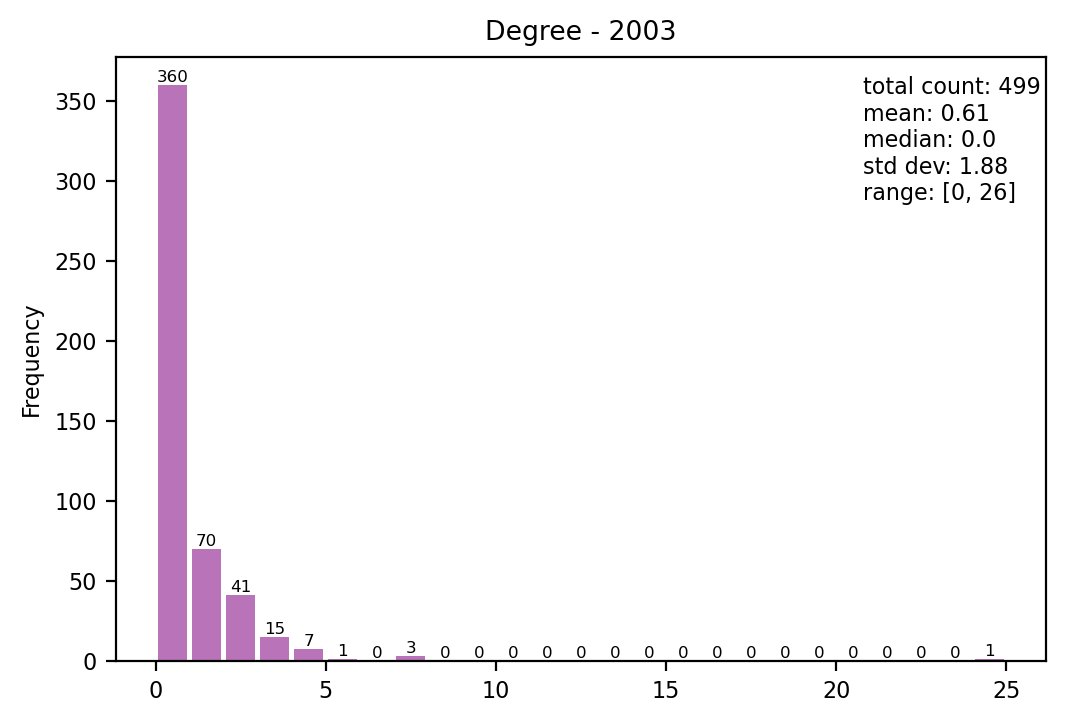

count: 499
mean: 0.6773547094188377
median: 0.0
std dev: 1.904037534898261
range: 0 26


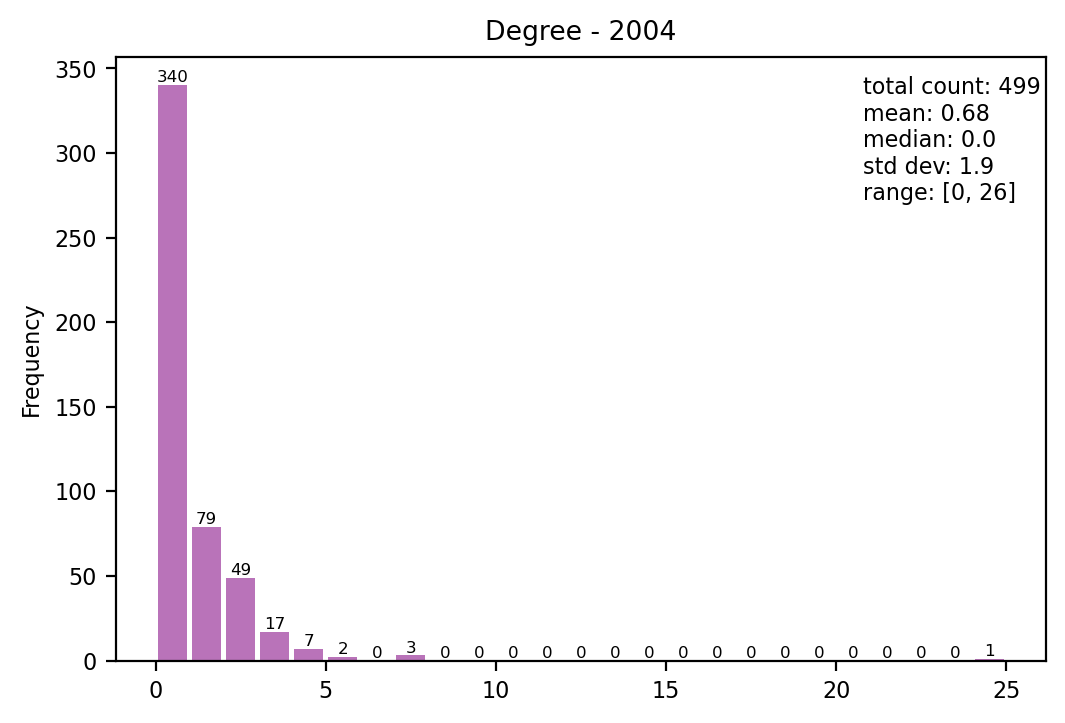

count: 499
mean: 0.7535070140280561
median: 0.0
std dev: 1.9330898577788342
range: 0 26


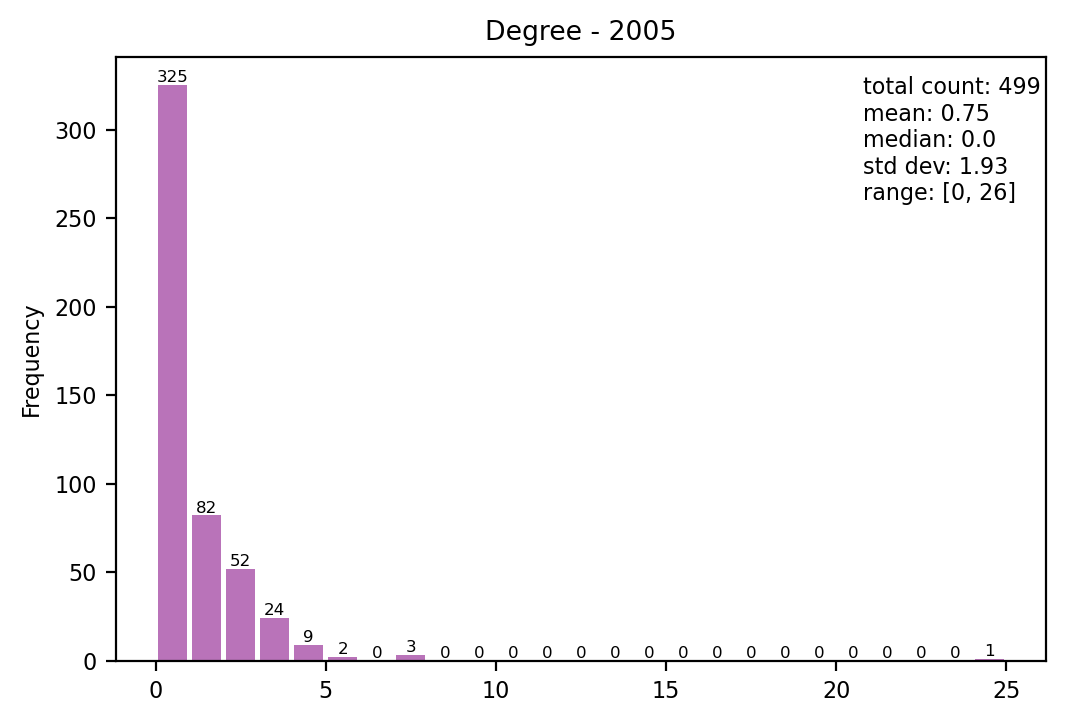

count: 499
mean: 1.0961923847695392
median: 0.0
std dev: 2.1041912395519846
range: 0 26


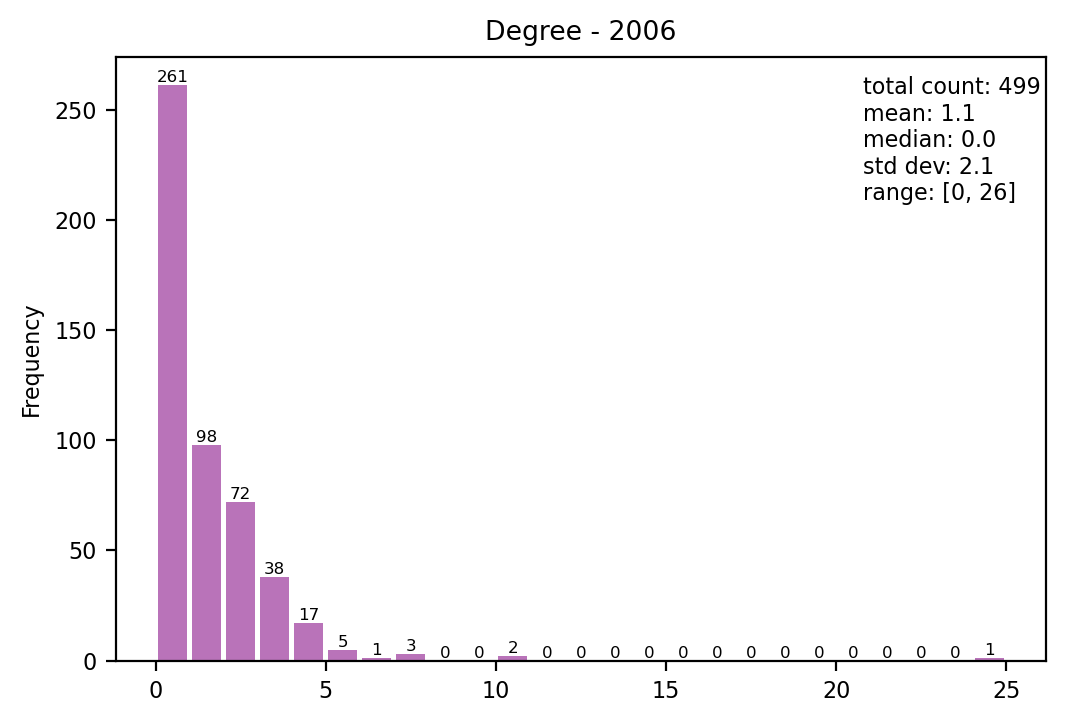

count: 499
mean: 1.1523046092184368
median: 1.0
std dev: 2.10278222495101
range: 0 26


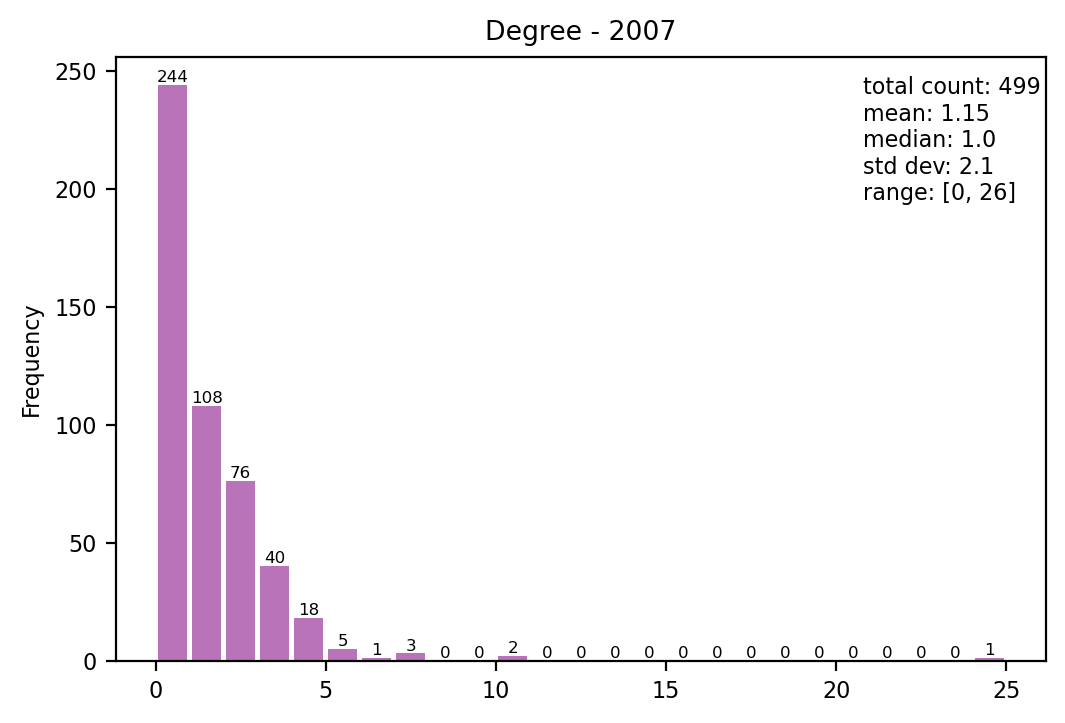

count: 499
mean: 1.2344689378757514
median: 1.0
std dev: 2.144839140451782
range: 0 26


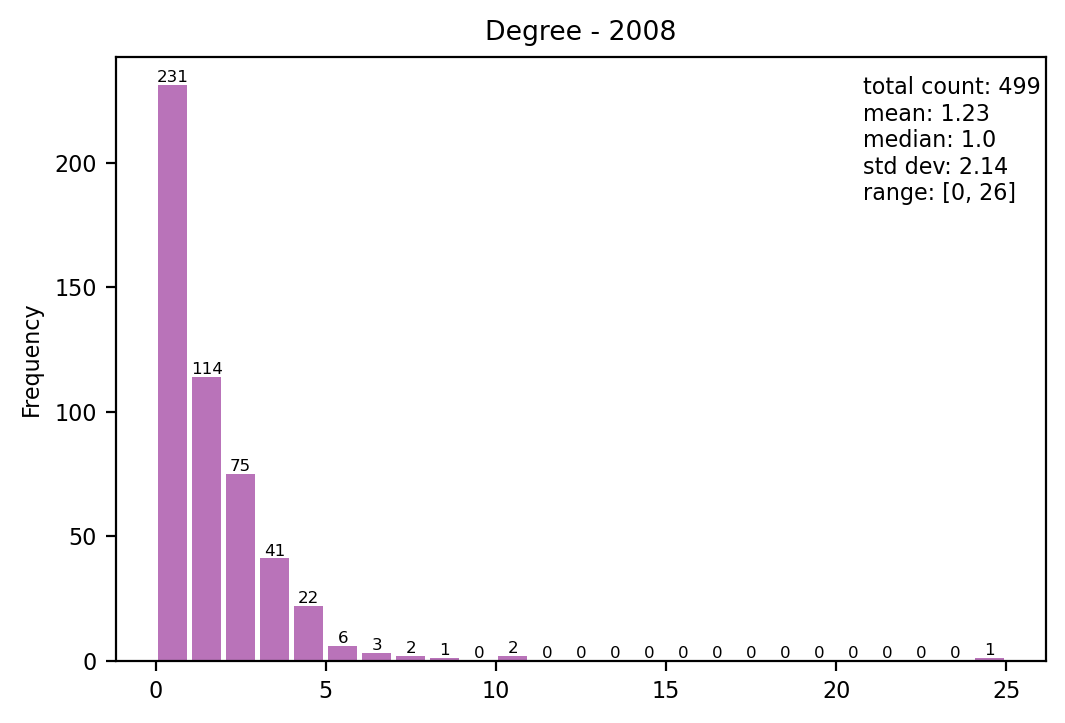

count: 499
mean: 1.5410821643286574
median: 1.0
std dev: 2.170076980077306
range: 0 26


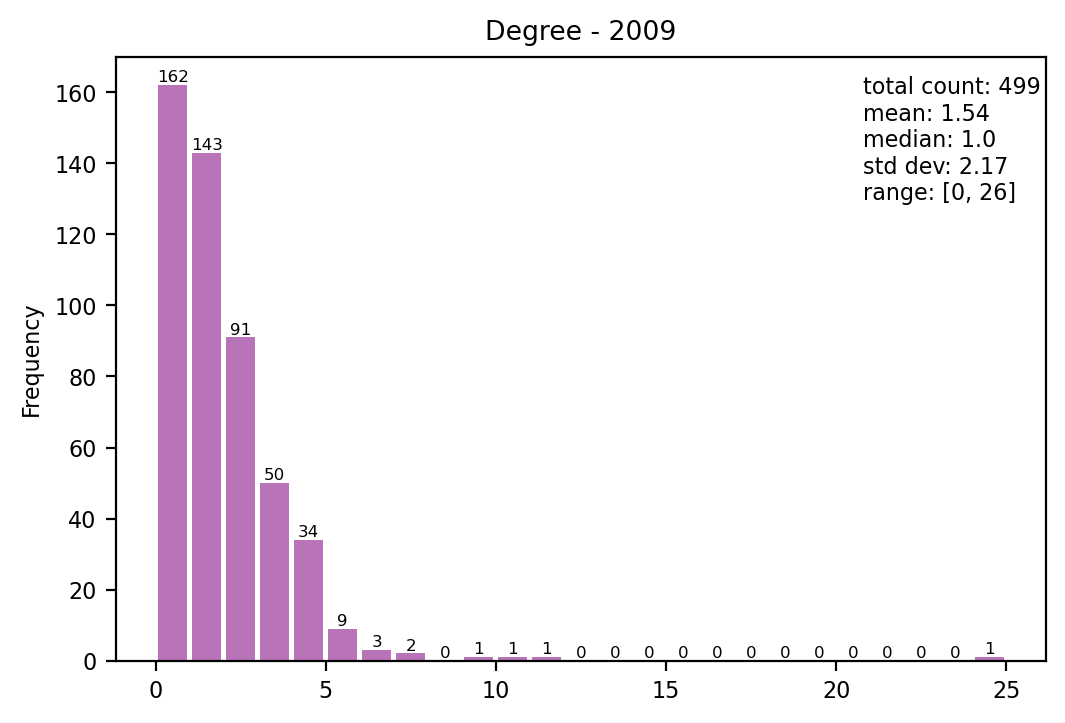

In [163]:
for yr in range(2000, 2010):
    make_hist(features_by_lc_dropped["degree"+str(yr)], bins=range(max(features_by_lc_dropped["degree"+str(yr)])), \
        title ="Degree - " + str(yr), show_bar_label=True, show_stats=True)

In [ ]:
# proportion deforested
# for i in range(10):
#     year = "200"+str(i)
#     # print(adj_mat.dot(features_by_lc.loc[:, "defor"+year].fillna(0)))
#     features_by_lc_dropped["defor"+year+"prop"] = features_by_lc_dropped.loc[:, "defor"+year]/features_by_lc_dropped.loc[:, "area"]
# features_by_lc_dropped


In [172]:
# build neighbor effects
for i in range(10):
    year = "200"+str(i)
    # print(adj_mat.dot(features_by_lc.loc[:, "defor"+year].fillna(0)))
    features_by_lc_dropped["neighbor"+year] = adj_mats[i].dot(features_by_lc.loc[:, "defor"+year].fillna(0)) # absolute value
    features_by_lc_dropped["neighbor"+year+"prop"] = adj_mats[i].dot(features_by_lc.loc[:, "defor"+year+"prop"].fillna(0)) # proportion
    # features_by_lc_dropped["neighbor"+year] = adj_mat.dot(features_by_lc.loc[:, "defor"+year].fillna(0)) # absolute value
    # features_by_lc_dropped["neighbor"+year+"prop"] = adj_mat.dot(features_by_lc.loc[:, "defor"+year+"prop"].fillna(0)) # proportion
features_by_lc_dropped


id    area  year      slope        elev    distroad  distcapital  \
0      1   25677  2009   5.703810  136.713525   78.973377   188.636000   
1      2   47812  2009   5.481341  143.491448  128.181840   162.474440   
2      3   94835  2008   7.100132  369.296201   13.425867   280.545799   
3      4  261827  2009   3.185515   98.517925   27.137641   174.347466   
4      5   53587  2008   8.018633  431.265148   15.181501   249.199159   
..   ...     ...   ...        ...         ...         ...          ...   
494  552   66716  2009  10.796225  196.243718  128.620993   357.180554   
495  554   12340  2009  12.754385  528.159760  156.620120   245.317720   
496  555   49459  2009  11.012047  306.129807  162.870260   243.175411   
497  556   31252  2009  14.942977  351.004888   48.895012   403.195735   
498  557   42701  2009  16.475440  404.242175   67.752341   414.572587   

     peatdepth  biomasscarbonruesch    soilcarbon  ...  neighbor2005  \
0          0.0        288831.136720  61542.313333  ...           0.0   
1          0.0        272221.832142  61539.484544  ...           0.0   
2          0.0        307651.118975  61544.352106  ...           0.0   
3          0.0        267778.996626  68668.220746  ...           0.0   
4          0.0        301675.907935  61545.272414  ...           0.0   
..         ...                  ...           ...  ...           ...   
494        0.0        295600.130104  43311.581187  ...           0.0   
495        0.0        306831.090046  92354.434063  ...           0.0   
496        0.0        292592.035444  89097.703384  ...           0.0   
497        0.0        302653.468888  60696.087878  ...           0.0   
498        0.0        300196.835456  44508.039297  ...           0.0   

     neighbor2005prop  neighbor2006  neighbor2006prop  neighbor2007  \
0                 0.0           0.0               0.0           0.0   
1                 0.0           0.0               0.0           0.0   
2                 0.0           0.0               0.0           0.0   
3                 0.0           0.0               0.0           0.0   
4                 0.0           0.0               0.0           0.0   
..                ...           ...               ...           ...   
494               0.0           0.0               0.0           0.0   
495               0.0           0.0               0.0           0.0   
496               0.0           0.0               0.0           0.0   
497               0.0           0.0               0.0           0.0   
498               0.0           0.0               0.0           0.0   

     neighbor2007prop  neighbor2008  neighbor2008prop  neighbor2009  \
0                 0.0      0.000000          0.000000     43.979590   
1                 0.0      0.000000          0.000000     33.612894   
2                 0.0     60.357295          0.001124     38.350438   
3                 0.0      0.000000          0.000000    809.215903   
4                 0.0    373.733958          0.006152    254.523326   
..                ...           ...               ...           ...   
494               0.0      0.000000          0.000000     36.868038   
495               0.0      0.000000          0.000000    744.578939   
496               0.0      0.000000          0.000000    744.578939   
497               0.0      0.000000          0.000000    581.395477   
498               0.0      0.000000          0.000000    121.420474   

     neighbor2009prop  
0            0.000434  
1            0.000824  
2            0.001187  
3            0.010239  
4            0.004166  
..                ...  
494          0.000218  
495          0.001914  
496          0.001914  
497          0.001170  
498          0.001407  

[499 rows x 63 columns]

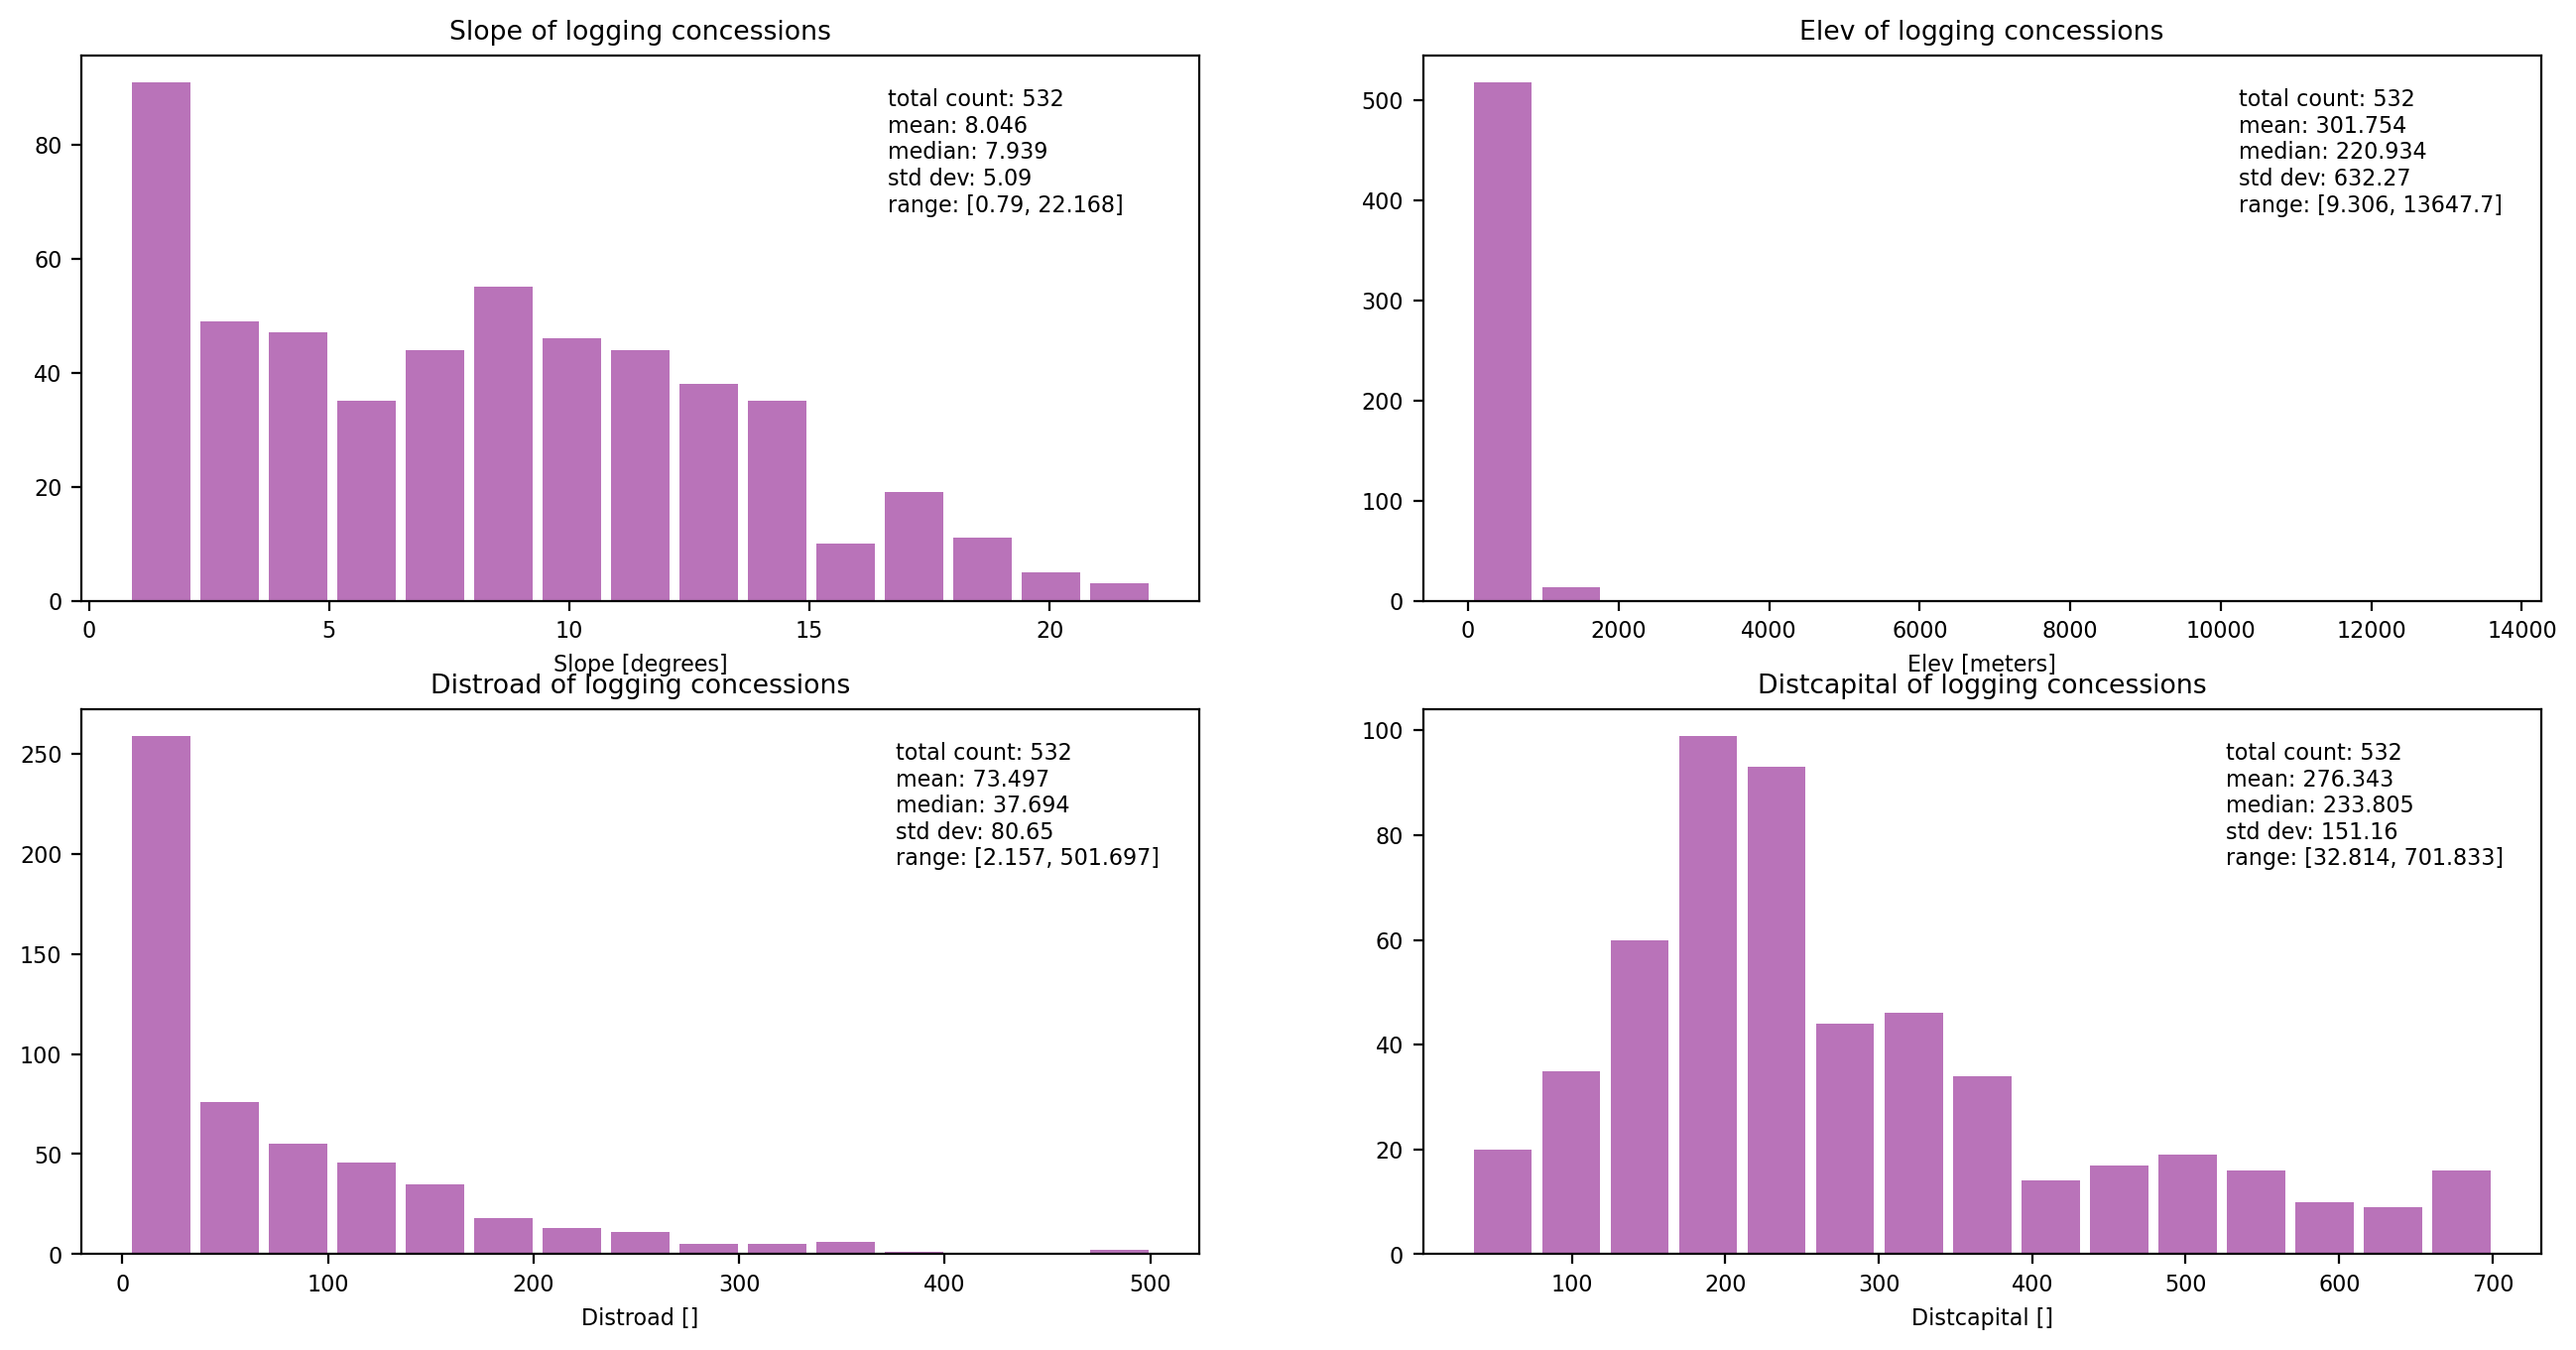

In [ ]:
fig, axs = plt.subplots(2, 2, sharex=False, sharey=False, figsize=(16,8) )

features = [feat for feat in features_by_lc_dropped.columns[2:6]]
for i in range(2):
    for j in range(2):
    # print(feat)
        ind = i*2+ j
        # axs[i,j]
        feat = features[ind]
        # make_hist(features_by_lc_dropped[feat], title=feat.capitalize() + " of logging concessions", \
        #     xlabel=feat.capitalize() + " ["+feat_units[feat]+ "]", show_stats=True, ax=axs[i,j])

        data = features_by_lc_dropped[feat]
        y, x, _ = axs[i,j].hist(data, bins=15, rwidth=0.85, color="purple", alpha=.55)
        text = "total count: " + str(len(data)) + "\nmean: "+ str(round(np.average(data), 3)) + "\nmedian: " + str(round(np.median(data), 3)) + \
                    "\nstd dev: " + str(round(np.std(data), 2)) + "\nrange: [" + str(round(min(data), 3)) + ", " + str(round(max(data), 3)) + "]" #[0, 26]"
        axs[i,j].text(s=text,x=max(data)*.75, y=y.max()*.75, size=8)
        axs[i,j].set_title(feat.capitalize() + " of logging concessions")
        axs[i,j].set_xlabel(feat.capitalize() + " ["+feat_units[feat]+ "]")

['peatdepth', 'biomasscarbonruesch', 'soilcarbon', 'biomasscarbonbaccini']
0
1
2
3


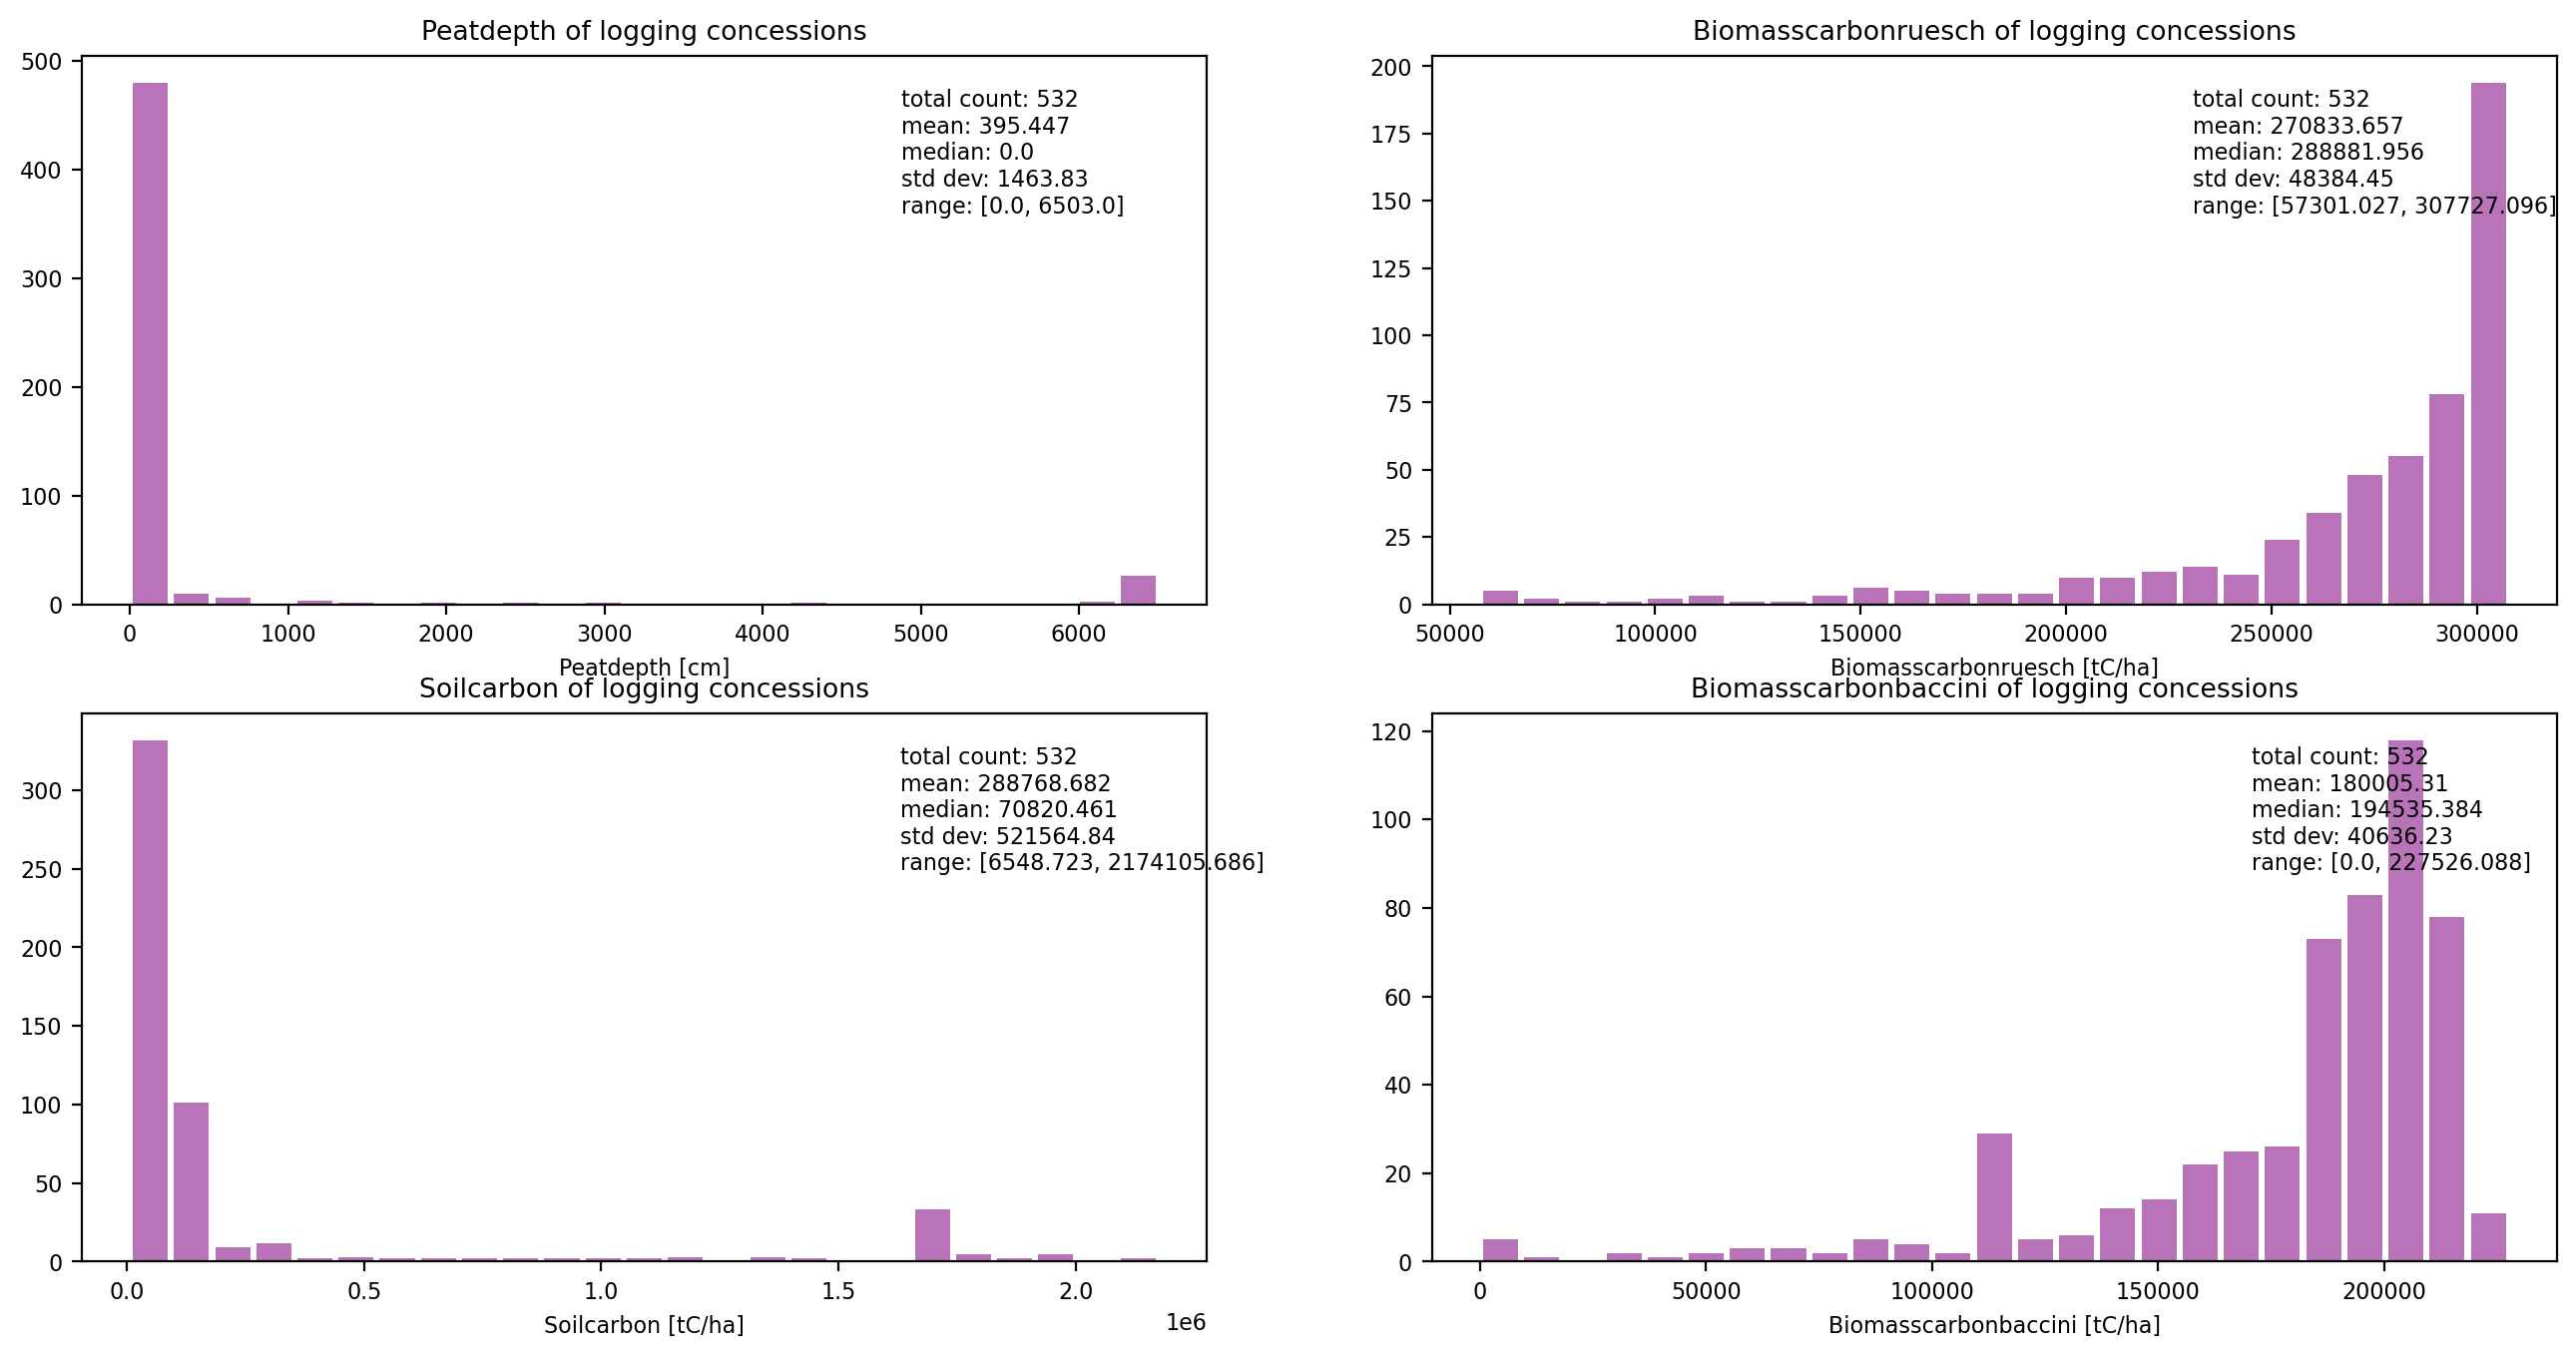

In [ ]:
fig, axs = plt.subplots(2, 2, sharex=False, sharey=False, figsize=(16,8) )

features = [feat for feat in features_by_lc_dropped.columns[6:10]]
print(features)
for i in range(2):
    for j in range(2):
    # print(feat)
        ind = i*2+ j
        print(ind)
        # axs[i,j]
        feat = features[ind]
        # make_hist(features_by_lc_dropped[feat], title=feat.capitalize() + " of logging concessions", \
        #     xlabel=feat.capitalize() + " ["+feat_units[feat]+ "]", show_stats=True, ax=axs[i,j])

        data = features_by_lc_dropped[feat]
        y, x, _ = axs[i,j].hist(data,  rwidth=0.85, bins = 25, color="purple", alpha=.55)
        text = "total count: " + str(len(data)) + "\nmean: "+ str(round(np.average(data), 3)) + "\nmedian: " + str(round(np.median(data), 3)) + \
                    "\nstd dev: " + str(round(np.std(data), 2)) + "\nrange: [" + str(round(min(data), 3)) + ", " + str(round(max(data), 3)) + "]" #[0, 26]"
        axs[i,j].text(s=text,x=max(data)*.75, y=y.max()*.75, size=8)
        axs[i,j].set_title(feat.capitalize() + " of logging concessions")
        axs[i,j].set_xlabel(feat.capitalize() + " ["+feat_units[feat]+ "]")

Text(0.5, 0.98, 'Deforestation [ha] within concessions from 2000-2009 (close up)')

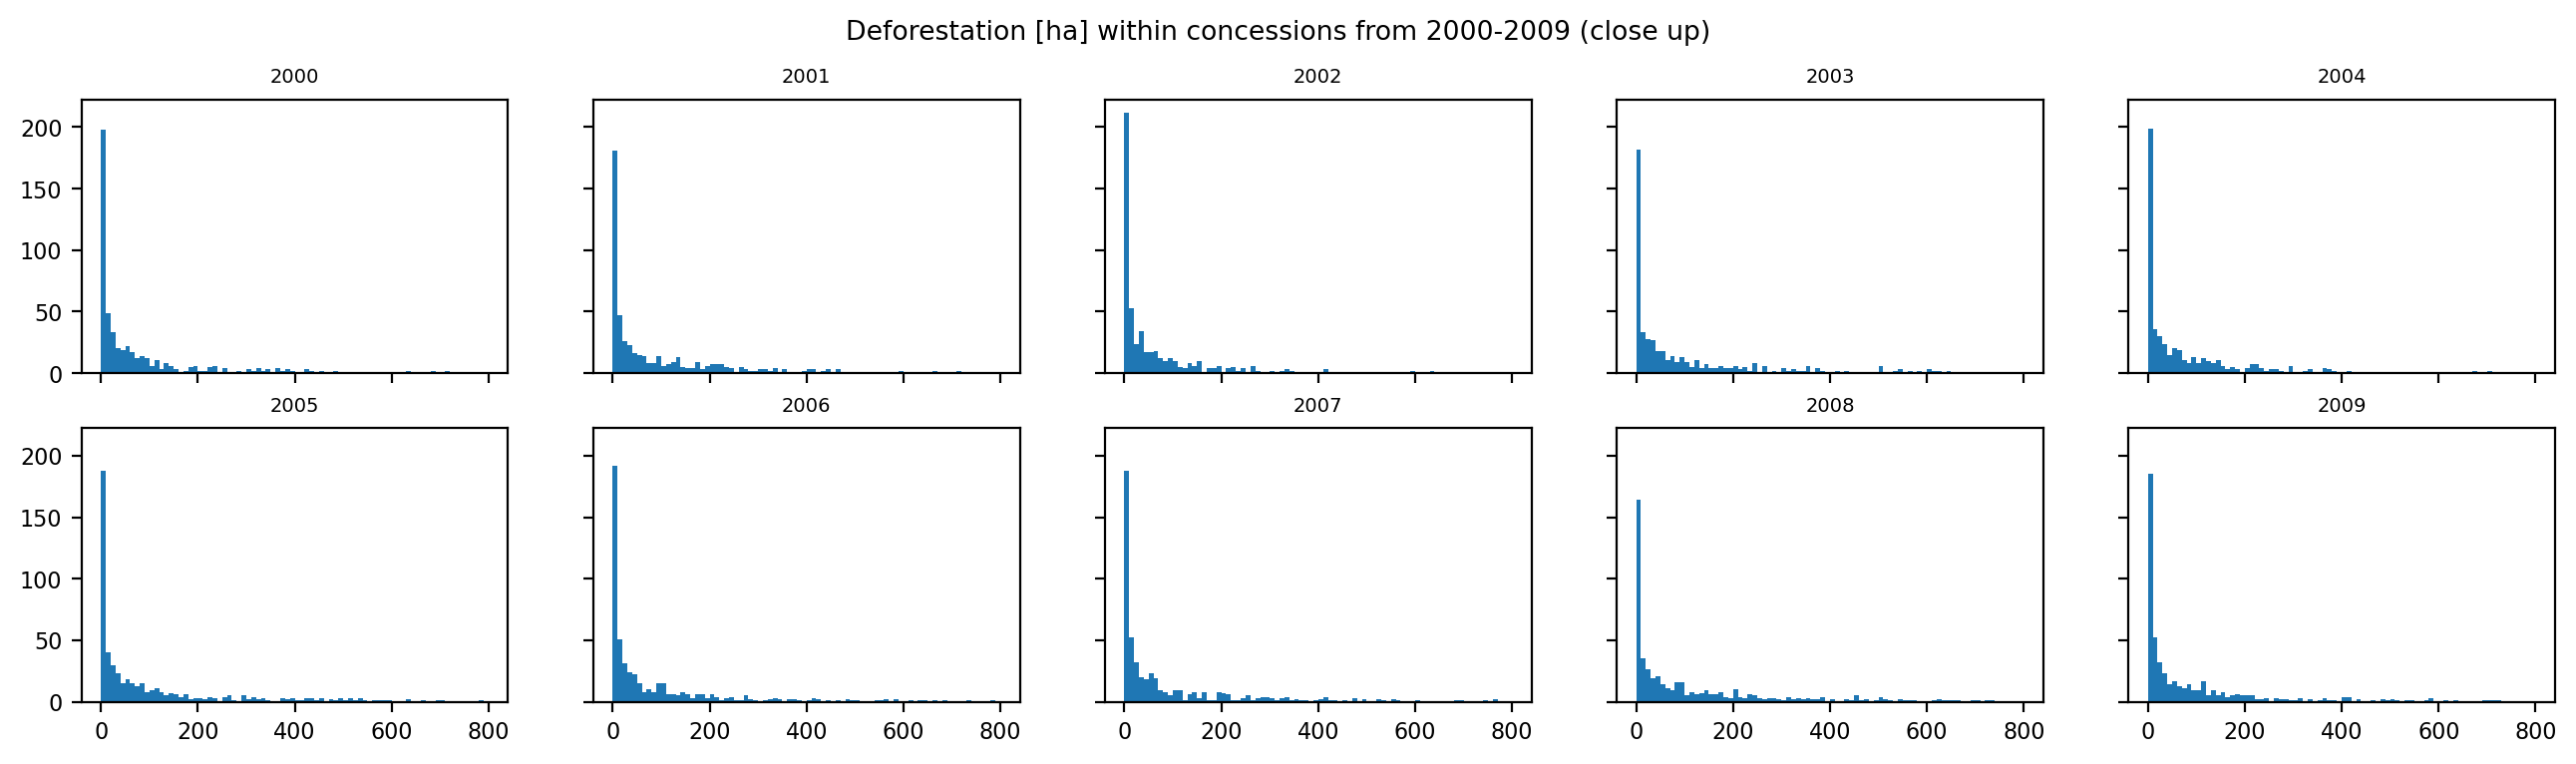

In [ ]:
plt.rcParams.update({'font.size': 8})

fig, axs = plt.subplots(2, 5, sharex=True, sharey=True, figsize=(16,4) )
bins =np.histogram(np.hstack(([features_by_lc_dropped["defor200"+str(year)] for year in range(10)])), bins=60)[1]
for i in range(5): # rows
    for j in range(2): # cols
        year = str(i + j*5)
        # axs[j, i].hist(features_by_lc_dropped["defor200" + year], bins=bins) # full size
        axs[j, i].hist(features_by_lc_dropped["defor200" + year], bins=80, range=(0, 800)) # restricted
        # axs[j, i].text(s="200"+year, size=7, y=450, x=350000)
        axs[j, i].set_title("200"+year, size=7)


# fig, axs = plt.subplots(10, sharex=True, sharey=True, figsize=(4,8) )
# for year in range(10): # rows
#     axs[year].hist(features_by_lc_dropped["defor200" + str(year)])
#     # axs[year].set_title("defor200"+str(year))

fig.suptitle("Deforestation [ha] within concessions from 2000-2009 (close up)")    

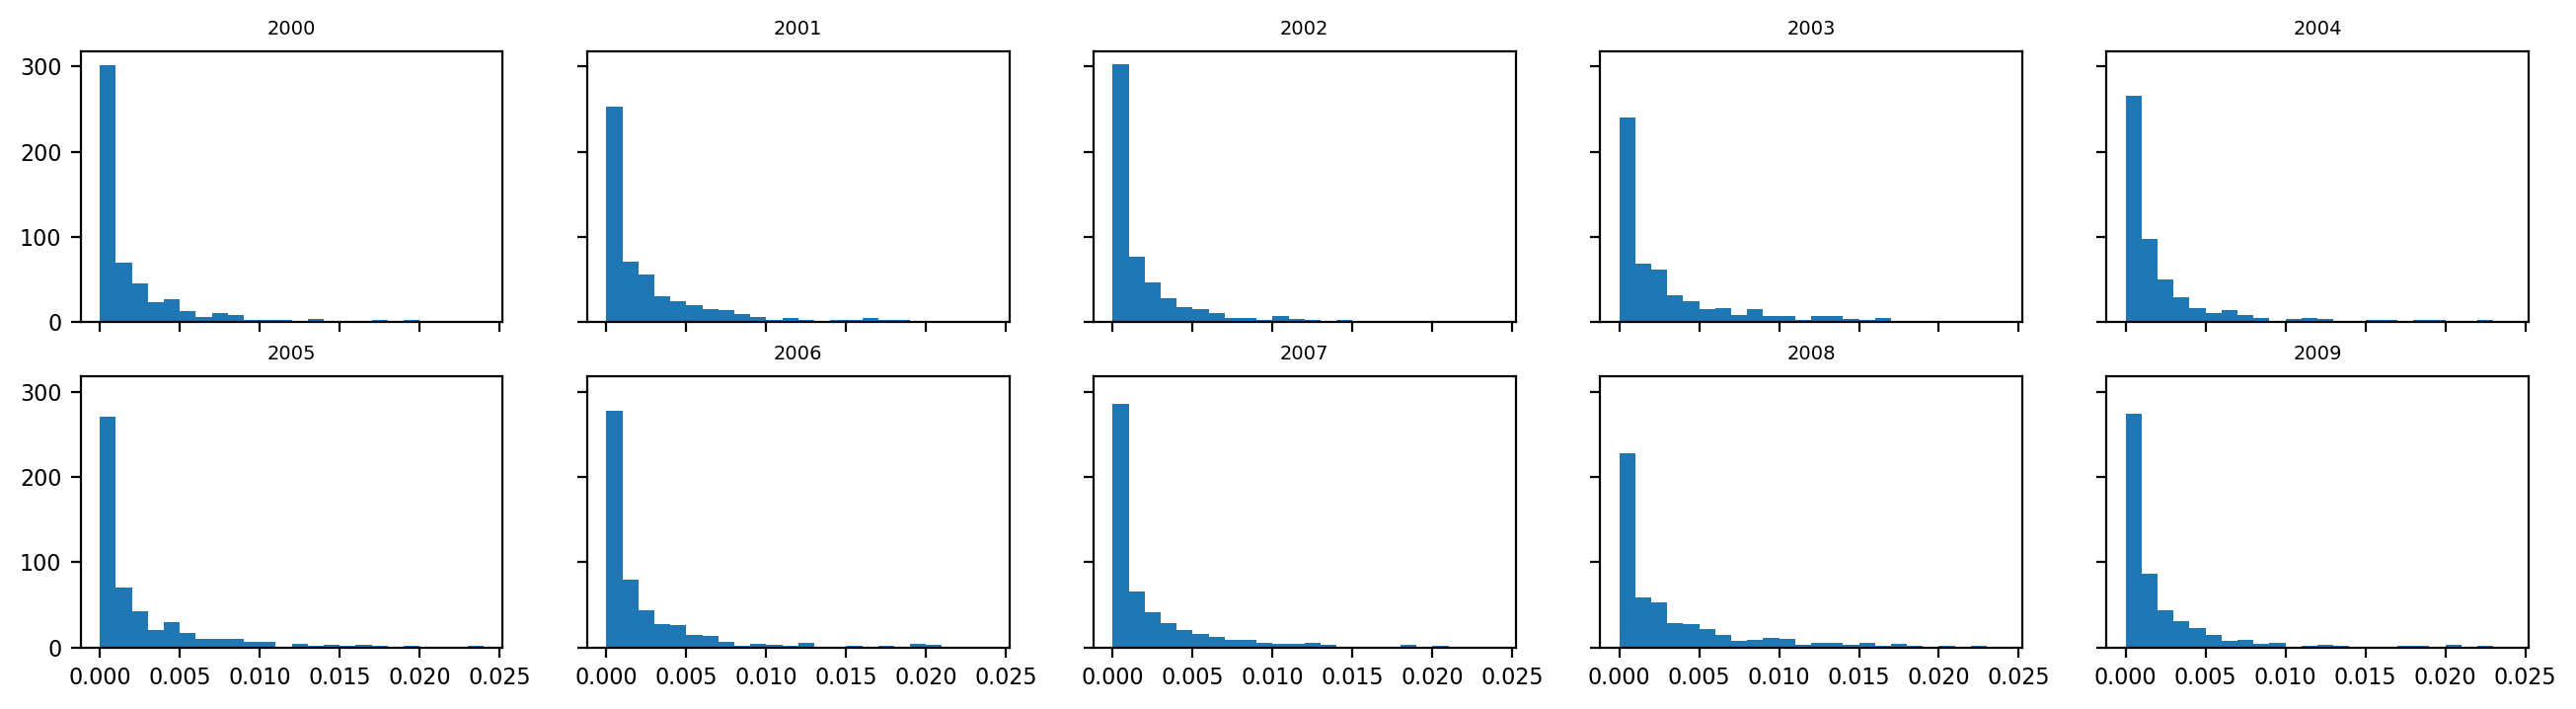

In [ ]:
fig, axs = plt.subplots(2, 5, sharex=True, sharey=True, figsize=(16,4) )
# bins=np.histogram(np.hstack(([features_by_lc_dropped["defor200"+str(year)+"prop"] for year in range(10)])), bins=40)[1]
for i in range(5): # rows
    for j in range(2): # cols
        year = str(i + j*5)
        axs[j, i].hist(features_by_lc_dropped["defor200" + year + "prop"], bins=[i for i in np.arange(0, 0.025, .001)])
        # axs[j, i].text(s="200"+year, size=7, y=450, x=350000)
        axs[j, i].set_title("200"+year, size=7)



[113 132 139 139 159 174 238 255 268 337]
[0 1 0 0 1 4 2 2 6 3]


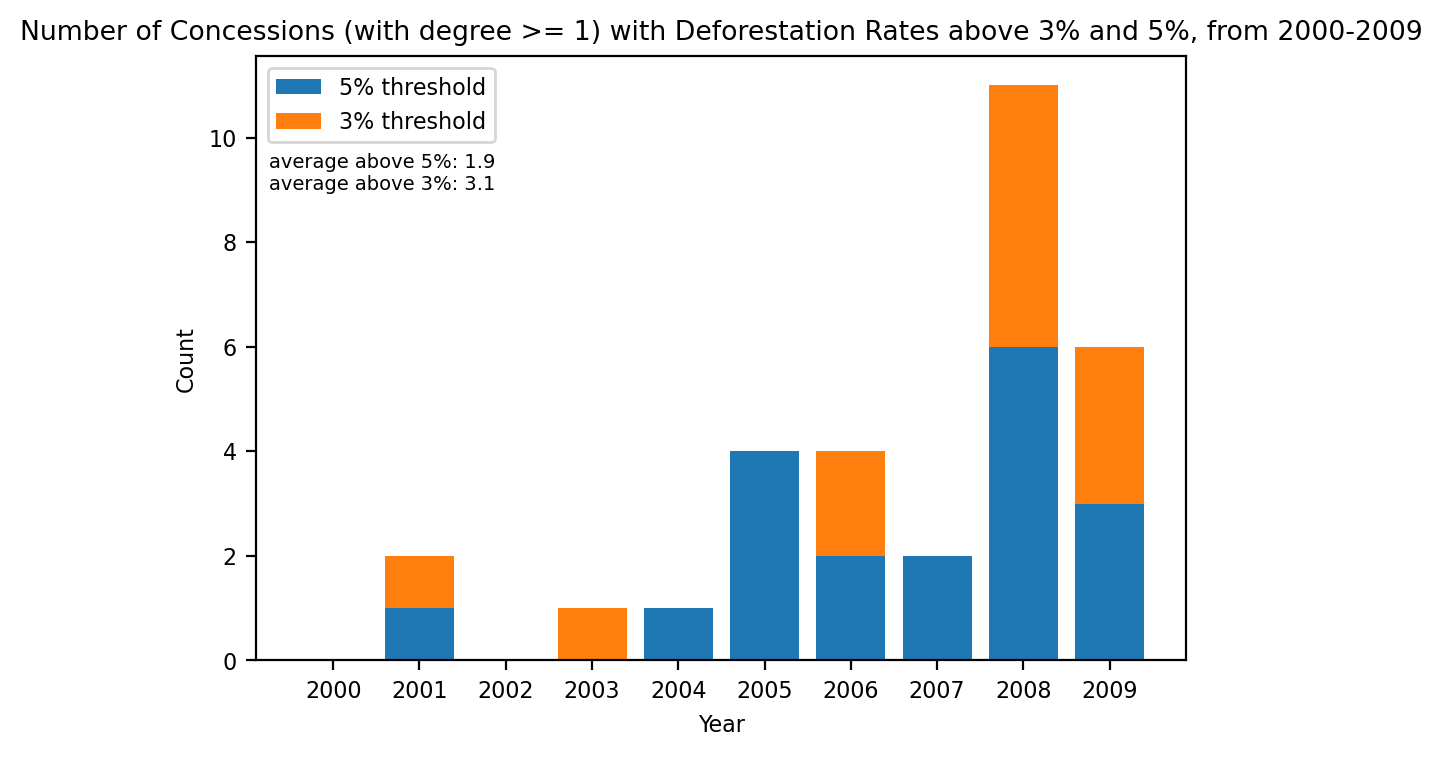

[0 1 0 1 0 0 2 0 5 3] [0 1 0 0 1 4 2 2 6 3] [113 132 139 139 159 174 238 255 268 337]


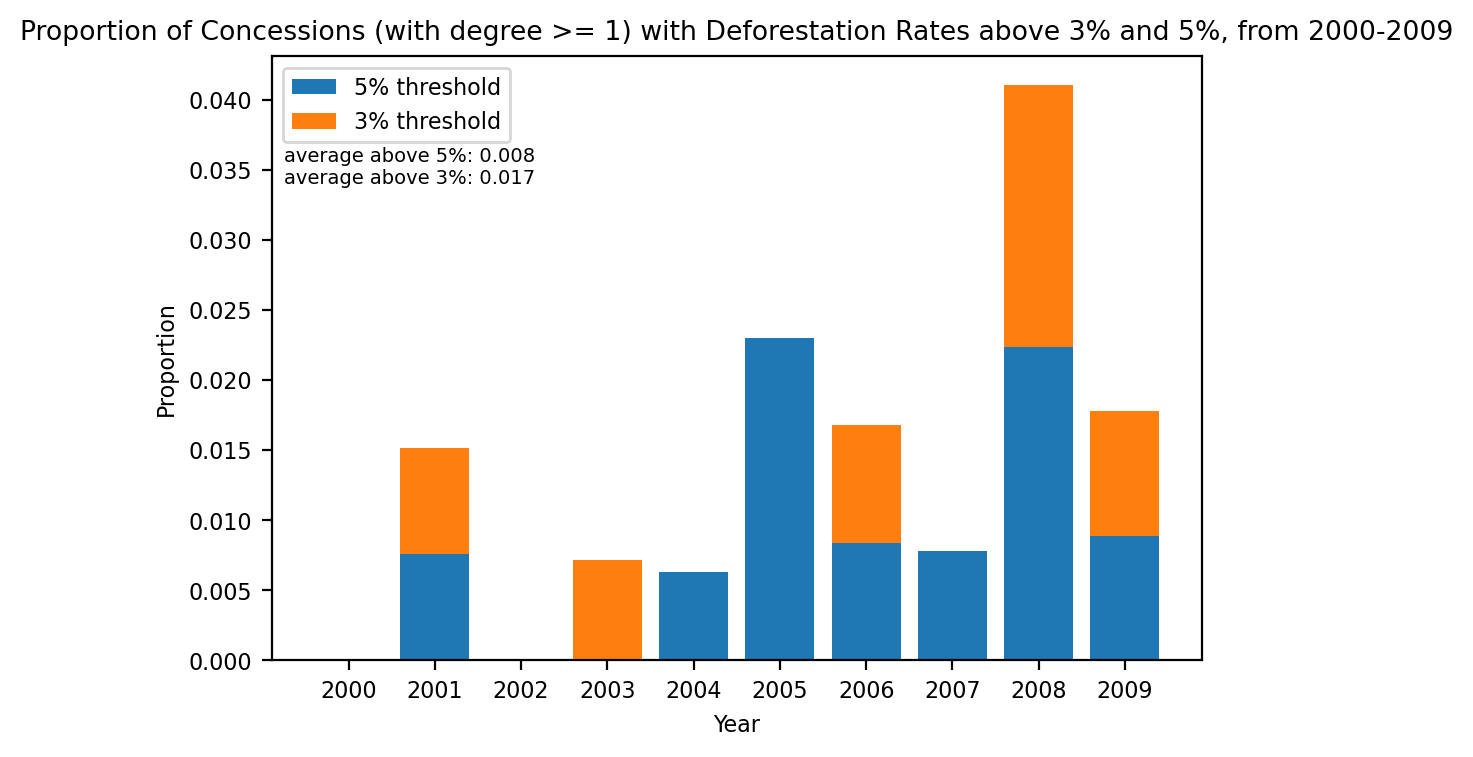

In [217]:
defor_per_year = [] # proportion of land deforested in each concession, by year
for year in range(10):
    filtered_feats = features_by_lc_dropped.iloc[low_degs_by_year[year], :]
    defor_per_year.append(filtered_feats["defor200" + str(year) + "prop"])

items_per_year = np.array([len(i) for i in defor_per_year])
print(items_per_year)
# defor_above_3 = [[i for i in range(len(ls)) if i >= 0.03 and i < 0.05] for ls in defor_per_year]
# defor_above_5 = [[i for i in range(len(ls)) if i >= 0.05] for ls in defor_per_year]

count_defor_above_3 = np.array([len([i for i in ls if i >= 0.03 and i < 0.05]) for ls in defor_per_year]) # number of concessions with 3-5% deforested land, by year
count_defor_above_5 = np.array([len([i for i in ls if i >= 0.05]) for ls in defor_per_year]) # number of concessions with 5% or more deforested land, by year
print( count_defor_above_5 ) 

# # boxplots of all data across years
# plt.boxplot(defor_per_year, labels = [str(i) for i in range(2000, 2010)], whis=(2, 98), showfliers=True, showmeans=False)

# # plt.boxplot([features_by_lc_dropped[low_degs_by_year[year], :]["defor200" + str(year) + "prop"] for year in range(10)], showfliers=False)
# plt.title("Deforestation Rates in Concessions from 2000-2009")
# plt.xlabel("Year")
# plt.ylabel("Proportion Deforested")
# # add labels for # points per year
# # plt.text(s = "# points:", x = -.75, y = -0.065, c="orange")
# # for i in range(0, 10):
# #     plt.text(s = items_per_year[i], x=i+.75, y = -.065, c="orange")
# plt.show()



# stacked bar chart showing count of above 3, 5% deforestion
plt.bar(x=range(10), height= count_defor_above_5, label="5% threshold")
plt.bar(x=range(10), height= count_defor_above_3, bottom=count_defor_above_5, label="3% threshold")
plt.xticks(range(10), labels=[str(i) for i in range(2000, 2010)])
plt.title("Number of Concessions (with degree >= 1) with Deforestation Rates above 3% and 5%, from 2000-2009")
plt.xlabel("Year")
plt.ylabel("Count")
plt.text(s="average above 5%: "+str(np.average(count_defor_above_5)) + \
         "\naverage above 3%: "+str(np.average(count_defor_above_5+count_defor_above_3)), \
        x = -0.75, y= 9, size=7)
plt.legend()
plt.show()


# stacked bar chart showing proportion of above 3, 5% deforestion
print(count_defor_above_3, count_defor_above_5, items_per_year)
prop_defor_above_3 = count_defor_above_3/items_per_year
prop_defor_above_5 = count_defor_above_5/items_per_year

plt.bar(x=range(10), height= prop_defor_above_5, label="5% threshold")
plt.bar(x=range(10), height= prop_defor_above_3, bottom=prop_defor_above_5, label="3% threshold")
plt.xticks(range(10), labels=[str(i) for i in range(2000, 2010)])
plt.title("Proportion of Concessions (with degree >= 1) with Deforestation Rates above 3% and 5%, from 2000-2009")
plt.xlabel("Year")
plt.ylabel("Proportion")
plt.text(s="average above 5%: "+str(round(np.average(prop_defor_above_5), 3) ) + \
         "\naverage above 3%: "+str(round(np.average(prop_defor_above_5+prop_defor_above_5), 3)), \
        x = -0.75, y= 0.034, size=7)
plt.legend()
plt.show()

# plt.boxplot([feats_low_degs_dropped[str(year)[-1]]["defor" + str(year) + "prop"] for year in range(2000,2010)], showfliers=False)
# plt.title("Deforestation (proportion) from 2000-2009, outliers excluded")
# plt.show()

In [ ]:
def is_outlier(points, thresh=3.5):
    """
    Returns a boolean array with True if points are outliers and False 
    otherwise.

    Parameters:
    -----------
        points : An numobservations by numdimensions array of observations
        thresh : The modified z-score to use as a threshold. Observations with
            a modified z-score (based on the median absolute deviation) greater
            than this value will be classified as outliers.

    Returns:
    --------
        mask : A numobservations-length boolean array.

    References:
    ----------
        Boris Iglewicz and David Hoaglin (1993), "Volume 16: How to Detect and
        Handle Outliers", The ASQC Basic References in Quality Control:
        Statistical Techniques, Edward F. Mykytka, Ph.D., Editor. 
    """
    if len(points.shape) == 1:
        points = points[:,None]
    median = np.median(points, axis=0)
    diff = np.sum((points - median)**2, axis=-1)
    diff = np.sqrt(diff)
    med_abs_deviation = np.median(diff)

    modified_z_score = 0.6745 * diff / med_abs_deviation

    return modified_z_score > thresh

In [214]:

years = [str(i) for i in range(2000, 2010)]
ids_by_year = {'2000':None}  
for year in years:
    ids_by_year[year] = [i for i in range(len(features_by_lc_dropped)) if features_by_lc_dropped["year"][i] <= int(year)]
    print(year, len(ids_by_year[year]))



2000 255
2001 276
2002 283
2003 283
2004 316
2005 335
2006 406
2007 429
2008 441
2009 495


In [211]:
def make_plot(x_var, y_var, year=None):
    # x_var = "neighbor"+year
    # y_var = "defor"+year
    x = np.array(features_by_lc_dropped[x_var])
    y = np.array(features_by_lc_dropped[y_var])

    # mask = [~is_outlier(y)]
    # plt.scatter(features_by_lc_dropped["degree"][~mask], features_by_lc_dropped["defor2000"][~mask] )

    # mask = ~is_outlier(y)
    # filtered_x, filtered_y = x[mask], y[mask]
    # plt.scatter(filtered_x, filtered_y, s=[2]*len(filtered_x))

    if year is not None:
        x, y = x[ids_by_year[year]], y[ids_by_year[year]]

    print(len(x), len(y))
    plt.scatter(x, y, s=[2]*len(x))

    # plt.hist2d(filtered_x, filtered_y)
    plt.title(x_var + " vs " + y_var)# + ", outliers removed")
    plt.xlabel(x_var)
    plt.ylabel(y_var)

    # plt.text(s="pearson coeff: " + str(round(stats.pearsonr(filtered_x, filtered_y)[0],3)), x=max(filtered_x*5/7), y=0)
    plt.text(s="pearson coeff: " + str(round(stats.pearsonr(x, y)[0],3)), x=max(x*5/7), y=0)

    plt.show()


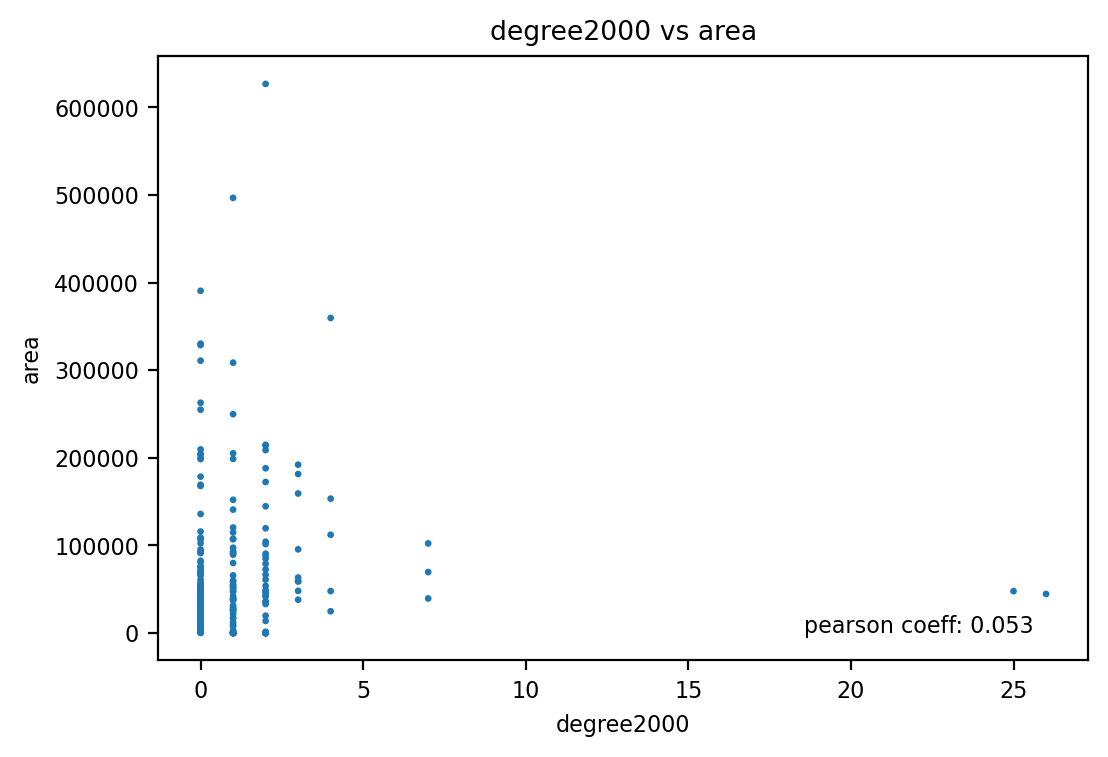

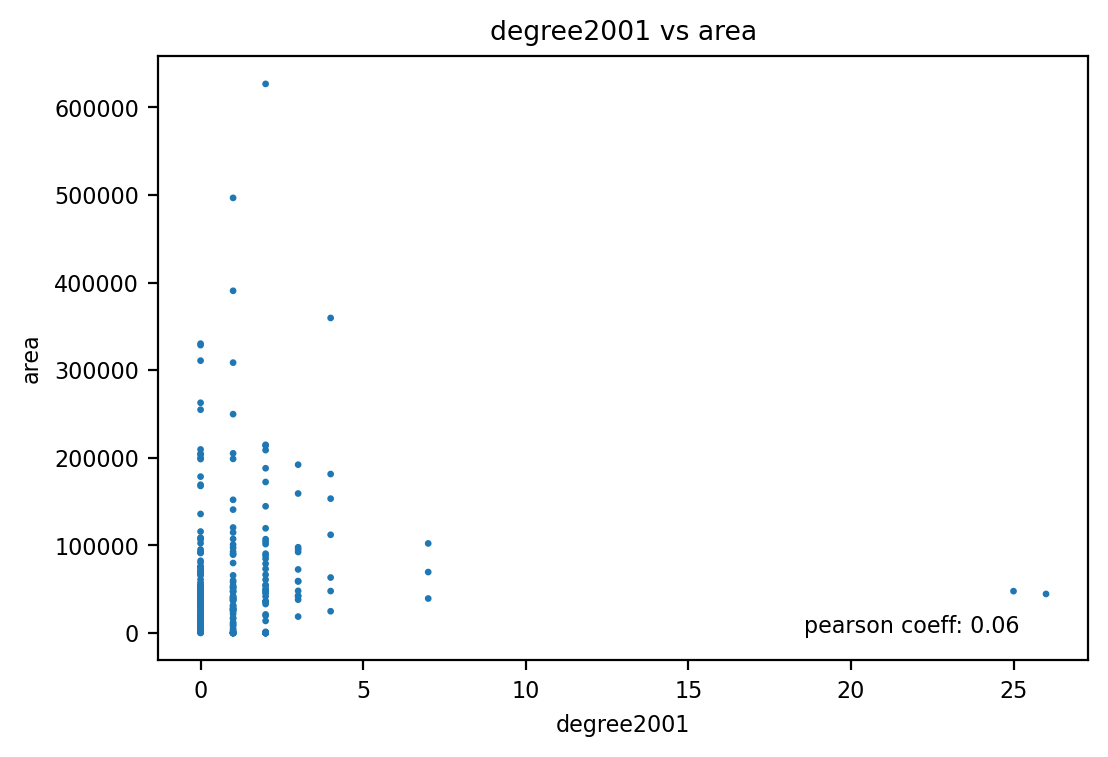

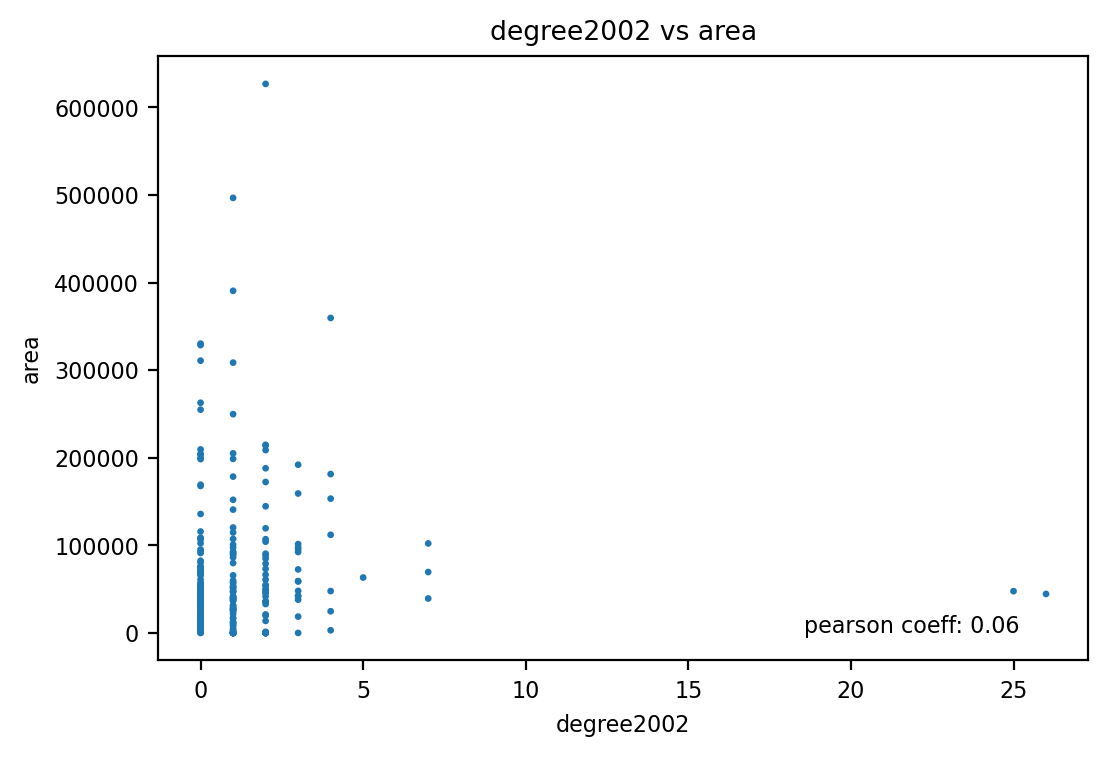

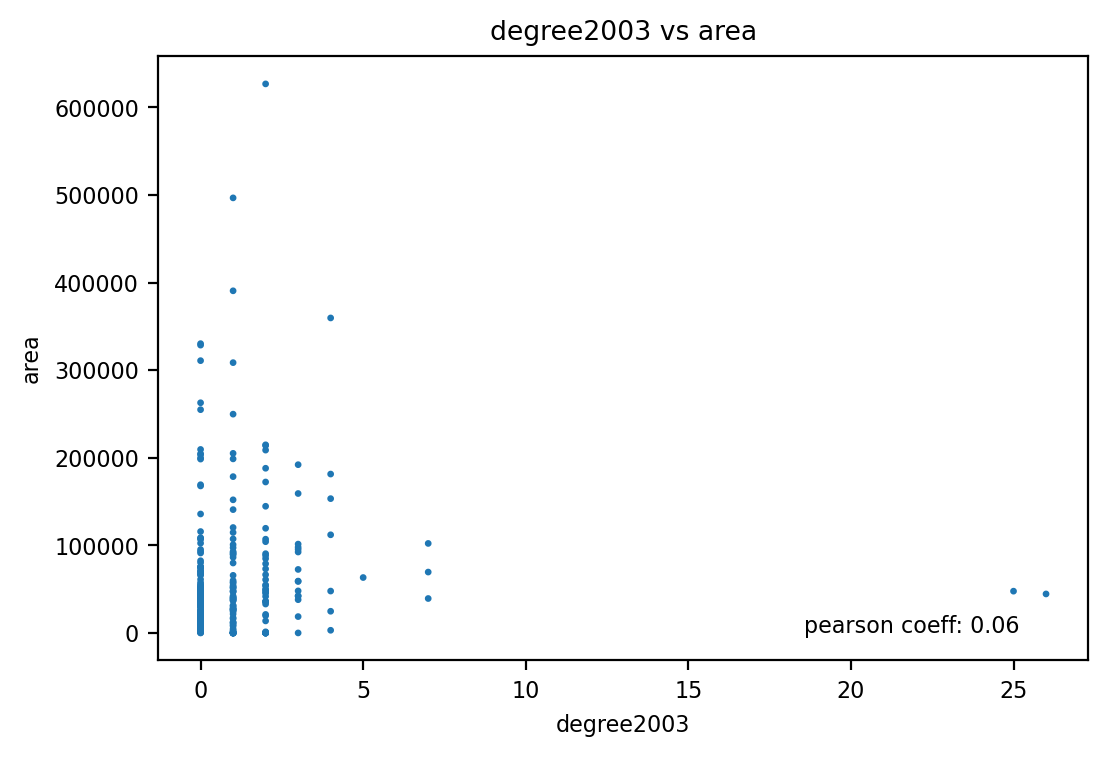

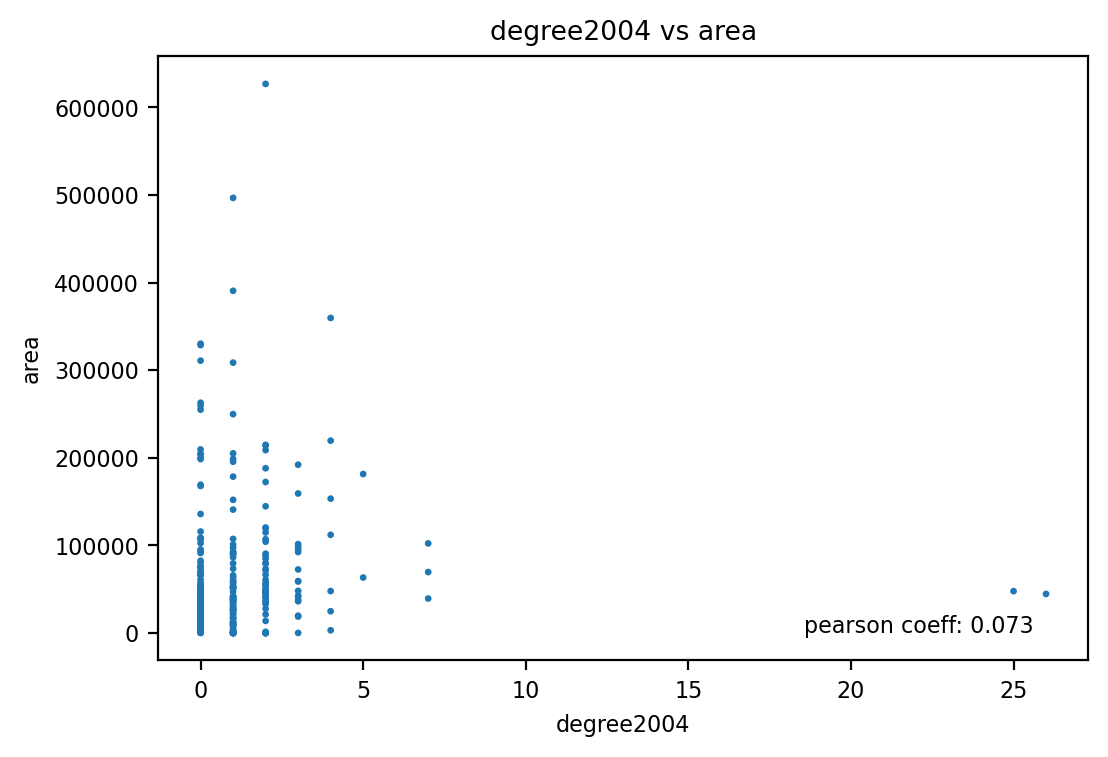

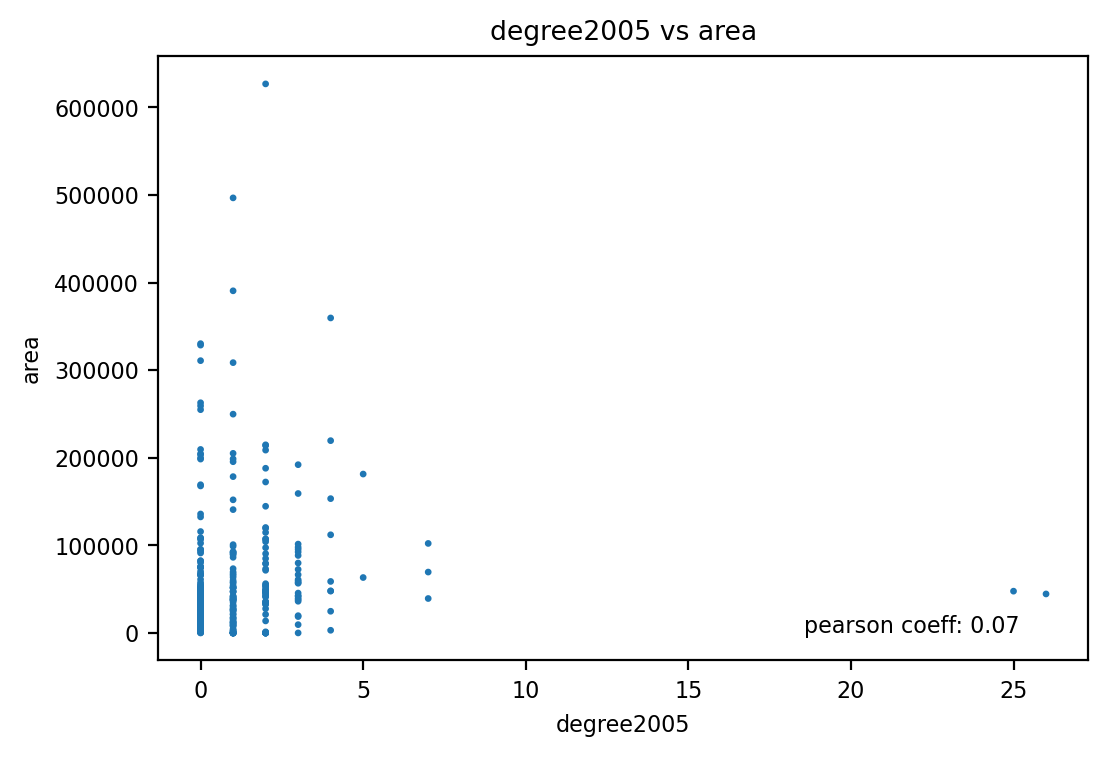

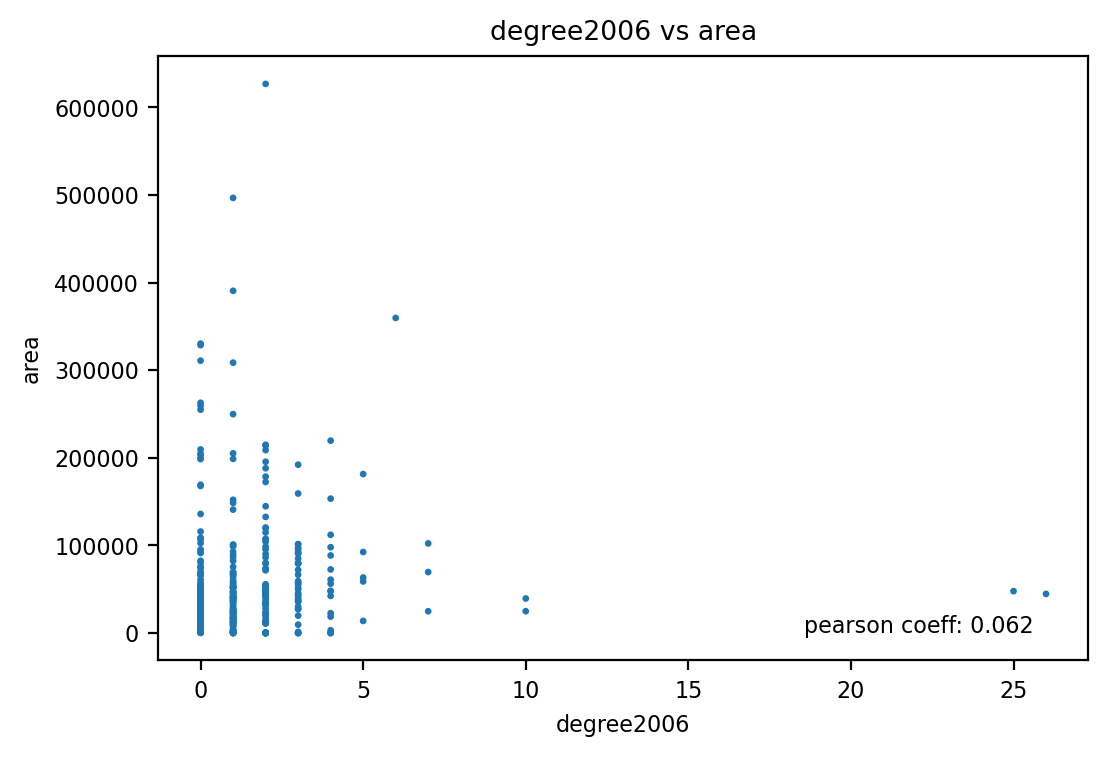

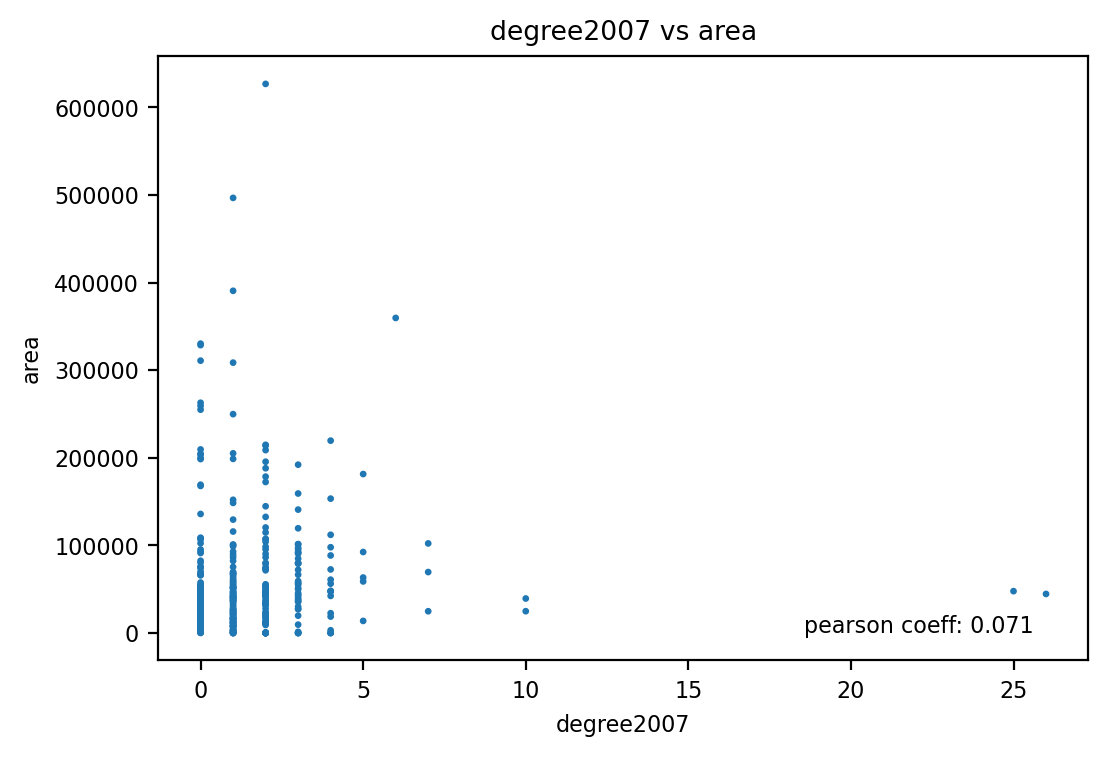

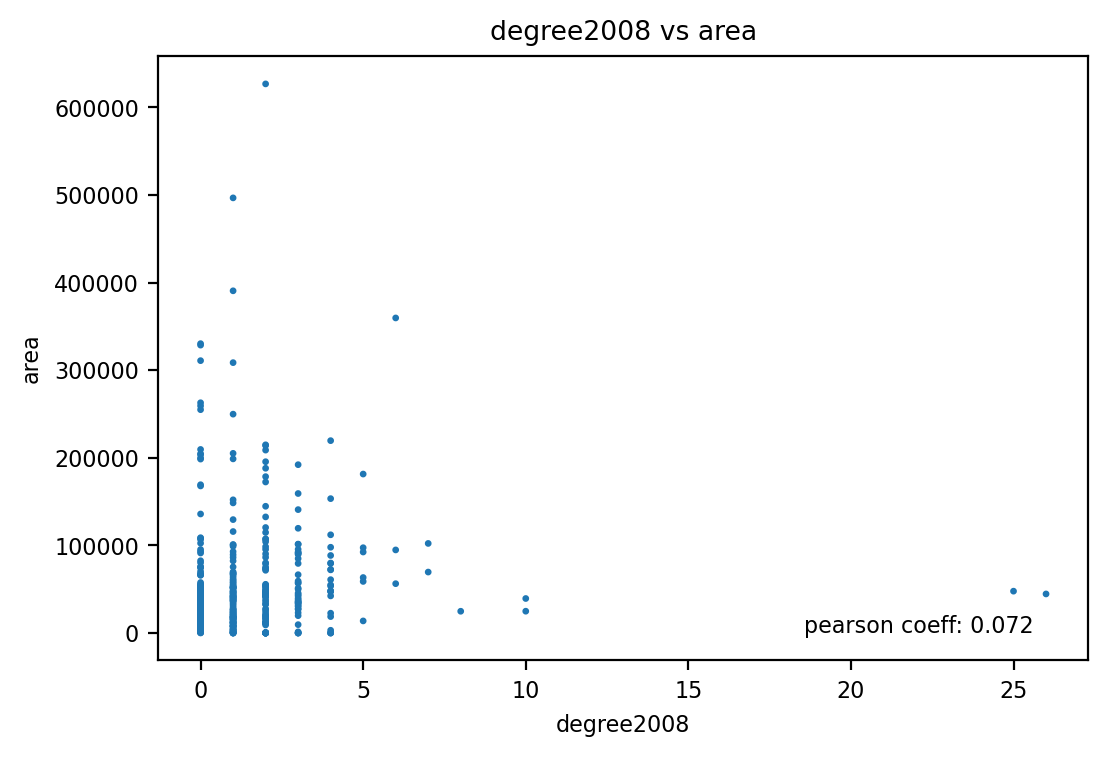

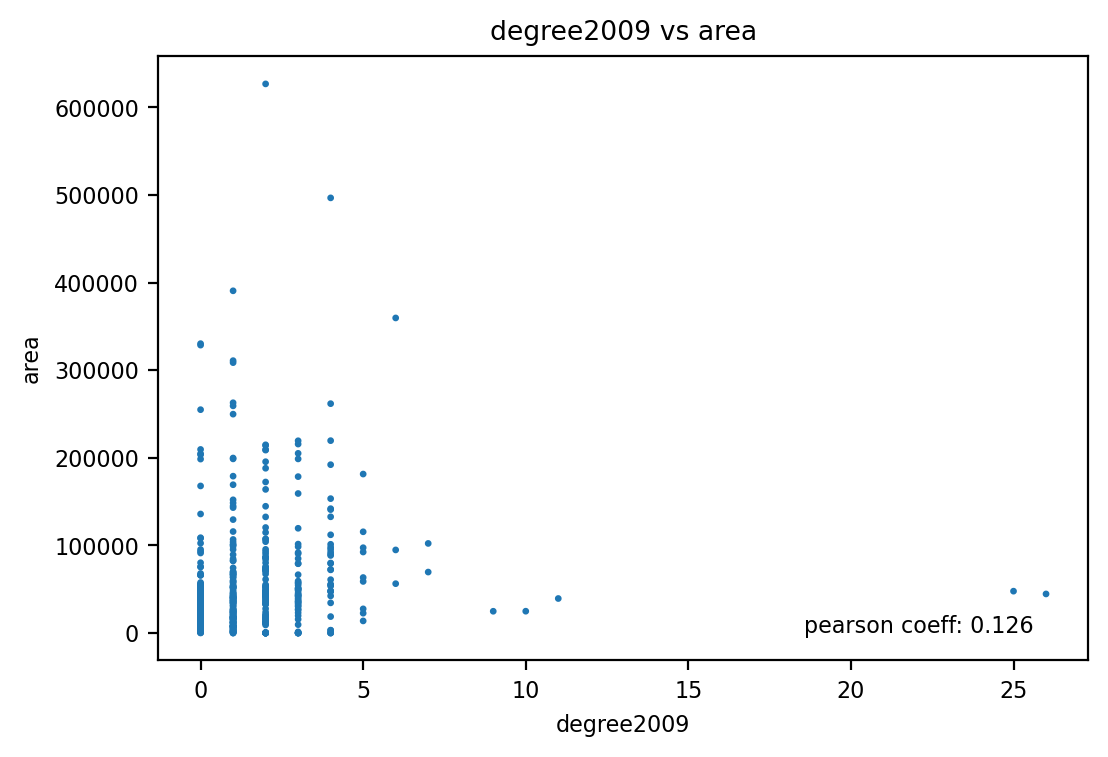

In [178]:
for i in range(2000, 2010):
    make_plot("degree"+str(i), "area", year=str(i))

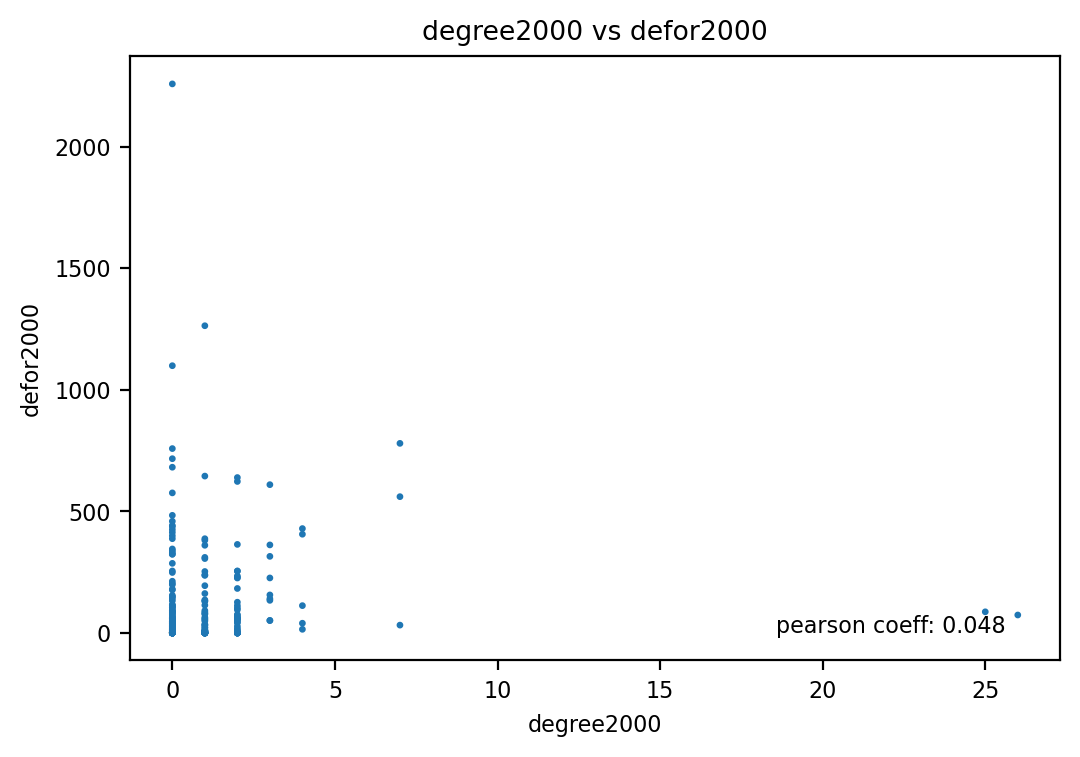

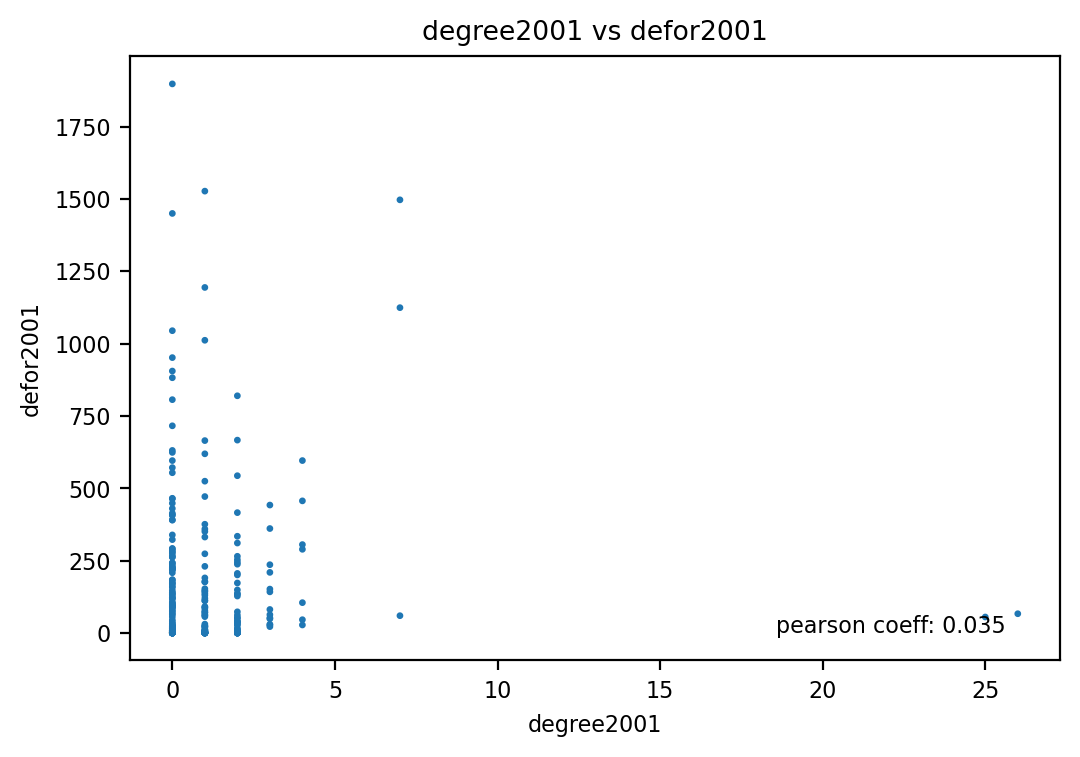

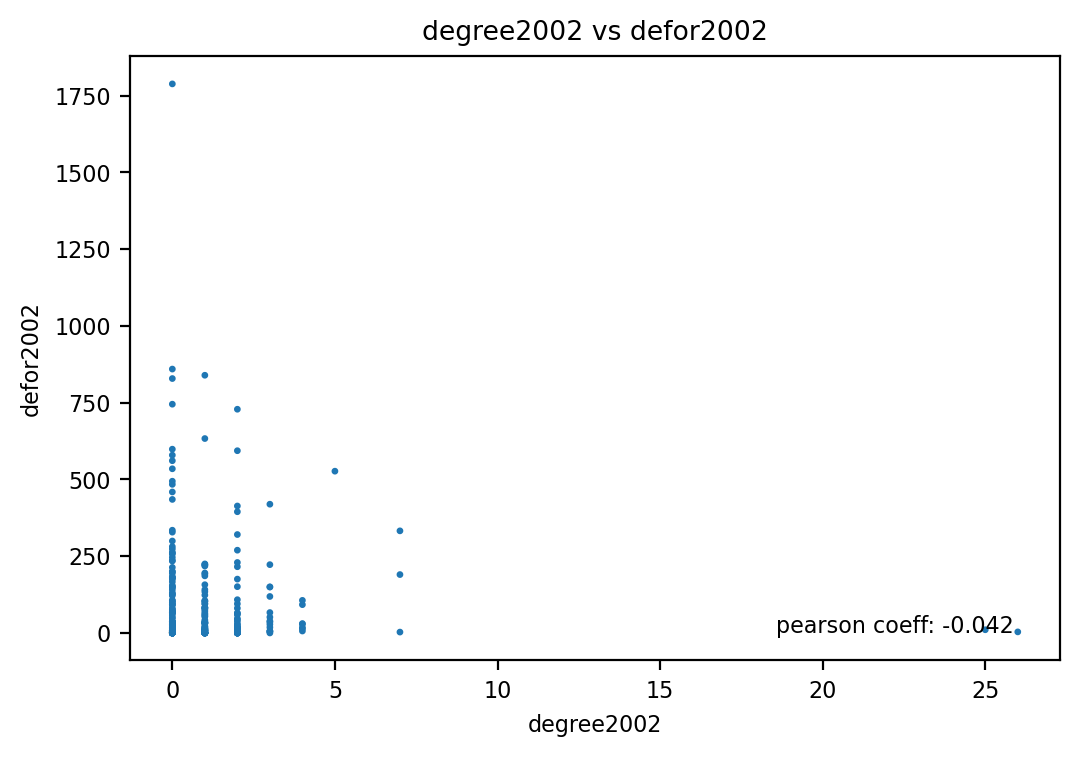

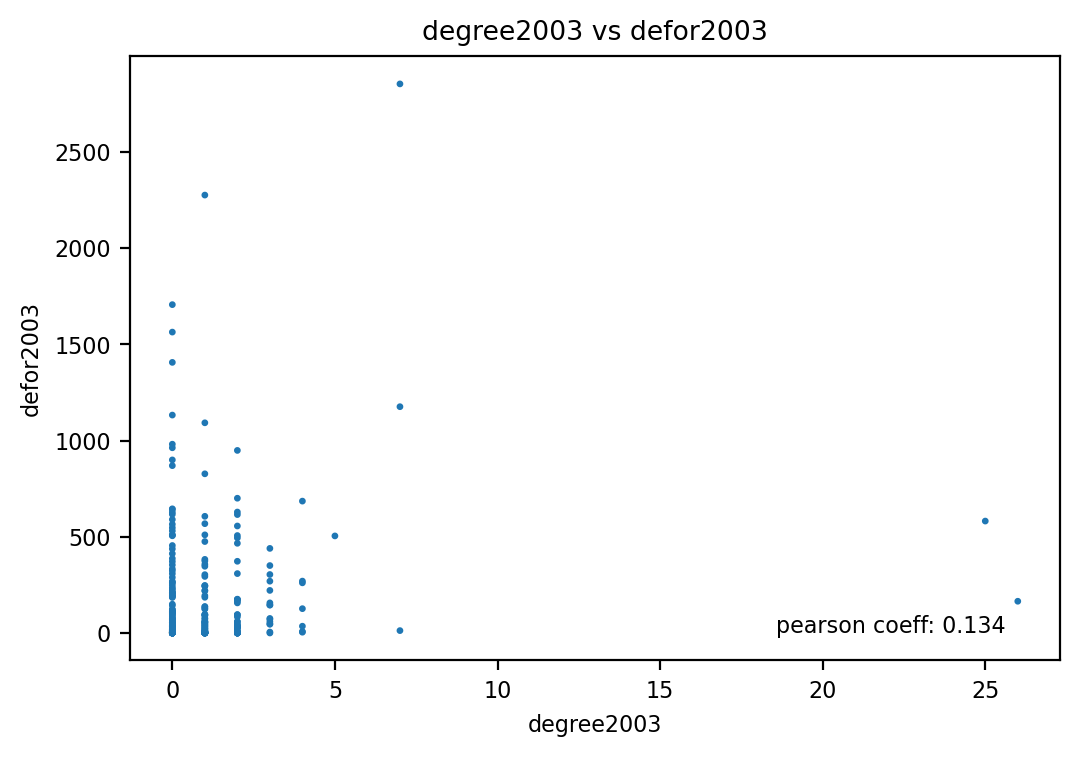

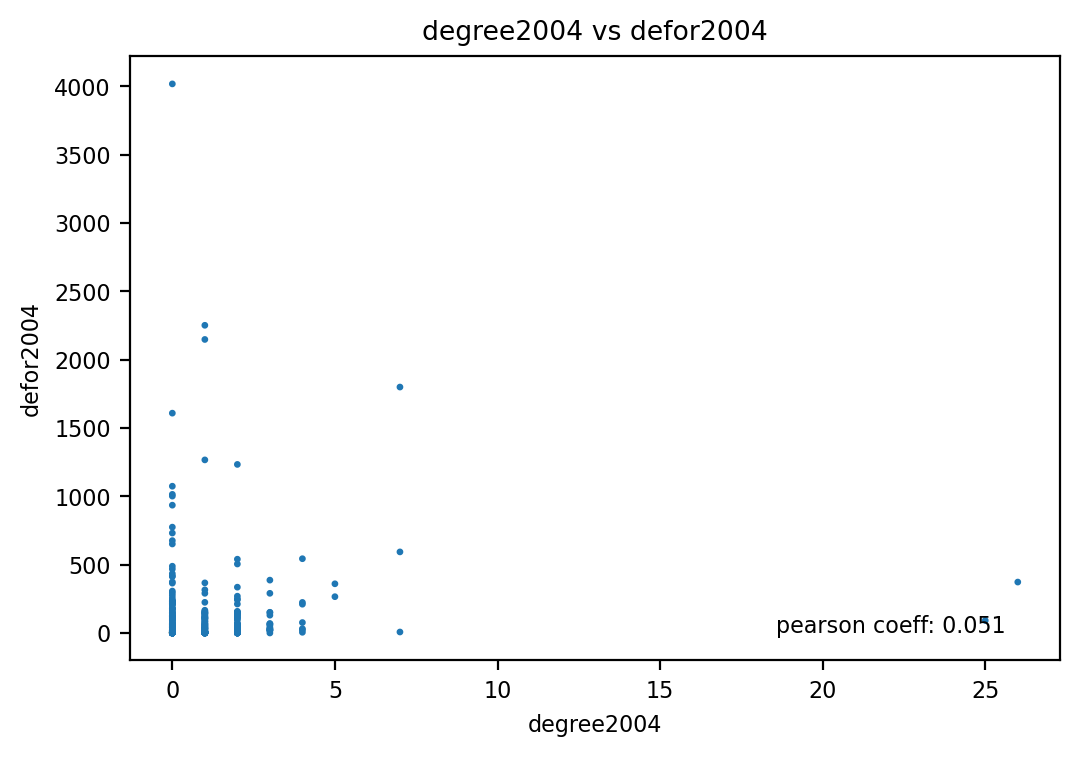

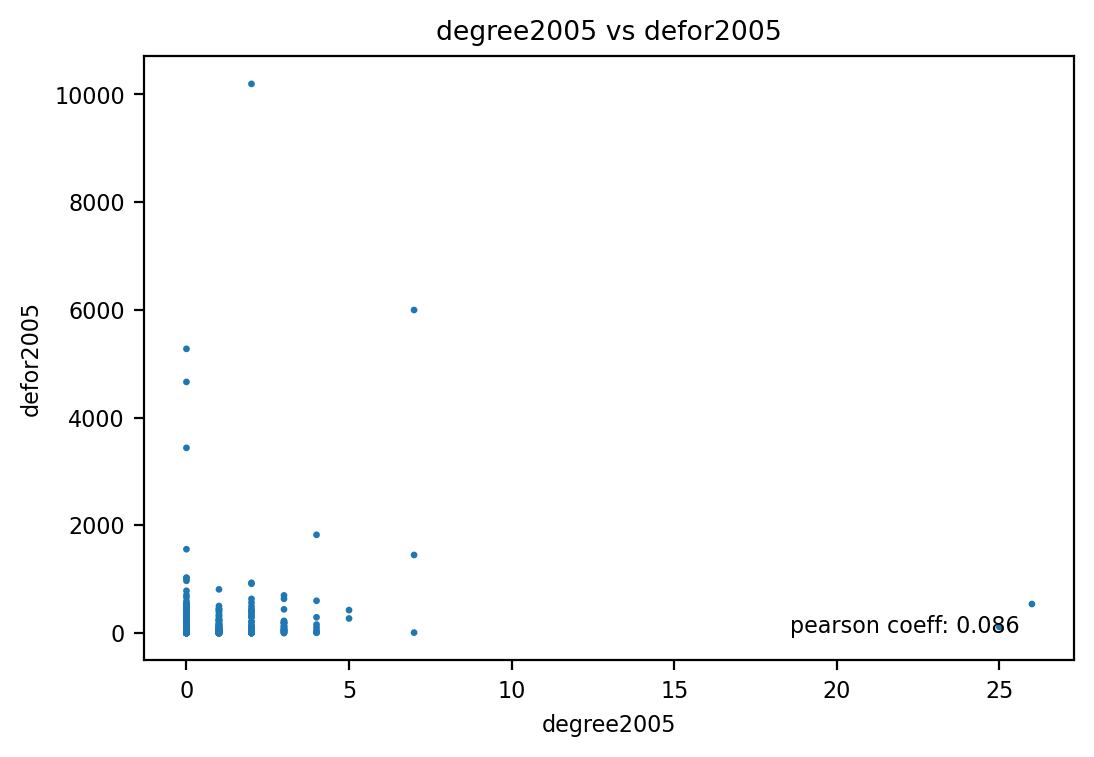

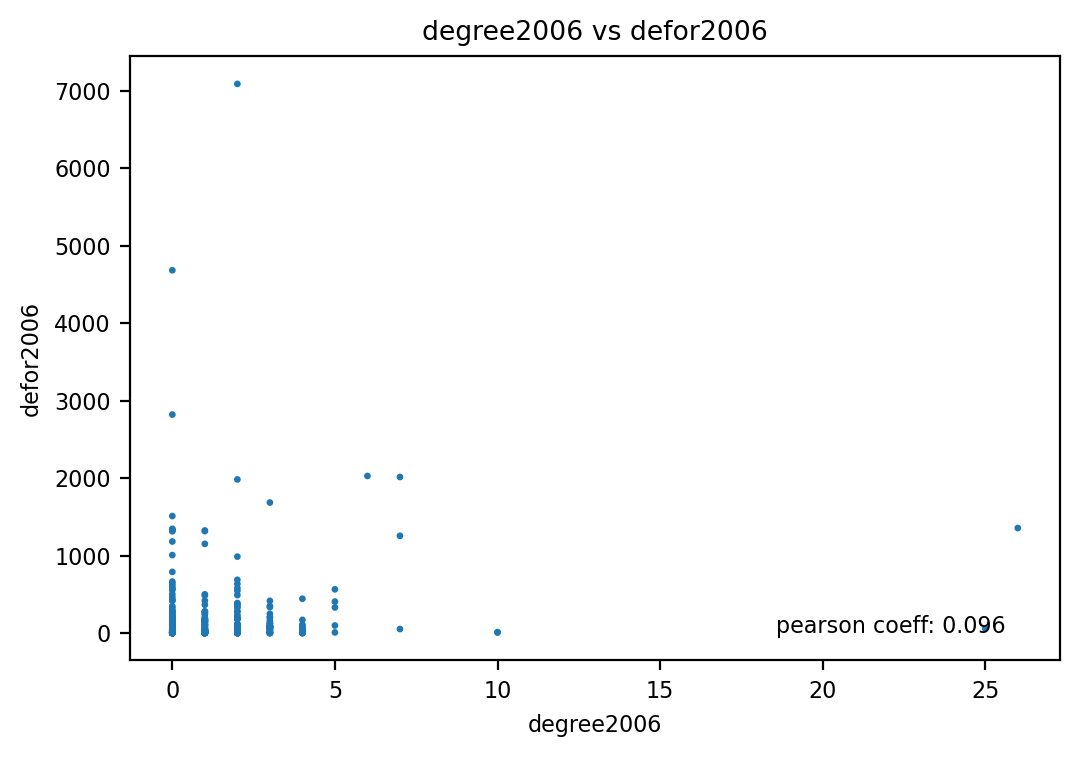

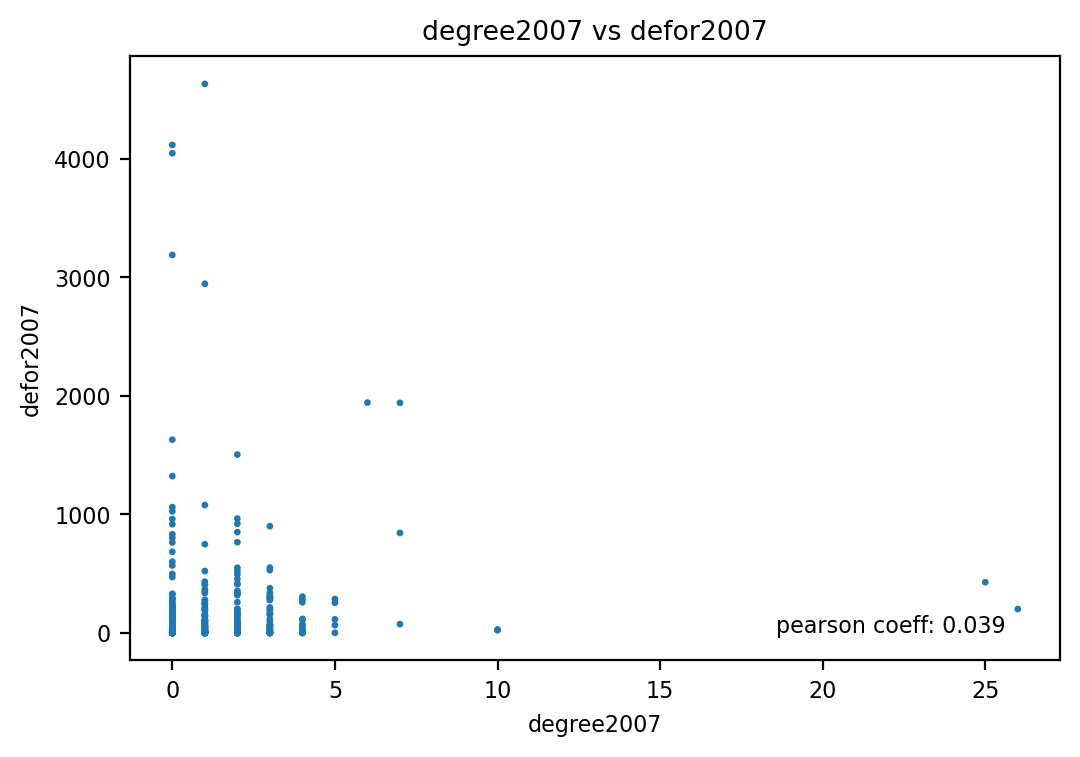

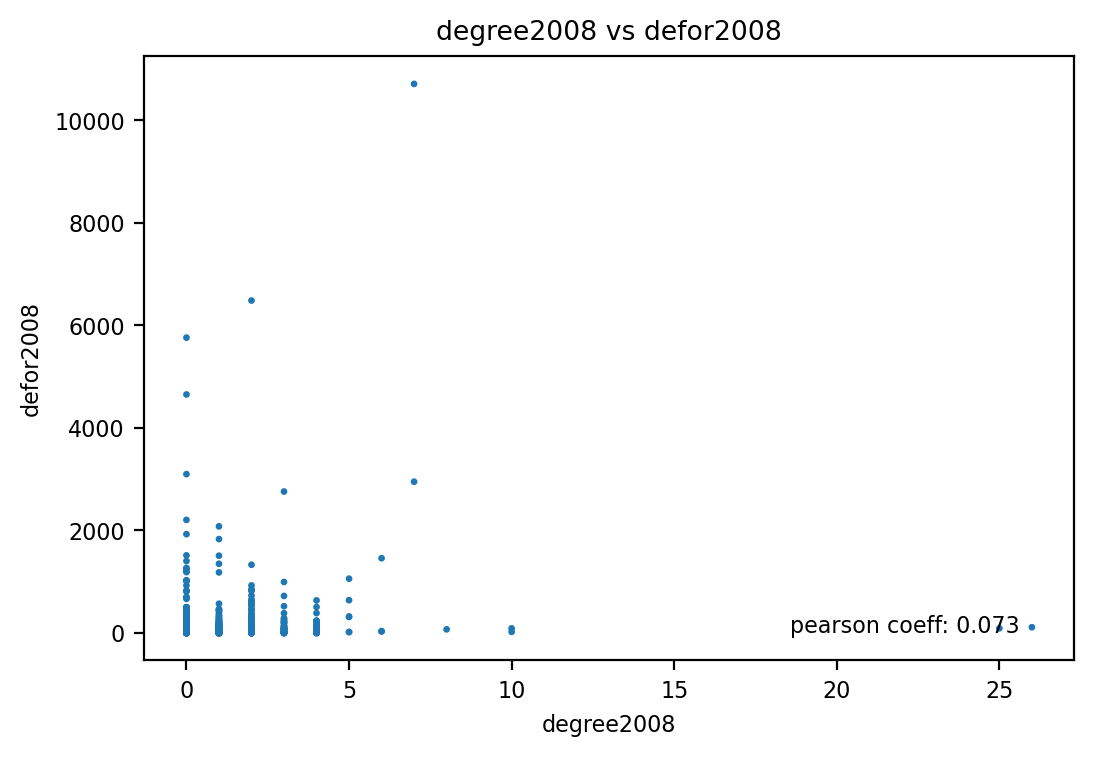

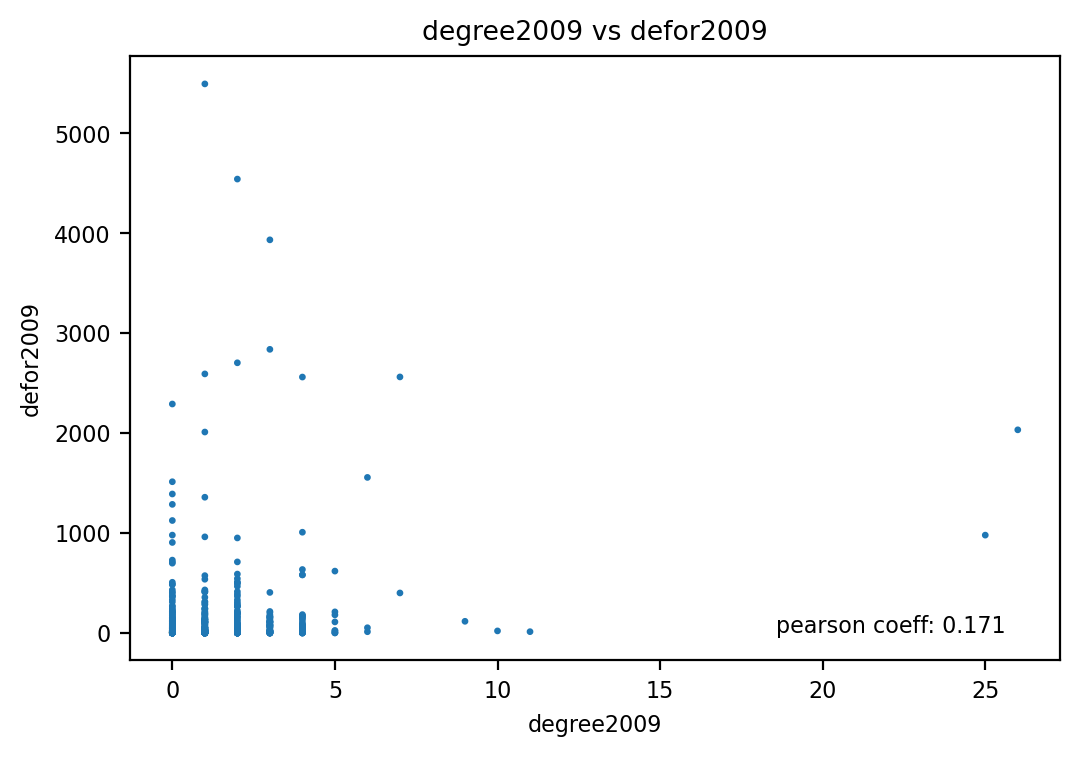

In [179]:
for i in range(2000, 2010):
    make_plot("degree"+str(i), "defor"+str(i), year=str(i))

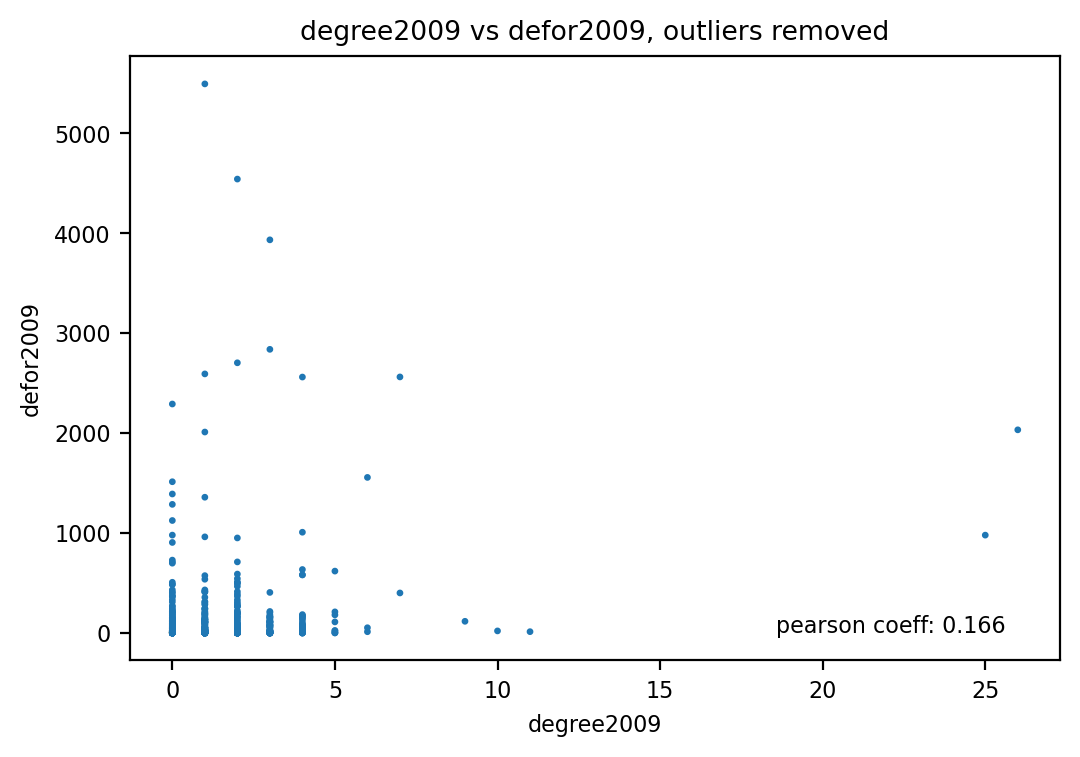

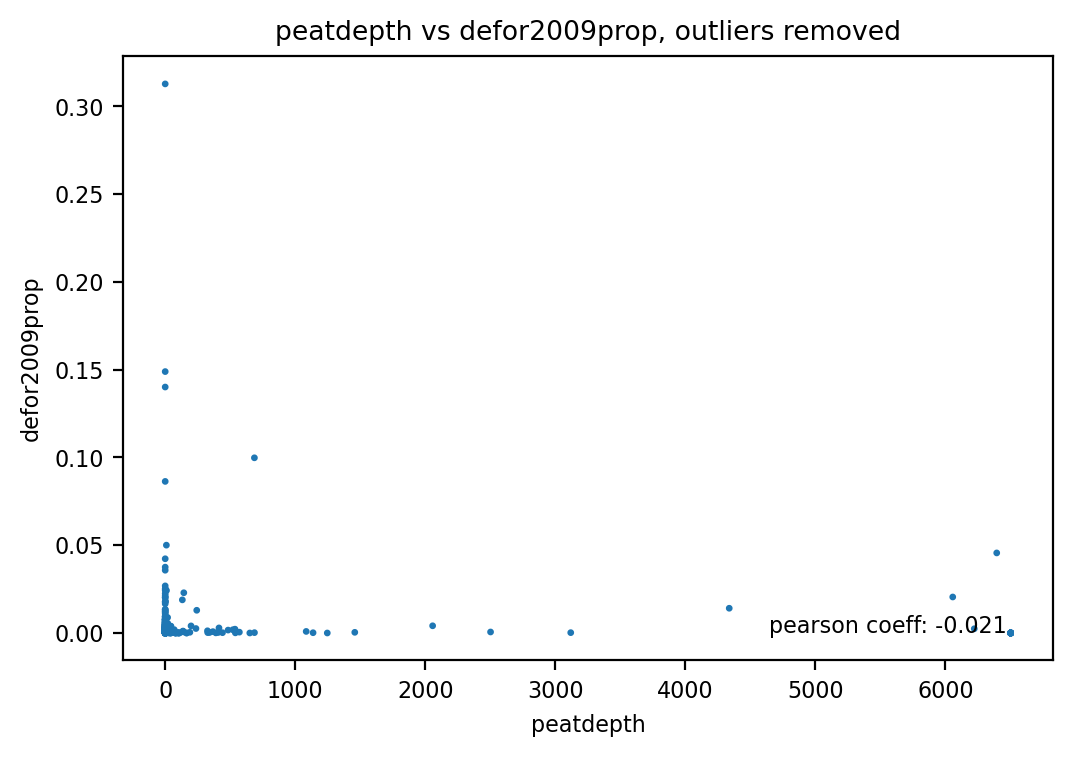

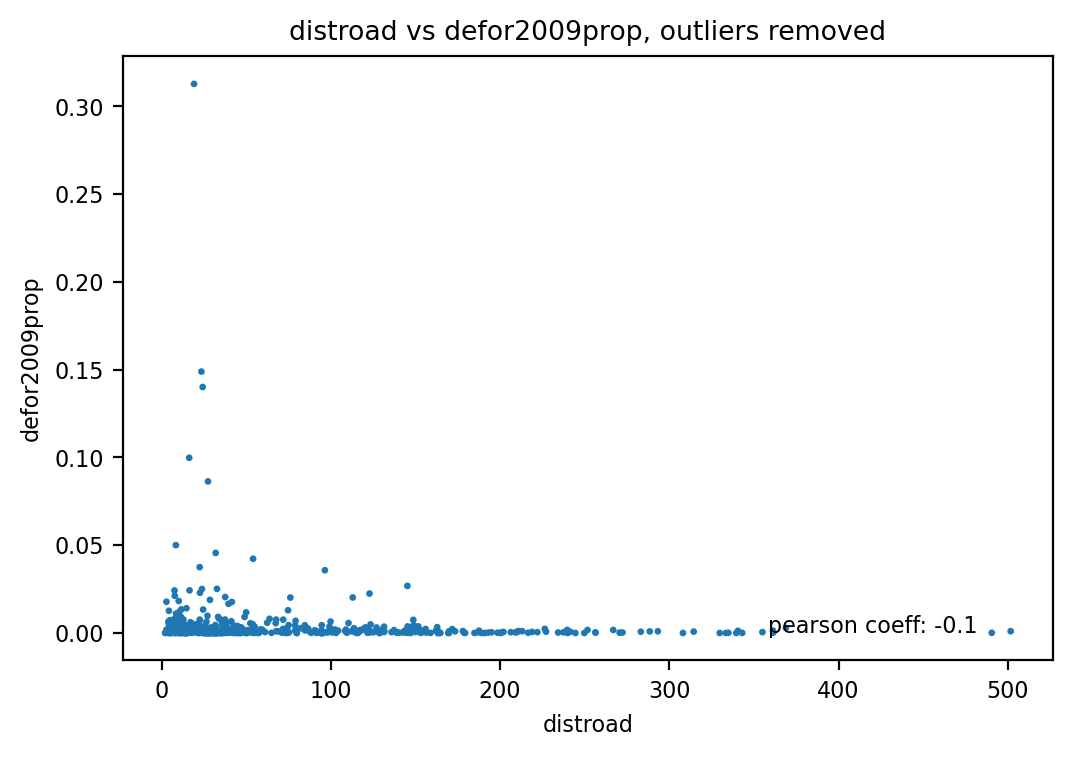

In [108]:
make_plot("degree2009", "defor2009")
make_plot("peatdepth", "defor2009prop")
make_plot("distroad", "defor2009prop")


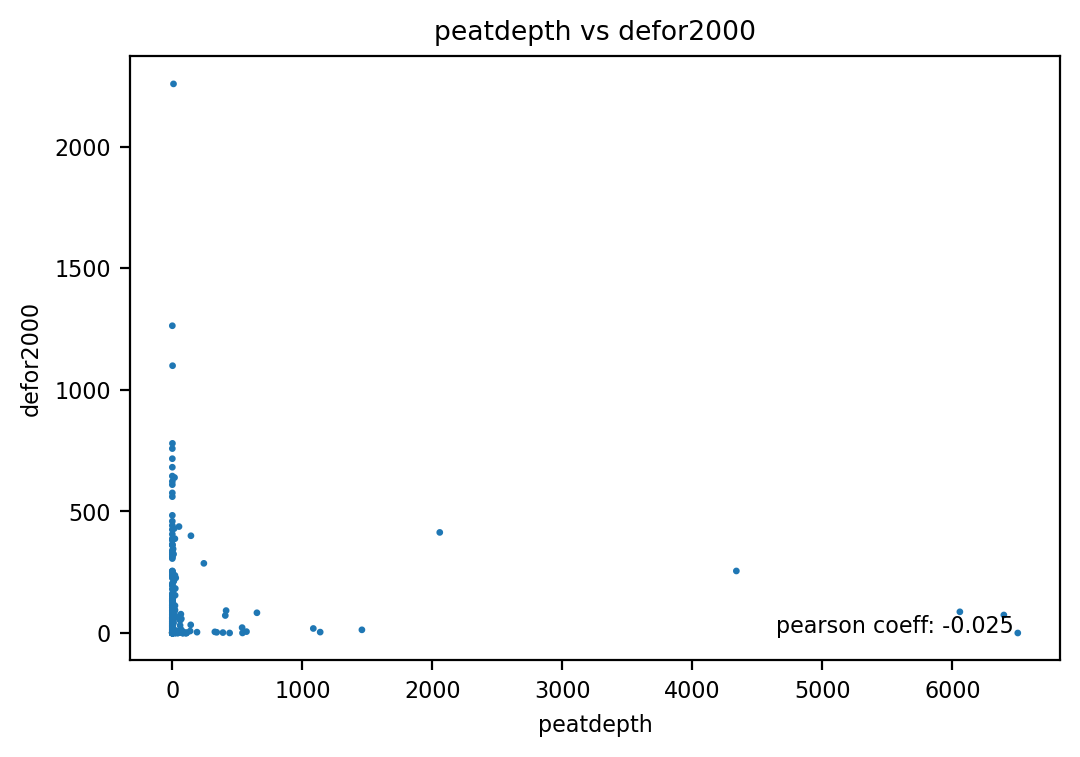

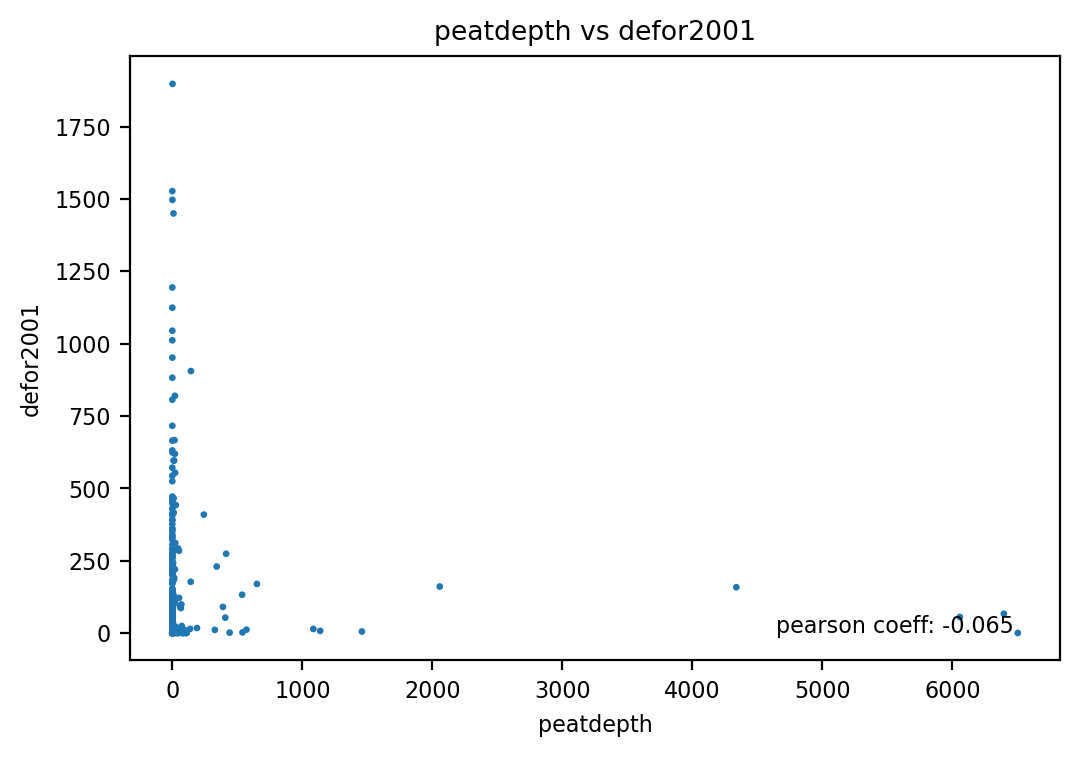

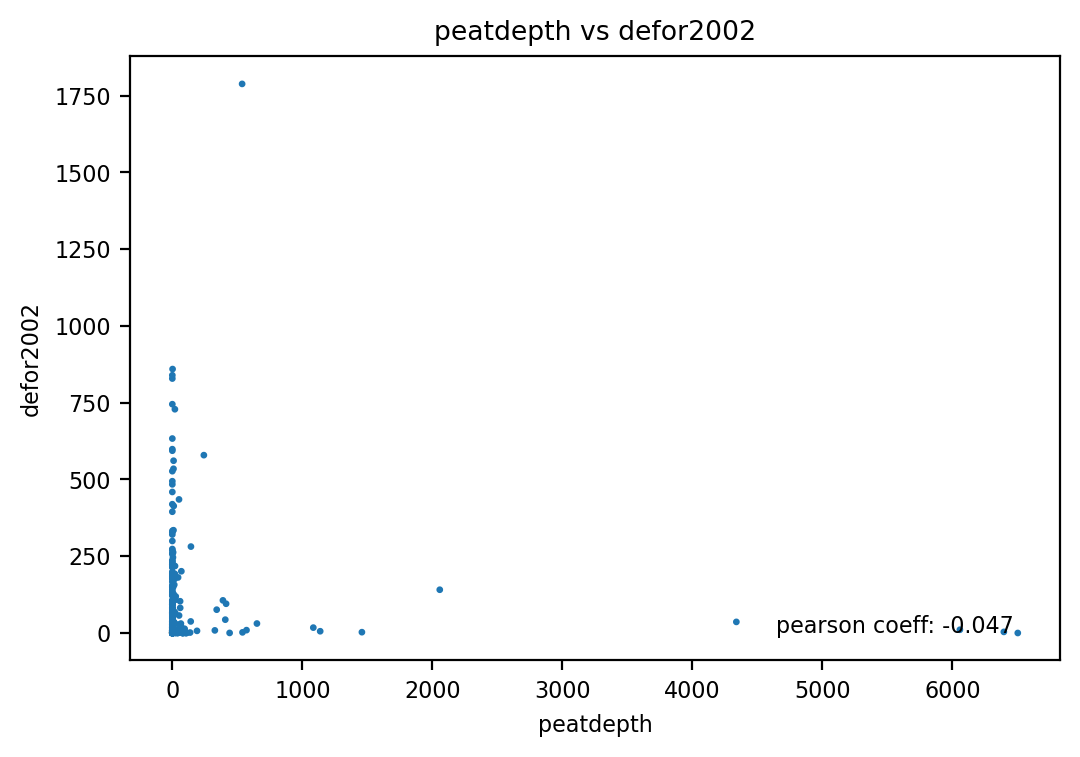

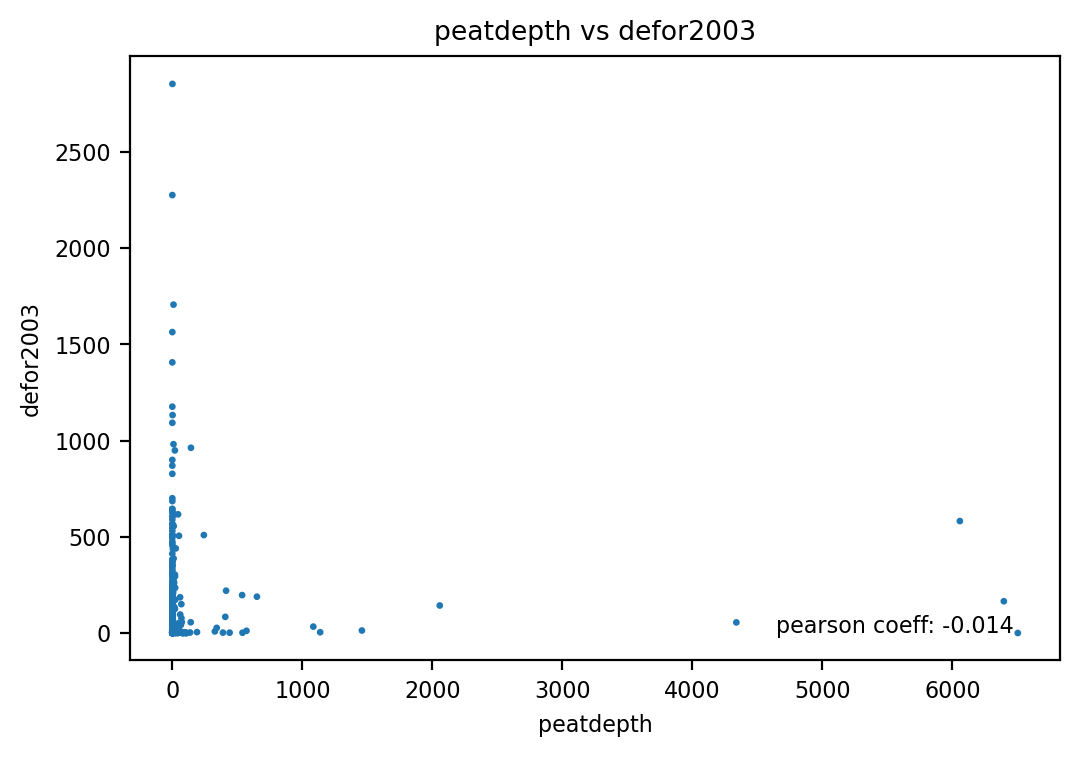

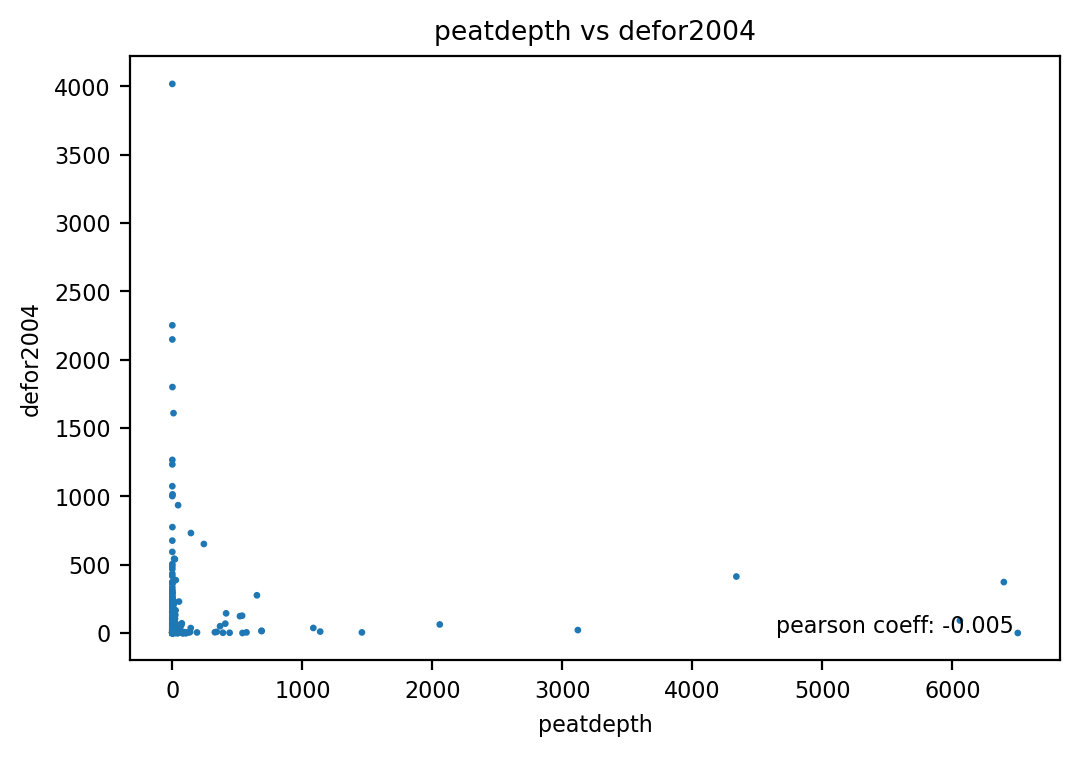

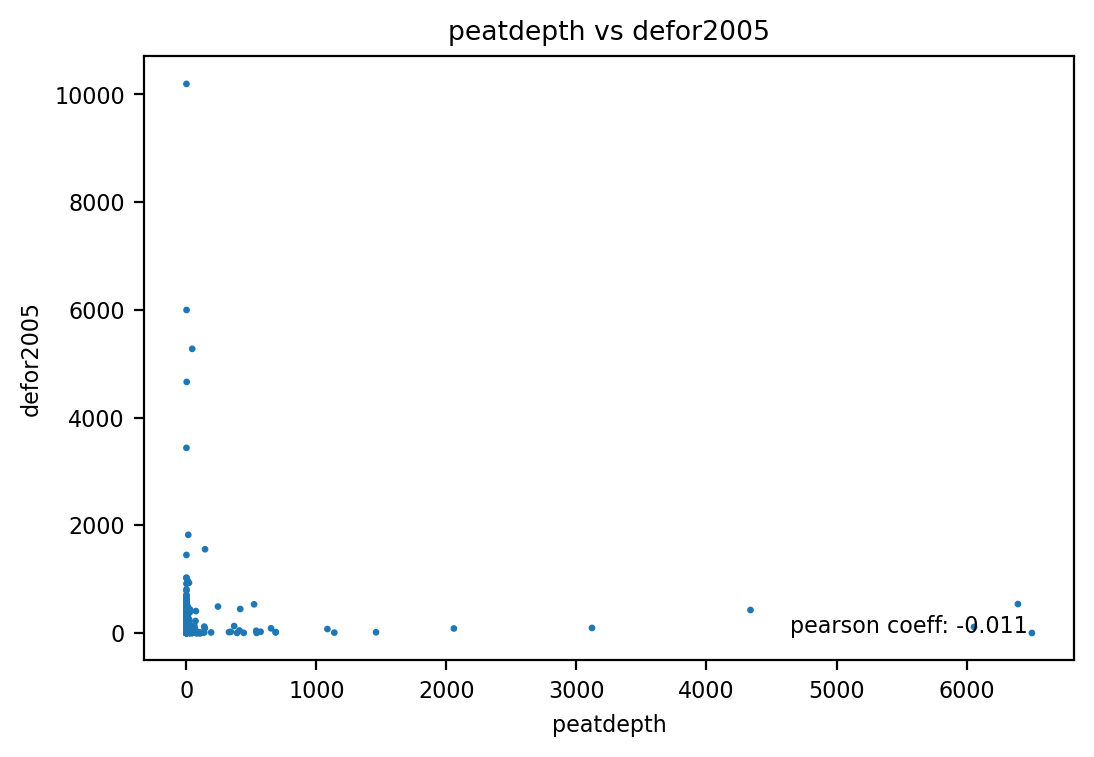

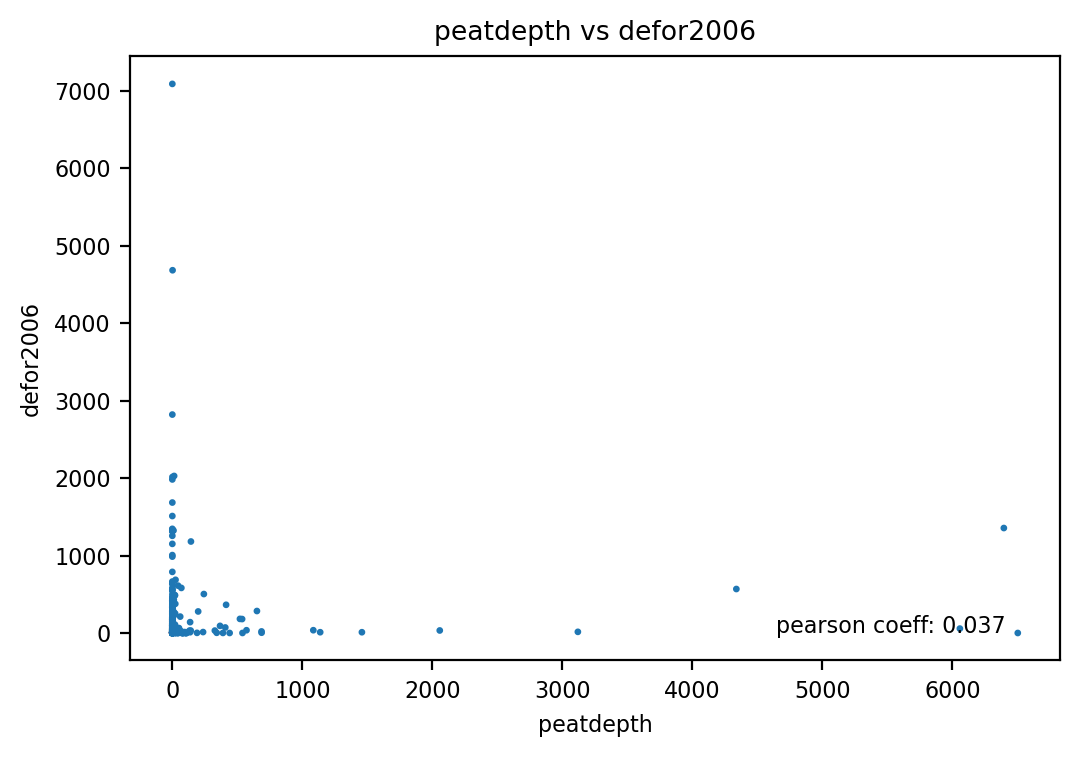

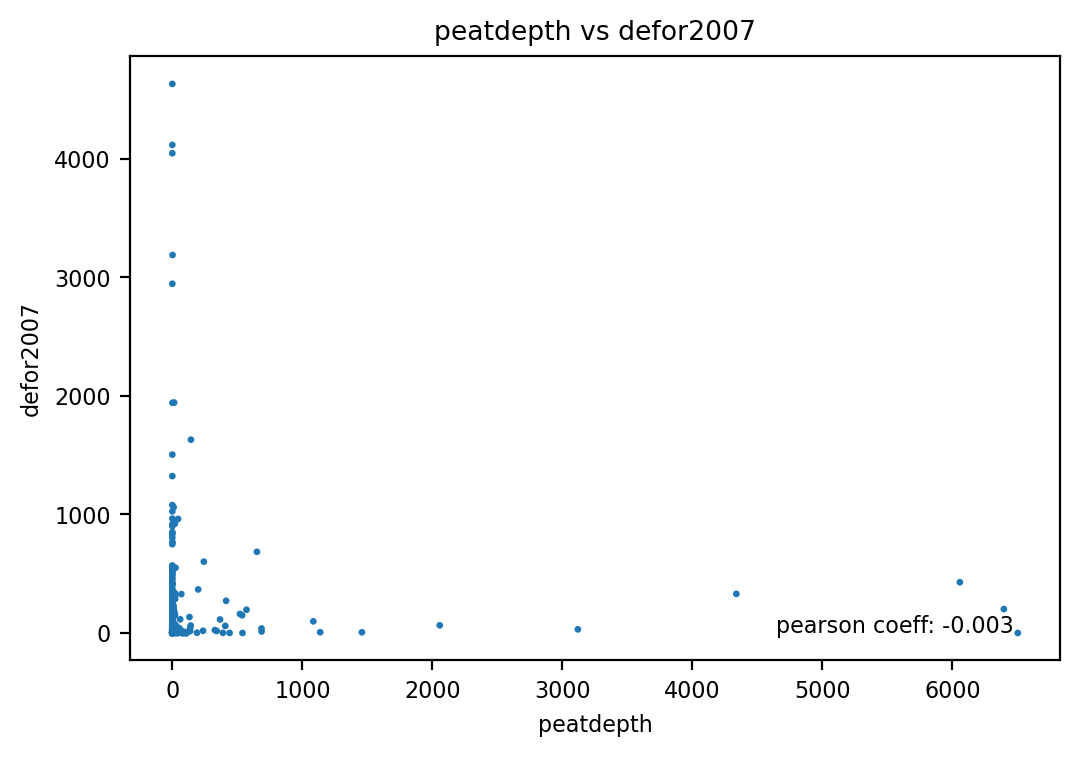

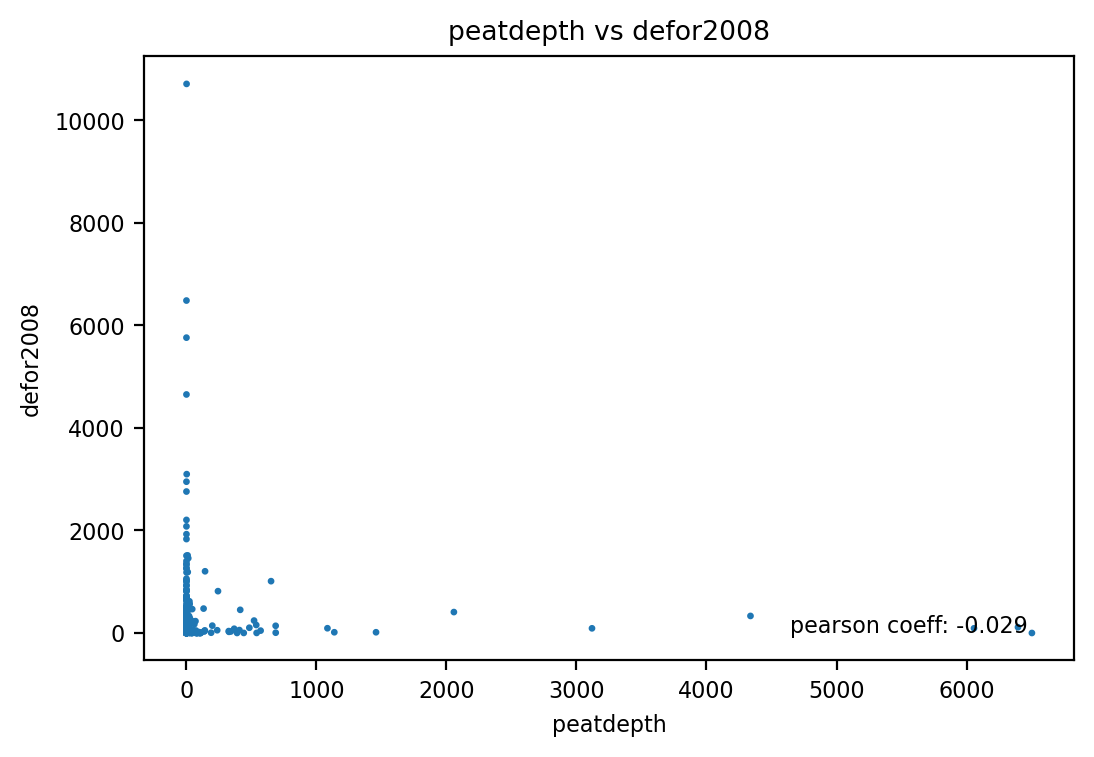

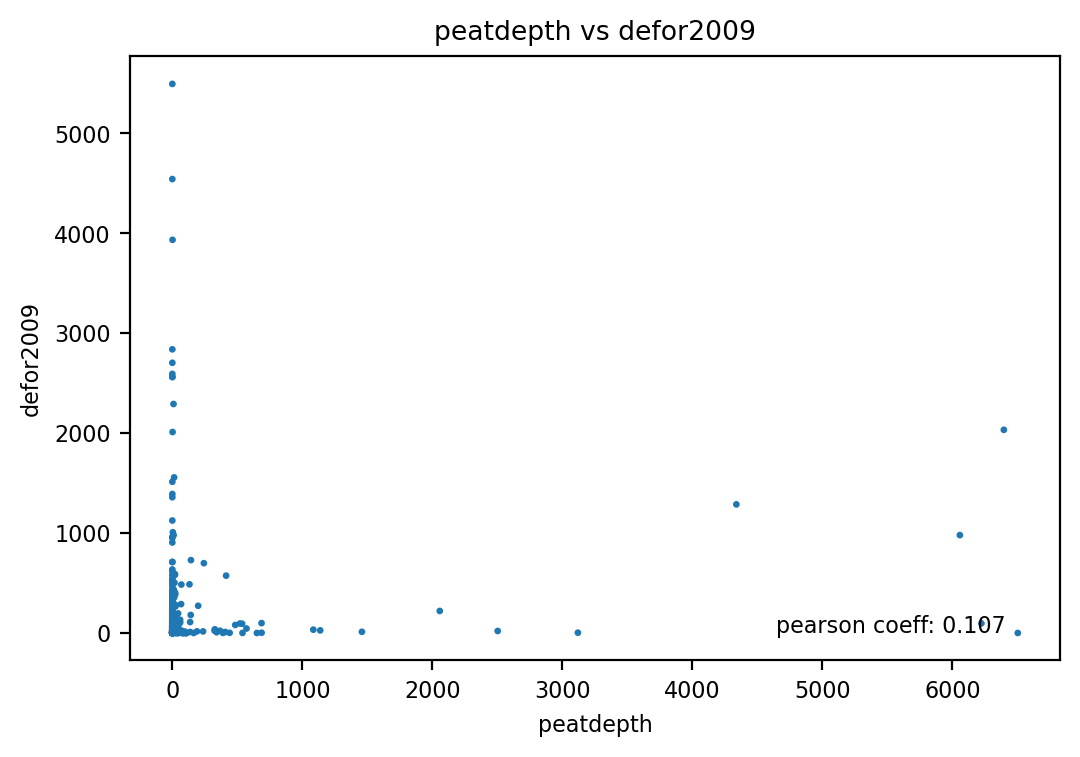

In [174]:
for i in range(2000, 2010):
    make_plot("peatdepth", "defor"+str(i), year=str(i))
# plt.scatter(features_by_lc_dropped["degree"][~mask], features_by_lc_dropped["defor2000"][~mask] )

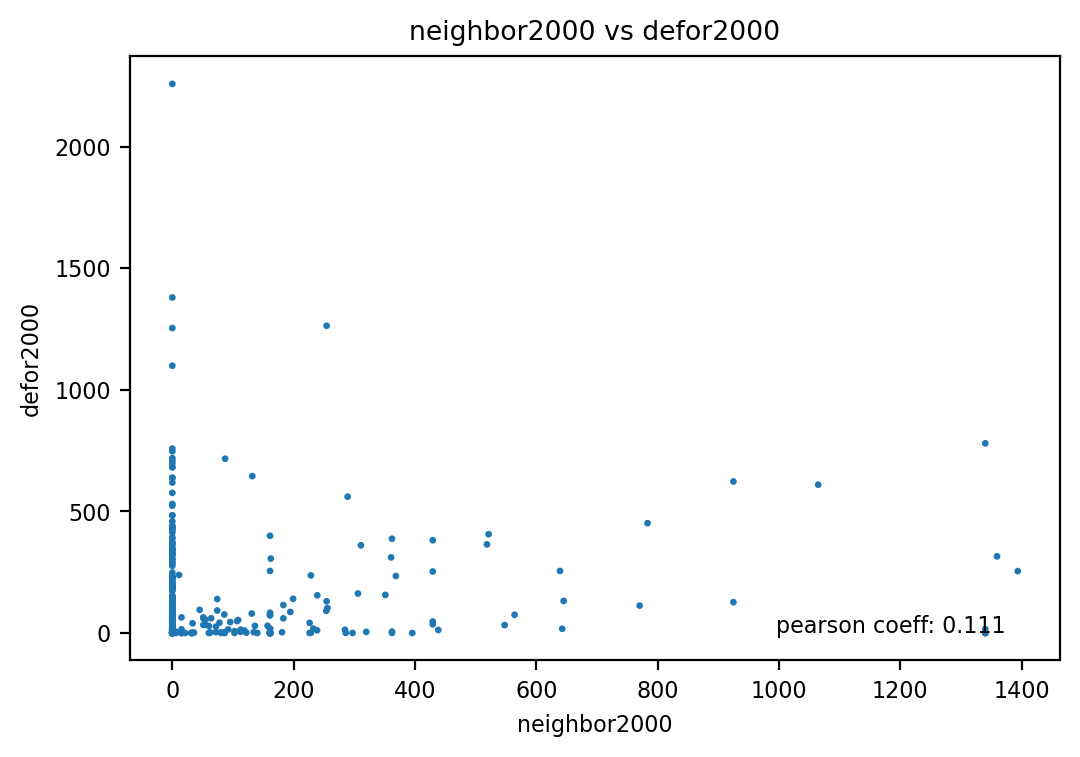

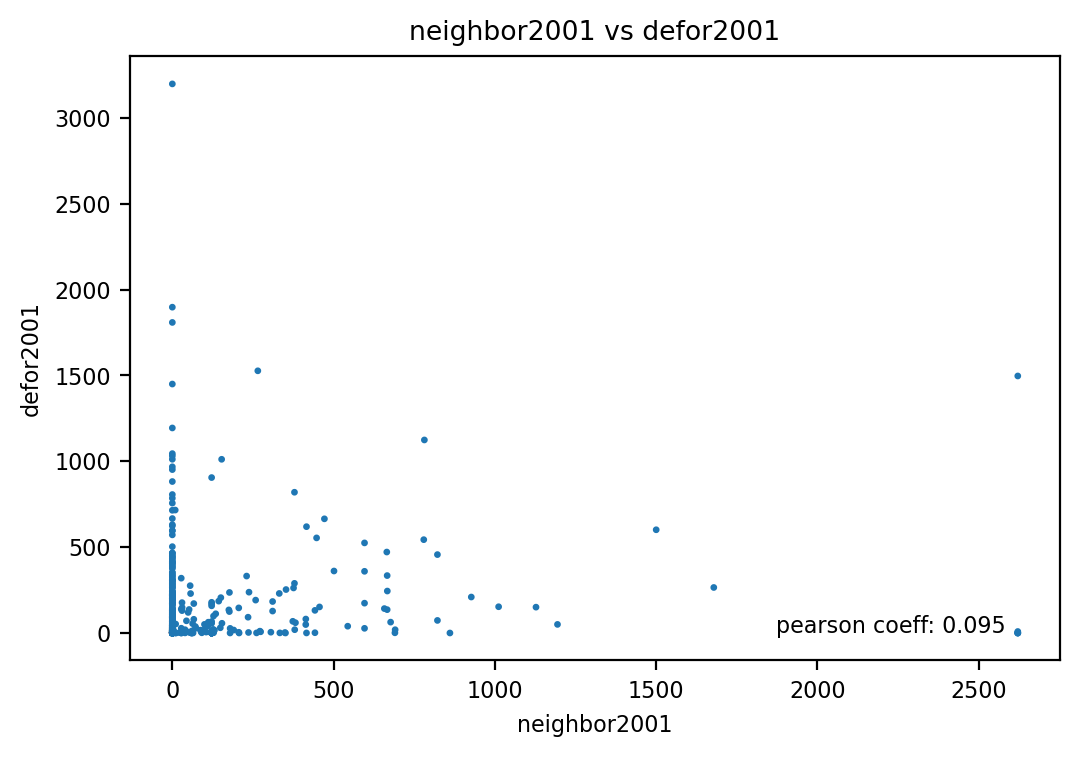

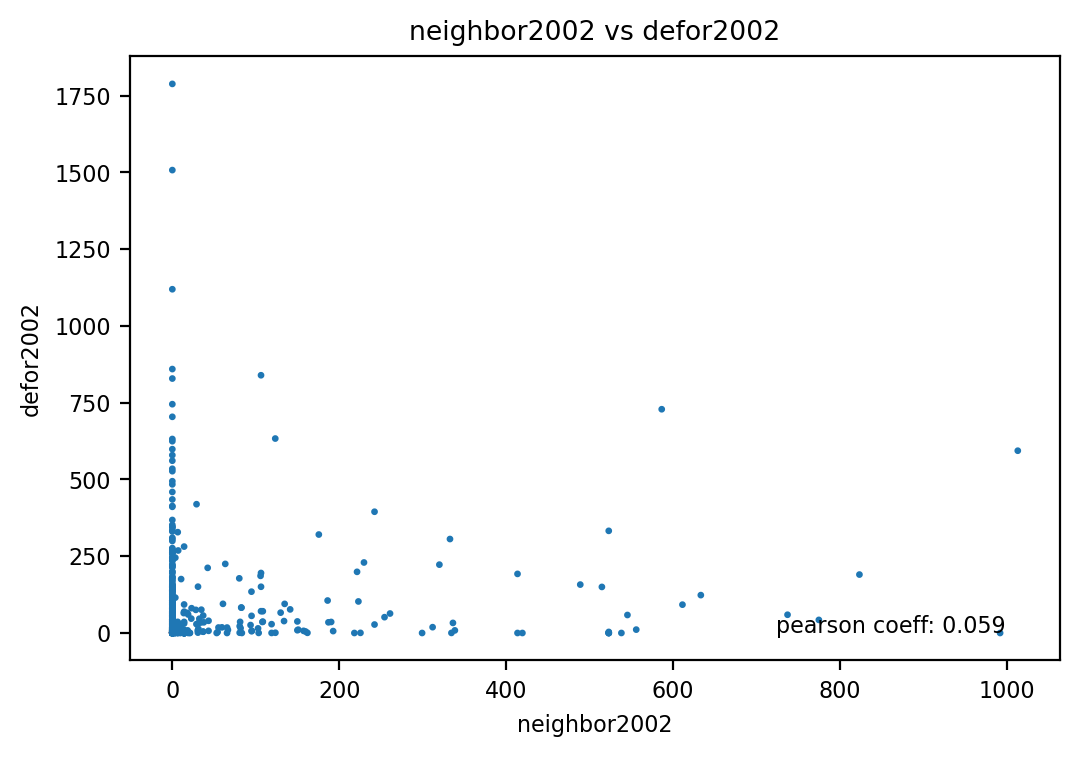

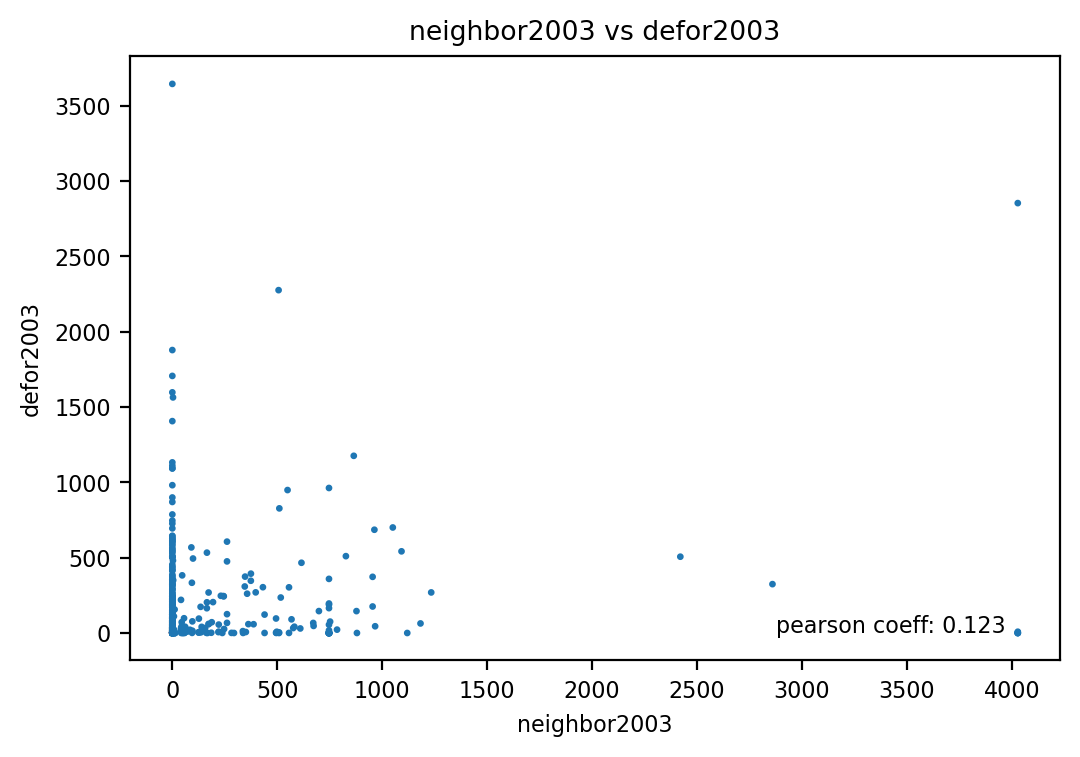

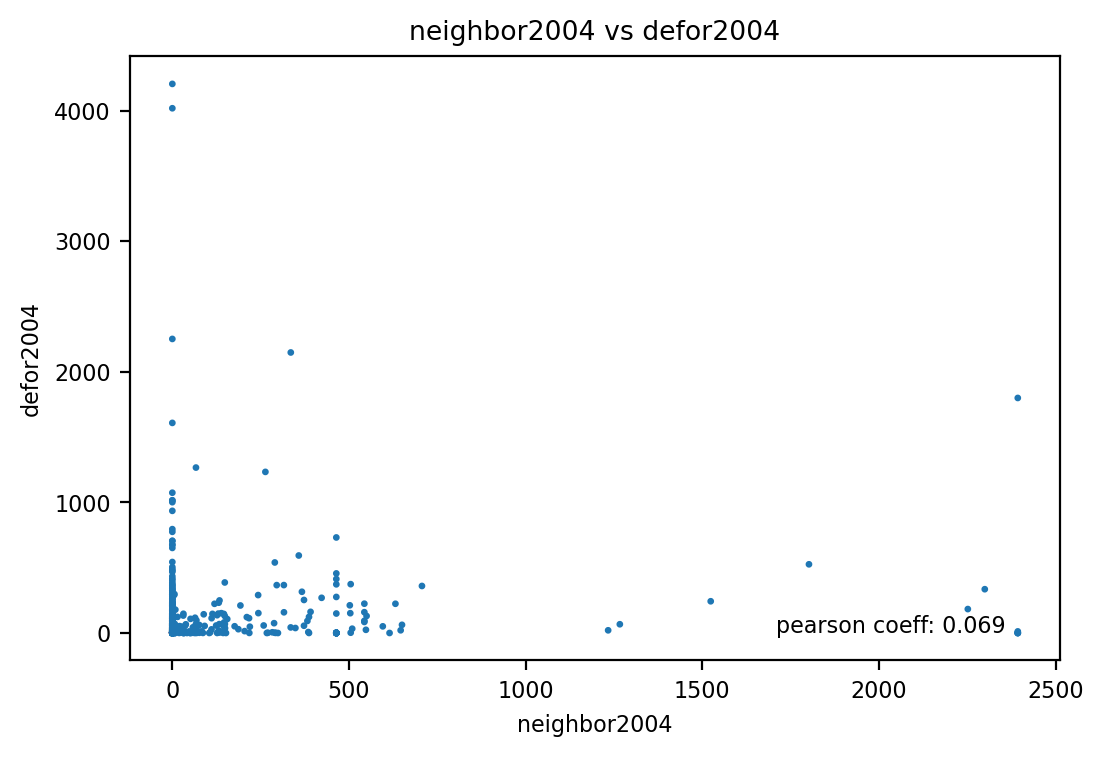

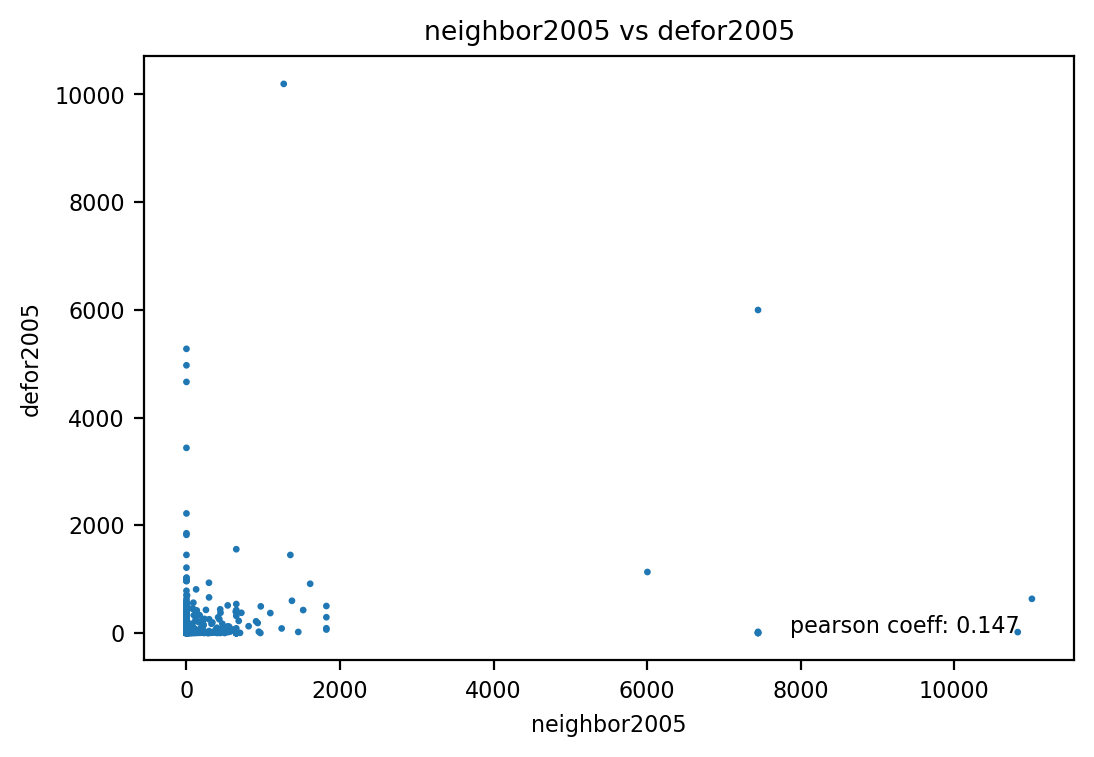

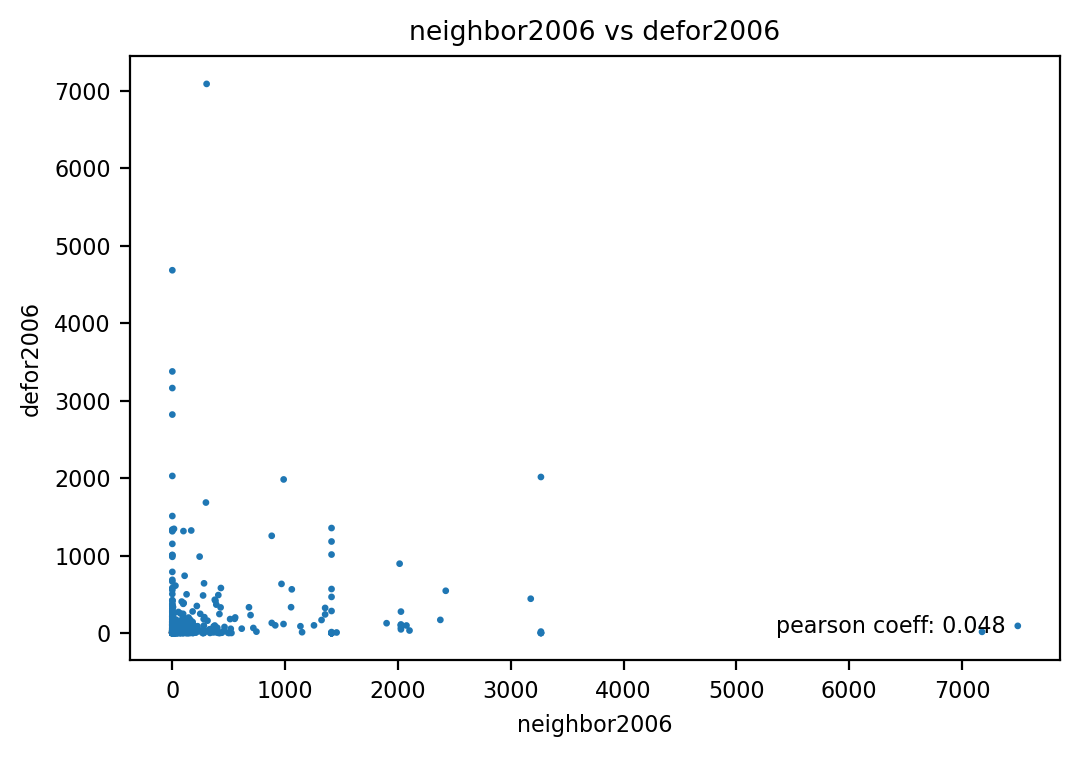

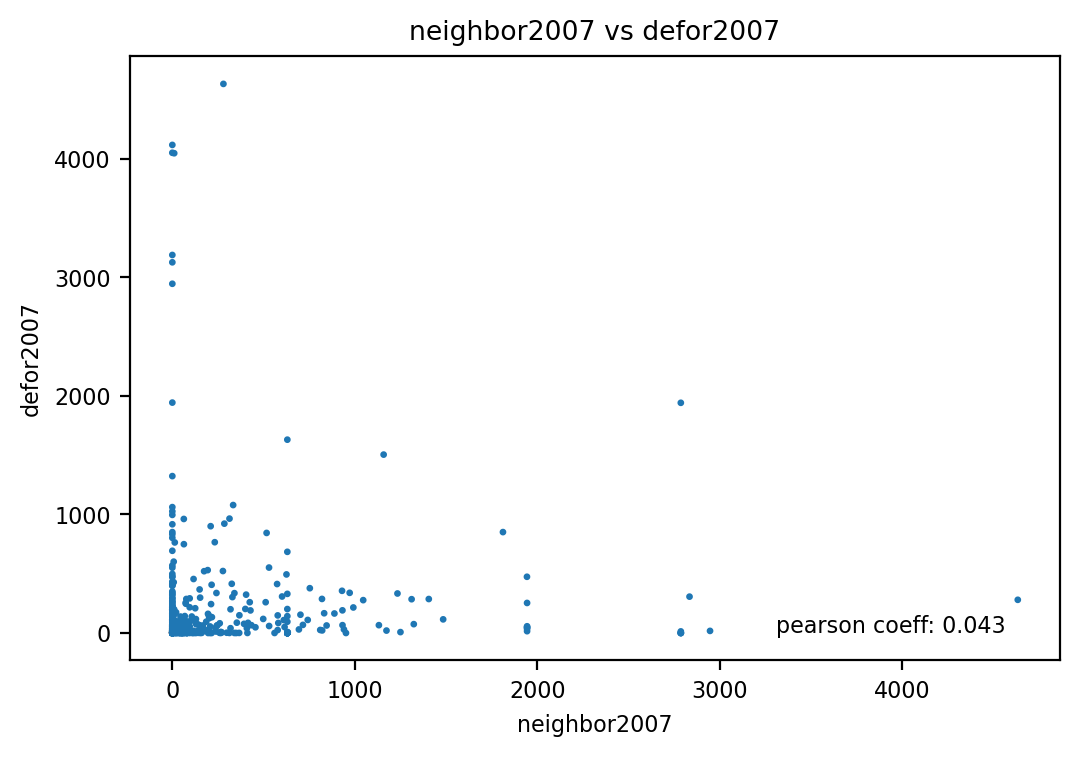

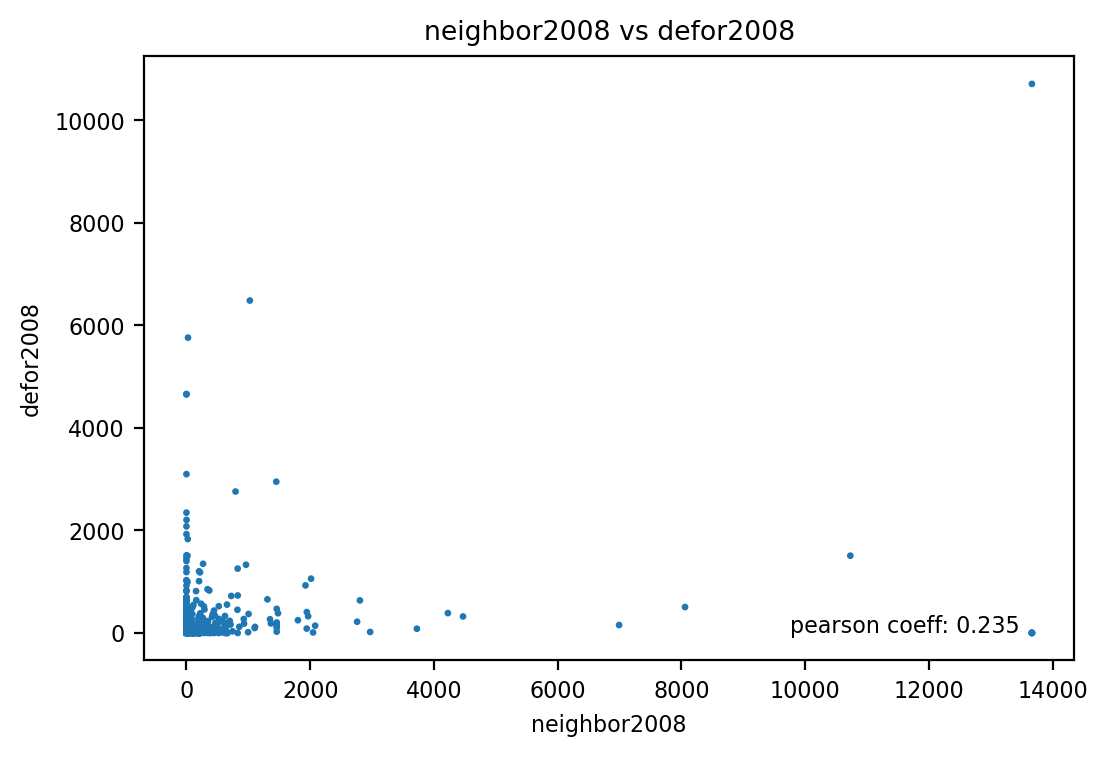

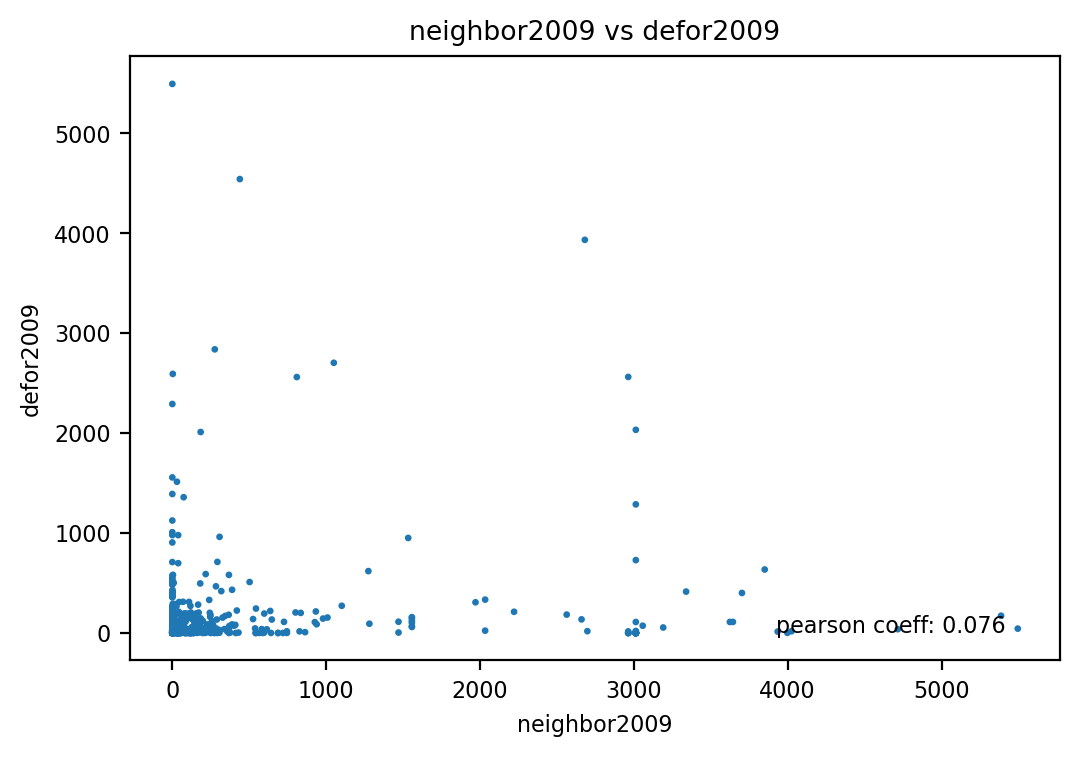

In [115]:
for i in range(2000, 2010):
    make_plot("neighbor"+str(i), "defor"+str(i))
# plt.scatter(features_by_lc_dropped["degree"][~mask], features_by_lc_dropped["defor2000"][~mask] )

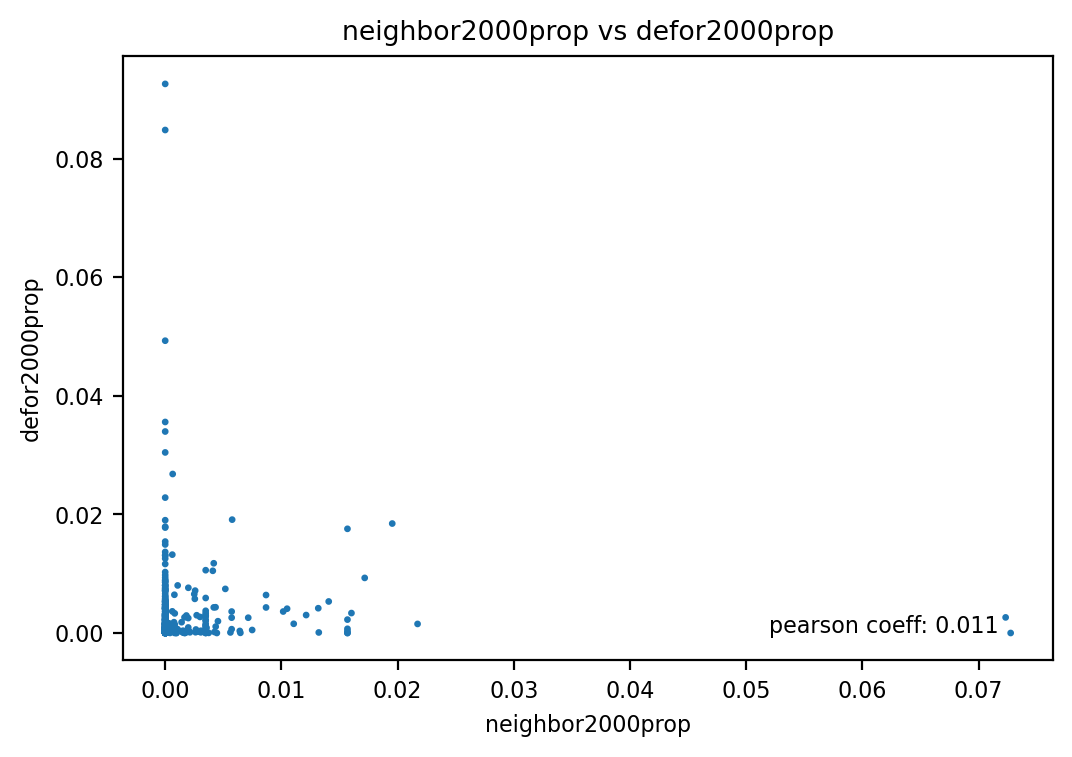

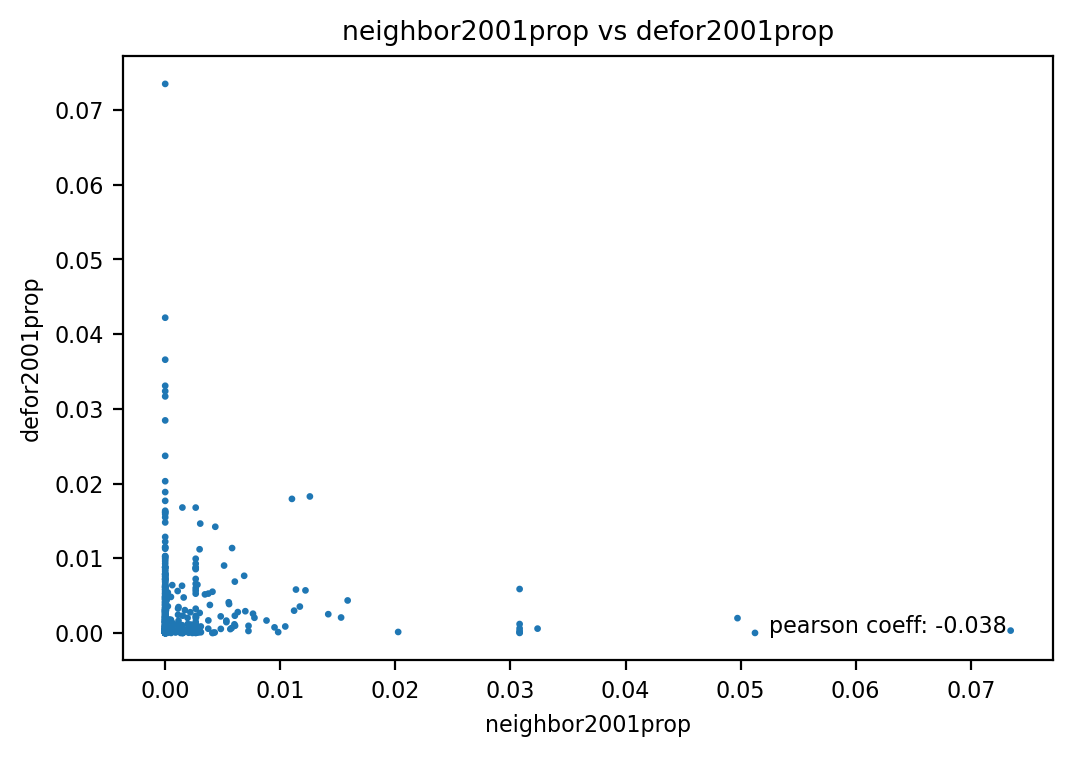

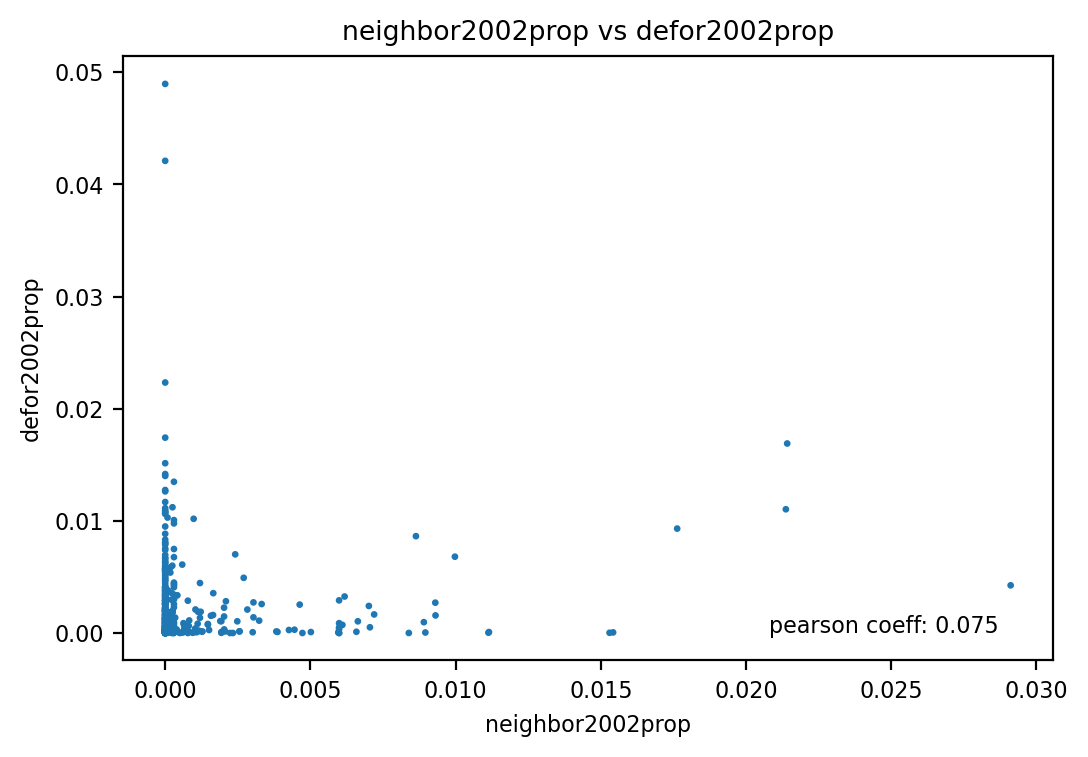

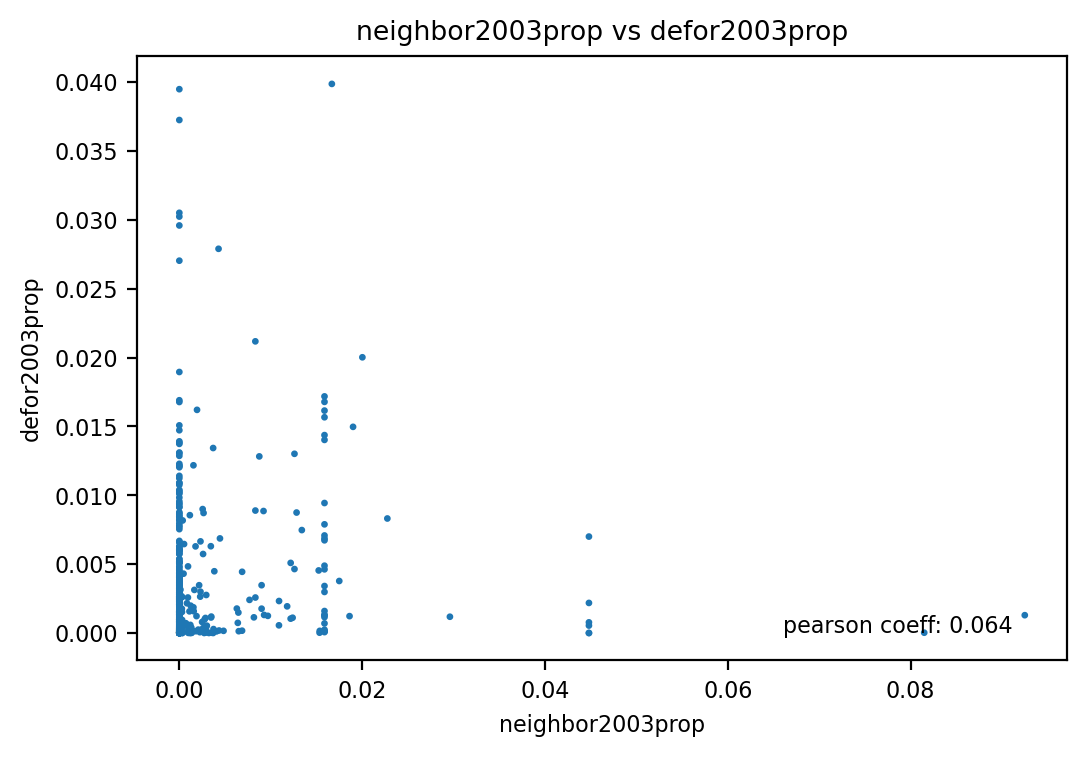

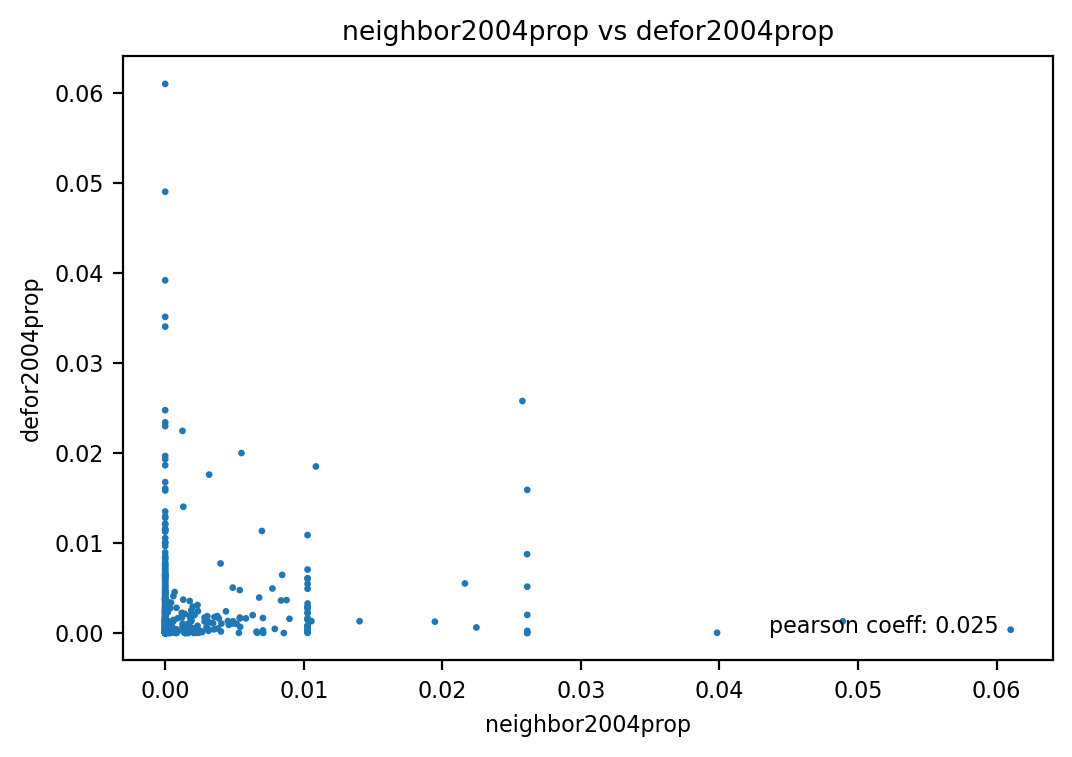

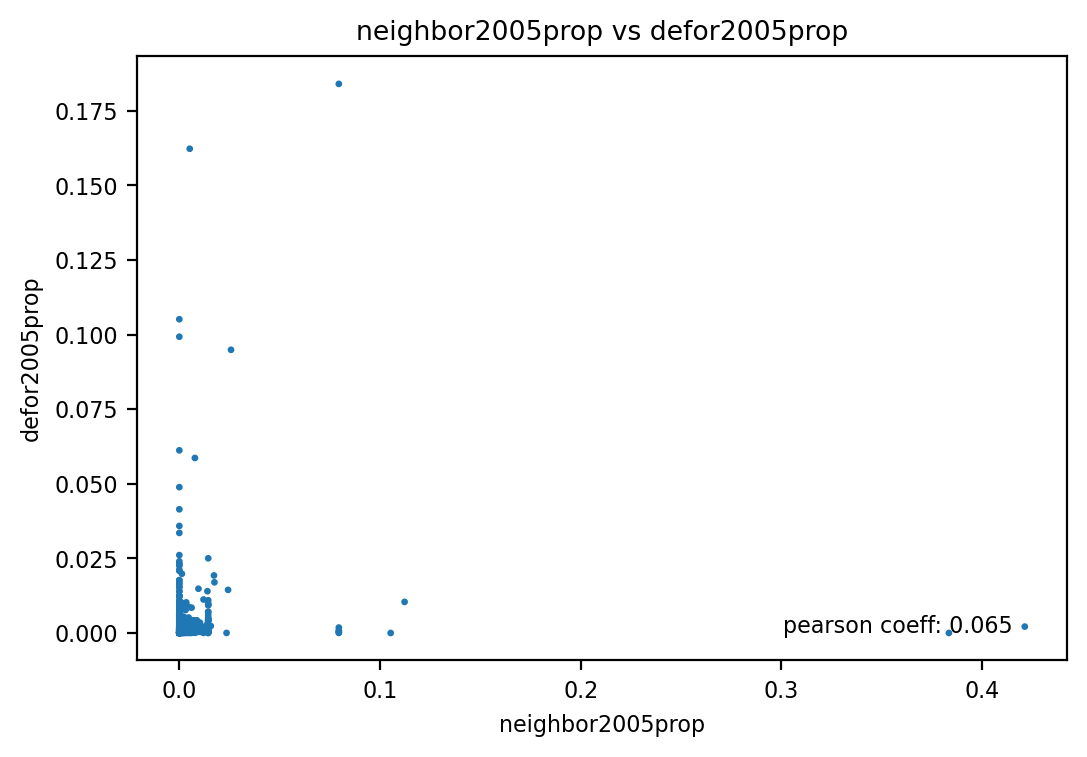

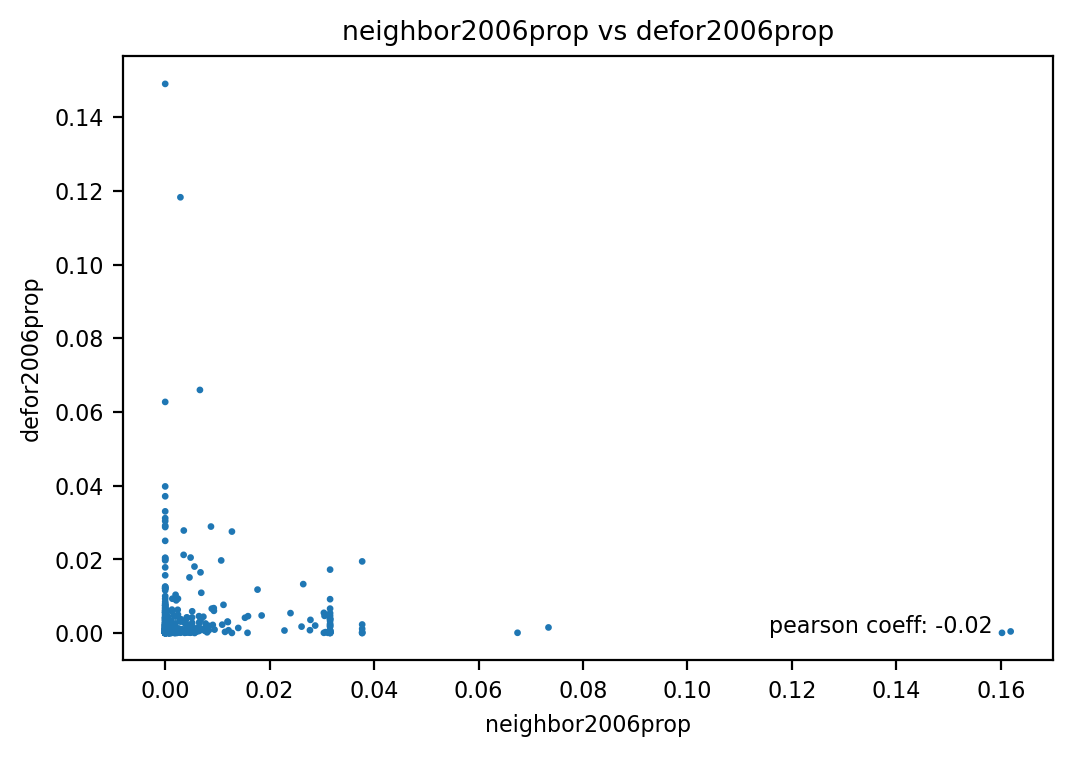

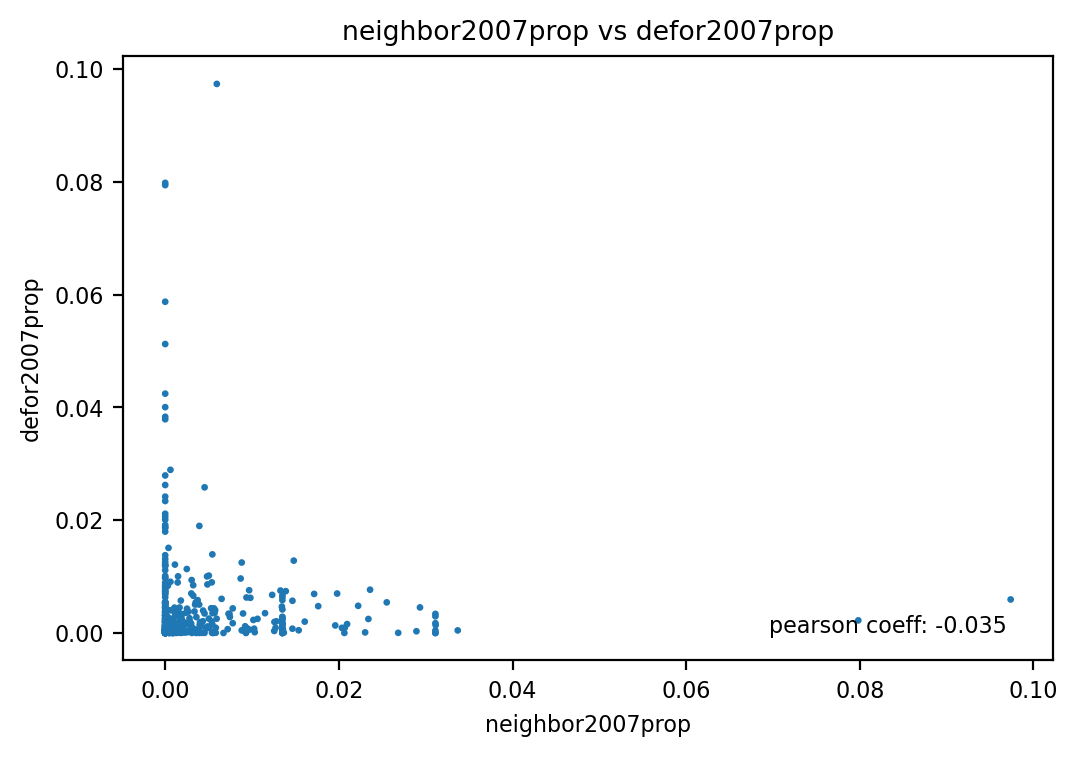

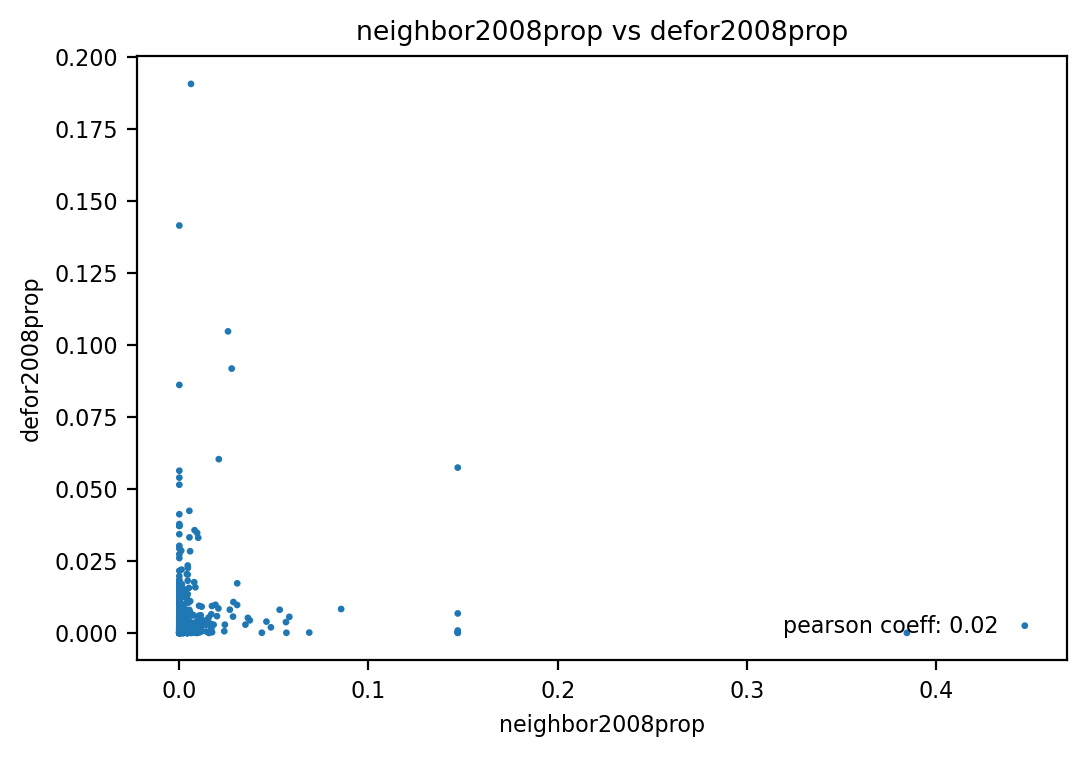

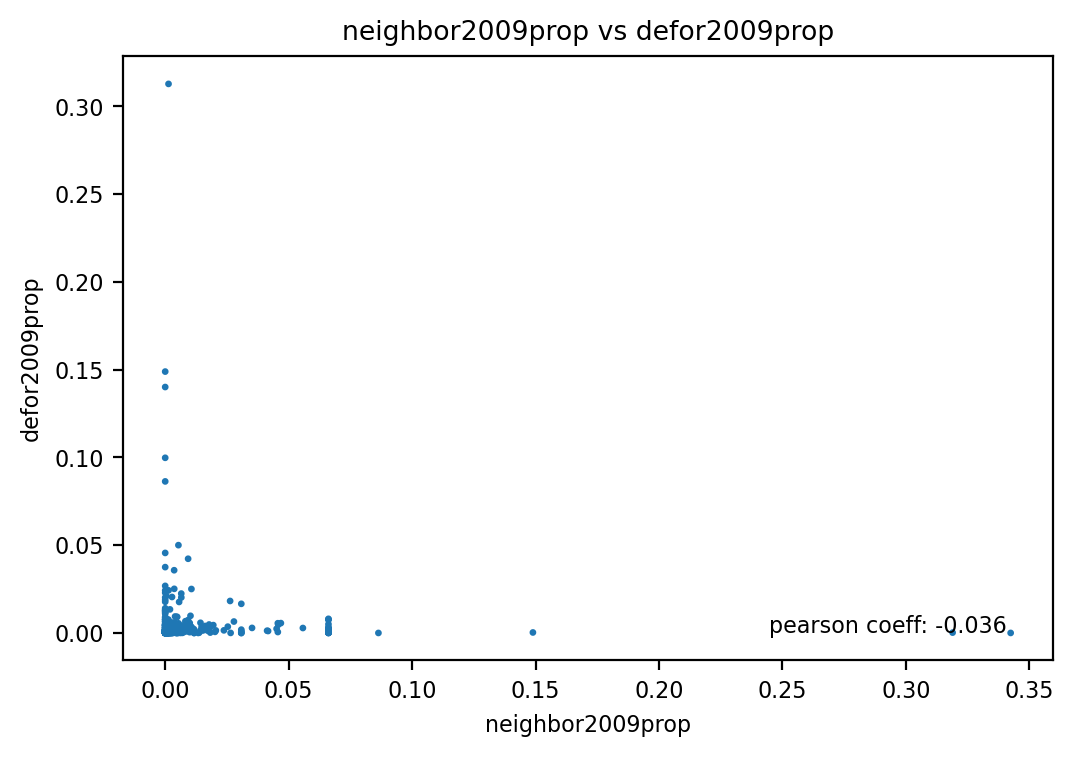

In [175]:
for i in range(2000, 2010):
    make_plot("neighbor"+str(i)+"prop", "defor"+str(i)+"prop")
# plt.scatter(features_by_lc_dropped["degree"][~mask], features_by_lc_dropped["defor2000"][~mask] )

In [1]:
# for i in range(2000, 2010):
#     make_plot("distroad", "defor"+str(i)+"prop", str(i))
make_plot("distroad", "deforcumulprop", 'cumul')


NameError: name 'make_plot' is not defined